#Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
from matplotlib import pyplot
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/P2/filtered_storms_df.csv')

In [ ]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
# Set the 'datetime_index' as the index
df.set_index('Datetime', inplace=True)

In [ ]:
# List of StormIDs to include

storm_ids = [12, 14, 40, 20, 57, 52, 61, 65, 70, 85, 95, 163, 158, 171, 115, 200, 231, 221, 237, 244, 273, 277, 261, 296, 299, 304, 305, 325, 326, 214, 205]

# Filter the DataFrame to include only the specified StormIDs
test_df = df[df['StormID'].isin(storm_ids)]

# Filter the DataFrame to exclude the specified StormIDs
train_df = df[~df['StormID'].isin(storm_ids)]

In [ ]:
train_df['Previous_Dry_Days'].describe()

count    42065.000000
mean         2.472935
std          4.981144
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max         43.000000
Name: Previous_Dry_Days, dtype: float64

In [ ]:
# Group the DataFrame by 'StormIDs'
grouped = train_df.groupby('StormID')

# For each group, calculate the duration of the storm
durations = grouped.apply(lambda g: g.index.max() - g.index.min())

# Calculate the descriptive statistics for the durations
median_duration = durations.median()
max_duration = durations.max()
min_duration = durations.min()

In [ ]:
print(median_duration)

0 days 18:20:00


In [ ]:
print(min_duration)

0 days 00:40:00


In [ ]:
train_df

Temp_Air  Temp_Moist  Soil_MC_10  Soil_MC_35  Soil_MC_65  \
Datetime                                                                        
2014-04-08 00:05:00     9.810      5.1986    0.399205    0.438332    0.368174   
2014-04-08 00:10:00     9.890      5.1946    0.396507    0.436982    0.369523   
2014-04-08 00:15:00     9.910      5.1974    0.396507    0.438332    0.368174   
2014-04-08 00:20:00     9.960      5.1998    0.395157    0.438332    0.368174   
2014-04-08 00:25:00     9.980      5.2094    0.395157    0.436982    0.369523   
...                       ...         ...         ...         ...         ...   
2018-12-24 00:15:00     3.552      5.0842    0.387000    0.427000    0.452000   
2018-12-24 00:20:00     3.483      5.0842    0.387000    0.427000    0.452000   
2018-12-24 00:25:00     3.463      5.0840    0.386000    0.427000    0.452000   
2018-12-24 00:30:00     3.395      5.0814    0.386000    0.427000    0.452000   
2018-12-24 00:35:00     3.321      5.0800    0.387000    0.428000    0.452000   

                     Soil_MC_91  Inflow (mm/s)  Overflow(mm/s)  \
Datetime                                                         
2014-04-08 00:05:00    0.388411            0.0             0.0   
2014-04-08 00:10:00    0.388411            0.0             0.0   
2014-04-08 00:15:00    0.388411            0.0             0.0   
2014-04-08 00:20:00    0.388411            0.0             0.0   
2014-04-08 00:25:00    0.388411            0.0             0.0   
...                         ...            ...             ...   
2018-12-24 00:15:00    0.418000            0.0             0.0   
2018-12-24 00:20:00    0.418000            0.0             0.0   
2018-12-24 00:25:00    0.417000            0.0             0.0   
2018-12-24 00:30:00    0.417000            0.0             0.0   
2018-12-24 00:35:00    0.417000            0.0             0.0   

                     Precipitation (mm)  Water_Depth (mm)  ...  \
Datetime                                                   ...   
2014-04-08 00:05:00                 0.0          137.1600  ...   
2014-04-08 00:10:00                 0.0          137.1600  ...   
2014-04-08 00:15:00                 0.0          137.1600  ...   
2014-04-08 00:20:00                 0.0          137.1600  ...   
2014-04-08 00:25:00                 0.0          137.1600  ...   
...                                 ...               ...  ...   
2018-12-24 00:15:00                 0.0          128.0160  ...   
2018-12-24 00:20:00                 0.0          128.0160  ...   
2018-12-24 00:25:00                 0.0          128.0160  ...   
2018-12-24 00:30:00                 0.0          128.0160  ...   
2018-12-24 00:35:00                 0.0          125.8824  ...   

                     Mean_RR (mm/s)  Max_RR (mm/s)  Year  Month  Day  \
Datetime                                                               
2014-04-08 00:05:00       -0.000508        0.00000  2014      4    8   
2014-04-08 00:10:00       -0.000508        0.00000  2014      4    8   
2014-04-08 00:15:00       -0.000508        0.00000  2014      4    8   
2014-04-08 00:20:00       -0.000508        0.00000  2014      4    8   
2014-04-08 00:25:00       -0.000508        0.00000  2014      4    8   
...                             ...            ...   ...    ...  ...   
2018-12-24 00:15:00        0.000004        0.04064  2018     12   24   
2018-12-24 00:20:00        0.000004        0.04064  2018     12   24   
2018-12-24 00:25:00        0.000004        0.04064  2018     12   24   
2018-12-24 00:30:00        0.000004        0.04064  2018     12   24   
2018-12-24 00:35:00        0.000004        0.04064  2018     12   24   

                     Season_Num  rain_indicator  hourly_rain  30min_rain  \
Datetime                                                                   
2014-04-08 00:05:00           1               0          0.0         0.0   
2014-04-08 00:10:00           1               0          0.0         0.0   
2014-04-

In [ ]:
# For 15-minute intervals
train_df_15 = train_df.resample('15T').mean()  # Replace .mean() with appropriate aggregation if needed
test_df_15 = test_df.resample('15T').mean()    # Replace .mean() with appropriate aggregation if needed

# Calculate the duration of each storm for 15-minute intervals
# Repeat similar steps for 30-minute and 60-minute intervals by replacing '15T' with '30T' and '60T'

# Note: Ensure that StormID are not numeric sums but rather categorical group identifiers
grouped_train_15 = train_df_15.groupby('StormID')
grouped_test_15 = test_df_15.groupby('StormID')

# For each group, calculate the duration of the storm
durations_train_15 = grouped_train_15.apply(lambda g: g.index.max() - g.index.min())
durations_test_15 = grouped_test_15.apply(lambda g: g.index.max() - g.index.min())

# Calculate the descriptive statistics for the durations
mean_duration_train_15 = durations_train_15.mean()
max_duration_train_15 = durations_train_15.max()
min_duration_train_15 = durations_train_15.min()

mean_duration_test_15 = durations_test_15.mean()
max_duration_test_15 = durations_test_15.max()
min_duration_test_15 = durations_test_15.min()

# Print the results for 15-minute intervals
print("Train DataFrame - 15-minute intervals:")
print(f"Mean Duration: {mean_duration_train_15}")
print(f"Max Duration: {max_duration_train_15}")
print(f"Min Duration: {min_duration_train_15}")

print("\nTest DataFrame - 15-minute intervals:")
print(f"Mean Duration: {mean_duration_test_15}")
print(f"Max Duration: {max_duration_test_15}")
print(f"Min Duration: {min_duration_test_15}")

# Repeat the process for 30-minute and 60-minute intervals

Train DataFrame - 15-minute intervals:
Mean Duration: 1 days 08:46:16.153846153
Max Duration: 31 days 04:30:00
Min Duration: 0 days 00:00:00

Test DataFrame - 15-minute intervals:
Mean Duration: 1 days 22:55:09.677419354
Max Duration: 4 days 20:45:00
Min Duration: 0 days 07:15:00


In [ ]:
# Count the number of rows for each storm in the resampled dataframes
storm_counts_train_5 = train_df.groupby('StormID').size()
storm_counts_test_5 = test_df.groupby('StormID').size()

# Resample train_df and test_df to 15-minute intervals
train_df_15 = train_df.resample('15T').mean()  # Replace .mean() with an appropriate method for your data
test_df_15 = test_df.resample('15T').mean()

# Count the number of rows for each storm in the resampled dataframes
storm_counts_train_15 = train_df_15.groupby('StormID').size()
storm_counts_test_15 = test_df_15.groupby('StormID').size()

# Repeat for 30-minute intervals
train_df_30 = train_df.resample('30T').mean()
test_df_30 = test_df.resample('30T').mean()
storm_counts_train_30 = train_df_30.groupby('StormID').size()
storm_counts_test_30 = test_df_30.groupby('StormID').size()

# Repeat for 60-minute intervals
train_df_60 = train_df.resample('60T').mean()
test_df_60 = test_df.resample('60T').mean()
storm_counts_train_60 = train_df_60.groupby('StormID').size()
storm_counts_test_60 = test_df_60.groupby('StormID').size()

In [ ]:
print(storm_counts_train_5)
print(storm_counts_test_5)

# Print the counts for 15-minute intervals
print("Train DataFrame - 15-minute intervals:")
print(storm_counts_train_15)

print("\nTest DataFrame - 15-minute intervals:")
print(storm_counts_test_15)

# Print the counts for 30-minute intervals
print("\nTrain DataFrame - 30-minute intervals:")
print(storm_counts_train_30)

print("\nTest DataFrame - 30-minute intervals:")
print(storm_counts_test_30)

# Print the counts for 60-minute intervals
print("\nTrain DataFrame - 60-minute intervals:")
print(storm_counts_train_60)

print("\nTest DataFrame - 60-minute intervals:")
print(storm_counts_test_60)

StormID
1        80
2       494
4       322
5      1115
10      480
       ... 
302     170
308    2668
312    1324
320     955
322    1002
Length: 126, dtype: int64
StormID
12      155
14      488
20      345
40      112
52      598
57      777
61     1366
65      740
70      758
85      705
95      302
115     360
158     688
163     228
171     361
200     205
205     493
214     477
221    1096
231     134
237     698
244     124
261     474
273      86
277     712
296     257
299    1401
304     639
305    1233
325     921
326     147
dtype: int64
Train DataFrame - 15-minute intervals:
StormID
1.0       27
2.0      166
4.0      108
5.0      374
10.0     161
        ... 
302.0     57
308.0    892
312.0    442
320.0    320
322.0    335
Length: 130, dtype: int64

Test DataFrame - 15-minute intervals:
StormID
12.0      53
14.0     164
20.0     120
40.0      38
52.0     201
57.0     260
61.0     458
65.0     249
70.0     254
85.0     237
95.0     102
115.0    120
158.0    230
163.0    

In [ ]:
# Assuming storm_counts_train_5, storm_counts_test_5, etc. are already calculated

# Print descriptive statistics for the original intervals
print("Train DataFrame - 5-minute intervals Descriptive Statistics:")
print(storm_counts_train_5.describe())

print("\nTest DataFrame - 5-minute intervals Descriptive Statistics:")
print(storm_counts_test_5.describe())

# Repeat for 15-minute intervals
print("\nTrain DataFrame - 15-minute intervals Descriptive Statistics:")
print(storm_counts_train_15.describe())

print("\nTest DataFrame - 15-minute intervals Descriptive Statistics:")
print(storm_counts_test_15.describe())

# Repeat for 30-minute intervals
print("\nTrain DataFrame - 30-minute intervals Descriptive Statistics:")
print(storm_counts_train_30.describe())

print("\nTest DataFrame - 30-minute intervals Descriptive Statistics:")
print(storm_counts_test_30.describe())

# Repeat for 60-minute intervals
print("\nTrain DataFrame - 60-minute intervals Descriptive Statistics:")
print(storm_counts_train_60.describe())

print("\nTest DataFrame - 60-minute intervals Descriptive Statistics:")
print(storm_counts_test_60.describe())

Train DataFrame - 5-minute intervals Descriptive Statistics:
count     126.000000
mean      333.849206
std       363.399220
min         9.000000
25%       110.750000
50%       217.000000
75%       466.000000
max      2668.000000
dtype: float64

Test DataFrame - 5-minute intervals Descriptive Statistics:
count      31.000000
mean      550.967742
std       369.991935
min        86.000000
25%       242.500000
50%       488.000000
75%       726.000000
max      1401.000000
dtype: float64

Train DataFrame - 15-minute intervals Descriptive Statistics:
count    130.000000
mean     108.746154
std      121.036308
min        1.000000
25%       35.250000
50%       70.000000
75%      147.500000
max      892.000000
dtype: float64

Test DataFrame - 15-minute intervals Descriptive Statistics:
count     31.000000
mean     184.870968
std      123.546143
min       30.000000
25%       81.500000
50%      164.000000
75%      243.500000
max      468.000000
dtype: float64

Train DataFrame - 30-minute interval

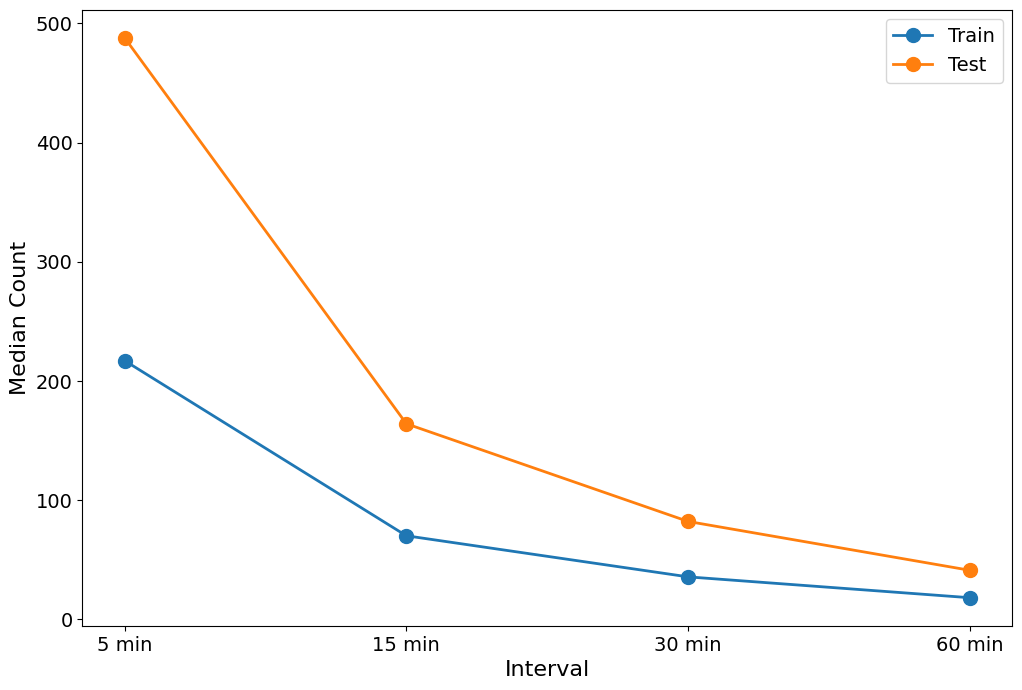

In [ ]:
import matplotlib.pyplot as plt

# Assuming median values are already calculated and stored in these variables
# Replace these with the actual median values from your data
median_train_5 = storm_counts_train_5.median()
median_test_5 = storm_counts_test_5.median()
median_train_15 = storm_counts_train_15.median()
median_test_15 = storm_counts_test_15.median()
median_train_30 = storm_counts_train_30.median()
median_test_30 = storm_counts_test_30.median()
median_train_60 = storm_counts_train_60.median()
median_test_60 = storm_counts_test_60.median()

# Intervals
intervals = ['5 min', '15 min', '30 min', '60 min']

# Median values for train and test dataframes
median_train = [median_train_5, median_train_15, median_train_30, median_train_60]
median_test = [median_test_5, median_test_15, median_test_30, median_test_60]

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(intervals, median_train, label='Train', marker='o', markersize=10, linewidth=2)
plt.plot(intervals, median_test, label='Test', marker='o', markersize=10, linewidth=2)

# Adding titles and labels with increased font sizes
# plt.title('Median Storm Duration for Different Intervals', fontsize=18)
plt.xlabel('Interval', fontsize=16)
plt.ylabel('Median Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

# Show plot
plt.show()

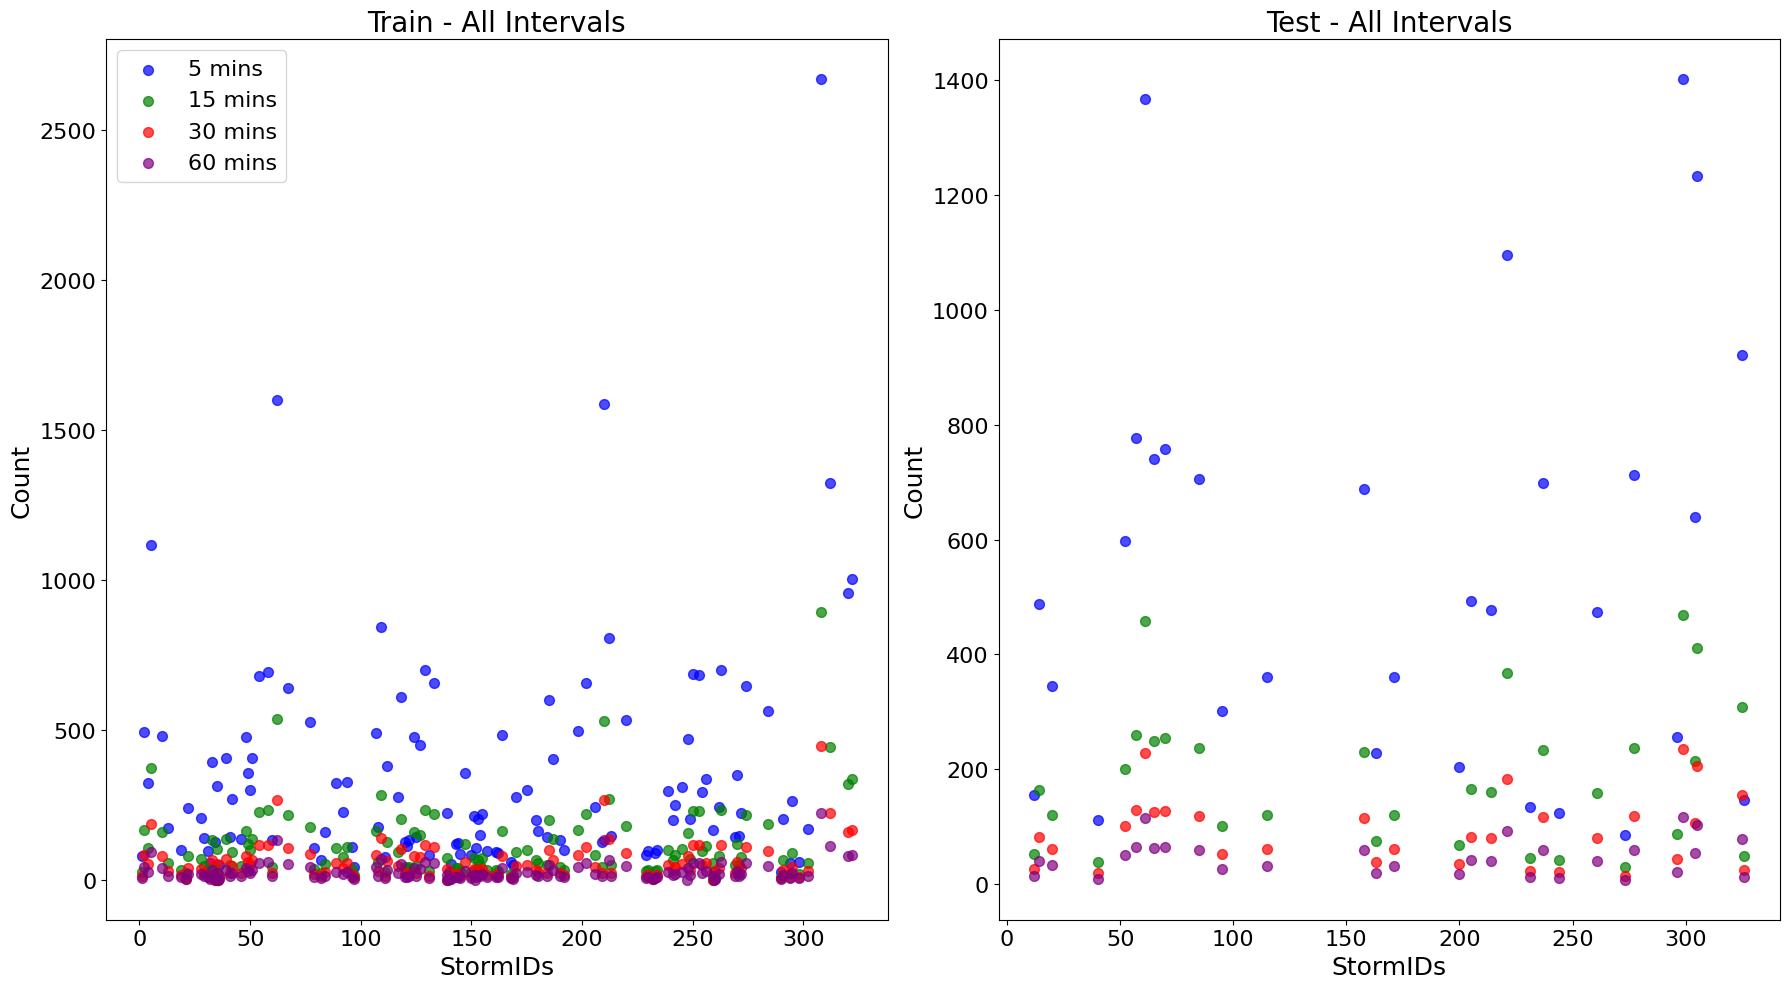

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already calculated storm_counts_train_5, storm_counts_test_5, etc.

# Colors for different intervals and point size
colors = ['blue', 'green', 'red', 'purple']
intervals = [5, 15, 30, 60]  # Time intervals
point_size = 50  # Adjust the point size as needed

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))  # Adjusted figure size for larger fonts

# Combine all train intervals in one plot
for i, (storm_counts, interval) in enumerate(zip([storm_counts_train_5, storm_counts_train_15, storm_counts_train_30, storm_counts_train_60], intervals)):
    axes[0].scatter(storm_counts.index, storm_counts.values, color=colors[i], s=point_size, alpha=0.7, label=f'{interval} mins')

axes[0].set_title('Train - All Intervals', fontsize=20)
axes[0].set_xlabel('StormIDs', fontsize=18)
axes[0].set_ylabel('Count', fontsize=18)
axes[0].tick_params(axis='both', which='major', labelsize=16)

# Legend only for the first plot
axes[0].legend(fontsize=16)

# Combine all test intervals in one plot
for i, (storm_counts, interval) in enumerate(zip([storm_counts_test_5, storm_counts_test_15, storm_counts_test_30, storm_counts_test_60], intervals)):
    axes[1].scatter(storm_counts.index, storm_counts.values, color=colors[i], s=point_size, alpha=0.7)

axes[1].set_title('Test - All Intervals', fontsize=20)
axes[1].set_xlabel('StormIDs', fontsize=18)
axes[1].set_ylabel('Count', fontsize=18)
axes[1].tick_params(axis='both', which='major', labelsize=16)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [ ]:
# List of StormIDs to include
storm_ids = [12, 14, 40, 20, 57, 52, 61, 65, 70, 85, 95, 163, 158, 171, 115, 231, 221, 237, 277, 261, 296, 299, 304, 305, 325, 326, 214, 205]

# Filter the DataFrame to include only the specified StormIDs
subset_df = df[df['StormID'].isin(storm_ids)]

In [ ]:
# Group by 'StormID' and get the first row for each group
unique_storms_df = subset_df.groupby('StormID').first()

In [ ]:
unique_storms_df

Temp_Air  Temp_Moist  Soil_MC_10  Soil_MC_35  Soil_MC_65  Soil_MC_91  \
StormID                                                                         
12         21.390     16.4940    0.295317    0.299365    0.307460    0.365475   
14         21.650     17.7260    0.350634    0.350634    0.435633    0.384364   
20         20.890     19.9880    0.356031    0.364126    0.338491    0.368174   
40         25.430     21.4300    0.321000    0.311000    0.303000    0.113000   
52         22.720     15.7680    0.325000    0.311000    0.303000    0.367000   
57          8.230     12.2060    0.299000    0.295000    0.299000    0.358000   
61          3.826      7.7620    0.326000    0.308000    0.301000    0.371000   
65          1.913      4.9586    0.351000    0.337000    0.312000    0.378000   
70         17.220      0.2480    0.345000    0.316000    0.291000    0.381000   
85         21.660     19.0360    0.331000    0.334000    0.282000    0.112000   
95         33.530     22.3640    0.293000    0.289000    0.279000    0.355000   
115         3.097      1.8932    0.352000    0.365000    0.354000    0.426000   
158        29.270     23.9600    0.328000    0.319000    0.281000    0.417000   
163        22.010     22.8000    0.280000    0.288000    0.270000    0.416000   
171        18.690     19.4600    0.299000    0.300000    0.275000    0.413000   
205         7.650      2.0400    0.344000    0.352000    0.312000    0.422000   
214        13.510      3.9174    0.358000    0.378000    0.353000    0.424000   
221        12.150      6.0494    0.332000    0.321000    0.289000    0.424000   
231         5.968      5.2800    0.335000    0.322000    0.293000    0.424000   
237         3.855      7.9100    0.300000    0.294000    0.284000    0.420000   
261        15.460     19.5960    0.348000    0.346000    0.329000    0.420000   
277        23.920     23.0760    0.374000    0.403000    0.430000    0.406000   
296        14.110     21.5100    0.316000    0.321000    0.295000    0.393000   
299        15.580     20.4400    0.343000    0.343000    0.306000    0.394000   
304        19.580     13.8800    0.121000    0.332000    0.300000    0.411000   
305         8.660     12.7040    0.127000    0.395000    0.350000    0.416000   
325         4.804      3.9066    0.303000    0.337000    0.302000    0.410000   
326         5.205      4.2438    0.001000    0.396000    0.455000    0.414000   

         Inflow (mm/s)  Overflow(mm/s)  Precipitation (mm)  Water_Depth (mm)  \
StormID                                                                        
12                 0.0             0.0                 0.0           124.968   
14                 0.0             0.0                 0.0           124.968   
20                 0.0             0.0                 0.0           124.968   
40                 0.0             0.0                 0.0           124.968   
52                 0.0             0.0                 0.0           124.968   
57                 0.0             0.0                 0.0           124.968   
61                 0.0             0.0                 0.0           124.968   
65                 0.0             0.0                 0.0           124.968   
70                 0.0             0.0                 0.0           124.968   
85                 0.0             0.0                 0.0           124.968   
95                 0.0             0.0                 0.0           124.968   
115                0.0             0.0                 0.0           124.968   
158                0.0             0.0                 0.0           124.968   
163                0.0             0.0                 0.0           124.968   
171                0.0             0.0                 0.0           124.968   
205                0.0             0.0                 0.0           124.968   
214                0.0             0.0                 0.0           124.968   
221                0.0             0.0                 0.0

In [ ]:
print(list(df))

['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow (mm/s)', 'Overflow(mm/s)', 'Precipitation (mm)', 'Water_Depth (mm)', 'Recession_Rate (mm/s)', 'SA (mm2)', 'Storm1', 'Storm2', 'StormID', 'Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'Peak_Inflow (mm/s)', 'Min_Inflow (mm/s)', 'Mean_Inflow (mm/s)', 'Min_RR (mm/s)', 'Mean_RR (mm/s)', 'Max_RR (mm/s)', 'Year', 'Month', 'Day', 'Season_Num', 'rain_indicator', 'hourly_rain', '30min_rain', '15min_rain']


In [ ]:
print(list(df))

['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow (mm/s)', 'Overflow(mm/s)', 'Precipitation (mm)', 'Water_Depth (mm)', 'Recession_Rate (mm/s)', 'SA (mm2)', 'Storm1', 'Storm2', 'StormID', 'Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'Peak_Inflow (mm/s)', 'Min_Inflow (mm/s)', 'Mean_Inflow (mm/s)', 'Min_RR (mm/s)', 'Mean_RR (mm/s)', 'Max_RR (mm/s)', 'Year', 'Month', 'Day', 'Season_Num', 'rain_indicator', 'hourly_rain', '30min_rain', '15min_rain']


In [ ]:
# selected_storm_ids = [22, 35, 151, 269, 179, 39, 254, 245, 139, 163, 50, 153, 48, 157, 187, 261, 92, 49, 94, 124, 107, 198, 125, 249, 271, 51, 57, 4, 291, 117, 171, 58, 295, 170, 20, 175, 89, 262, 302, 42, 120, 144, 239, 41, 34, 244, 13, 112, 296, 184]

# df = df[df['StormID'].isin(selected_storm_ids)]

In [ ]:
storms_to_exclude = [1, 19, 20, 21, 60, 79, 82, 97, 108, 122, 131, 140, 141, 143, 154, 157, 158, 161, 162, 163, 164, 168, 169, 170, 185, 192, 259, 260, 256, 270, 271, 277, 290, 294, 298, 299, 308, 312, 326]
df = df[~df['StormID'].isin(storms_to_exclude)]

In [ ]:
df['StormID'].nunique()

157

In [ ]:
sampled_df = df.groupby(['Year', 'Season_Num']).apply(lambda x: x.sample(n=31, replace=False) if len(x) > 31 else x)

In [ ]:
sampled_df

Temp_Air  Temp_Moist  Soil_MC_10  \
Year Season_Num Datetime                                                
2014 1          2014-04-29 14:25:00     7.275     10.1160    0.331745   
                2014-04-30 09:55:00     7.352      9.3500    0.416745   
                2014-05-17 16:15:00    19.010     18.2000   -0.075711   
                2014-05-29 04:05:00    11.030     17.6520    0.405951   
                2014-05-16 13:20:00    17.900     16.4720    0.409999   
...                                       ...         ...         ...   
2018 4          2018-12-23 04:25:00     2.392      5.4000    0.132000   
                2018-02-16 13:20:00    14.390      6.2226    0.390000   
                2018-12-30 03:20:00    -1.230      5.0200    0.105000   
                2018-02-06 04:50:00    -4.249      1.3280    0.381000   
                2018-12-31 05:00:00    -1.104      4.3800    0.083000   

                                     Soil_MC_35  Soil_MC_65  Soil_MC_91  \
Year Season_Num Datetime                                                  
2014 1          2014-04-29 14:25:00    0.335793    0.310158    0.370872   
                2014-04-30 09:55:00    0.422141    0.369523    0.387062   
                2014-05-17 16:15:00   -0.075711   -0.075711   -0.075711   
                2014-05-29 04:05:00    0.408649    0.369523    0.388411   
                2014-05-16 13:20:00    0.438332    0.442379    0.381665   
...                                         ...         ...         ...   
2018 4          2018-12-23 04:25:00    0.429000    0.452000    0.417000   
                2018-02-16 13:20:00    0.404000    0.450000    0.425000   
                2018-12-30 03:20:00    0.437000    0.454000    0.414000   
                2018-02-06 04:50:00    0.394000    0.438000    0.424000   
                2018-12-31 05:00:00    0.439000    0.455000    0.414000   

                                     Inflow (mm/s)  Overflow(mm/s)  \
Year Season_Num Datetime                                             
2014 1          2014-04-29 14:25:00       0.000000        0.000000   
                2014-04-30 09:55:00       0.059421        0.010063   
                2014-05-17 16:15:00       0.000000        0.000000   
                2014-05-29 04:05:00       0.000000        0.000000   
                2014-05-16 13:20:00       0.095365        0.033435   
...                                            ...             ...   
2018 4          2018-12-23 04:25:00       0.000000        0.000000   
                2018-02-16 13:20:00       0.000000        0.000000   
                2018-12-30 03:20:00       0.000000        0.000000   
                2018-02-06 04:50:00       0.000000        0.000000   
                2018-12-31 05:00:00       0.000000        0.000000   

                                     Precipitation (mm)  Water_Depth (mm)  \
Year Season_Num Datetime                                                    
2014 1          2014-04-29 14:25:00            0.000000        124.968000   
                2014-04-30 09:55:00            0.001693        575.462414   
                2014-05-17 16:15:00            0.000000        191.719199   
                2014-05-29 04:05:00            0.000000        323.087993   
                2014-05-16 13:20:00            0.004233        656.844002   
...                                                 ...               ...   
2018 4          2018-12-23 04:25:00            0.000000        268.224000   
                2018-02-16 13:20:00            0.000000        400.812000   
                2018-12-30 03:20:00            0.000000        292.912800   
                2018-02-06 04:50:00            0.000000        313.944000   
                2018-12-31 05:00:00            0.000000        128.016000   

                                     ...  Mean_RR (mm/s)  Max_RR (mm/s)  Year  \
Year Season_Num Datetime             ...                                        
2014 1          2014-04-29 14:25:00 

In [ ]:
storm_ids = sampled_df['StormID']
print(storm_ids)

Year  Season_Num  Datetime           
2014  1           2014-04-29 14:25:00      5
                  2014-04-30 09:55:00      5
                  2014-05-17 16:15:00     10
                  2014-05-29 04:05:00     14
                  2014-05-16 13:20:00     10
                                        ... 
2018  4           2018-12-23 04:25:00    322
                  2018-02-16 13:20:00    214
                  2018-12-30 03:20:00    325
                  2018-02-06 04:50:00    210
                  2018-12-31 05:00:00    325
Name: StormID, Length: 434, dtype: int64


In [ ]:
storm_ids_list = sampled_df['StormID'].tolist()
print(storm_ids_list)

[5, 5, 10, 14, 10, 10, 5, 13, 2, 14, 5, 12, 5, 10, 10, 14, 4, 5, 4, 10, 5, 14, 5, 13, 13, 5, 5, 10, 2, 5, 4, 35, 34, 35, 35, 29, 31, 33, 35, 34, 35, 22, 35, 29, 33, 39, 32, 29, 42, 34, 33, 39, 35, 42, 33, 33, 40, 42, 35, 22, 28, 39, 61, 49, 50, 61, 52, 48, 48, 61, 61, 58, 52, 62, 51, 61, 57, 51, 62, 52, 58, 61, 49, 61, 54, 50, 62, 61, 57, 61, 52, 62, 57, 65, 65, 65, 67, 65, 67, 67, 65, 65, 65, 65, 67, 65, 65, 65, 67, 65, 65, 67, 67, 65, 65, 65, 67, 65, 67, 65, 65, 67, 67, 65, 77, 77, 77, 77, 77, 70, 77, 77, 77, 77, 77, 70, 77, 70, 70, 77, 70, 70, 70, 77, 77, 70, 70, 77, 77, 70, 77, 77, 70, 70, 70, 89, 95, 85, 89, 85, 96, 85, 92, 85, 89, 94, 89, 95, 85, 85, 89, 94, 94, 85, 84, 89, 85, 85, 89, 84, 95, 85, 85, 85, 89, 89, 133, 118, 117, 133, 133, 129, 127, 129, 124, 133, 124, 124, 133, 133, 117, 124, 133, 133, 127, 129, 129, 124, 133, 133, 124, 127, 124, 118, 129, 129, 129, 152, 155, 139, 155, 147, 153, 151, 139, 152, 147, 153, 155, 155, 155, 151, 147, 147, 150, 147, 147, 151, 147, 144, 1

In [ ]:
storm_ids.unique()

array([  5,  10,  14,  13,   2,  12,   4,  35,  34,  29,  31,  33,  22,
        39,  32,  42,  40,  28,  61,  49,  50,  52,  48,  58,  62,  51,
        57,  54,  65,  67,  77,  70,  89,  95,  85,  96,  92,  94,  84,
       133, 118, 117, 129, 127, 124, 152, 155, 139, 147, 153, 151, 150,
       144, 187, 184, 179, 175, 190, 180, 171, 109, 115, 107, 198, 112,
       200, 221, 254, 250, 229, 249, 234, 248, 245, 253, 242, 237, 261,
       263, 274, 262, 284, 272, 269, 295, 304, 305, 302, 291, 296, 325,
       209, 205, 212, 322, 220, 210, 213, 214, 202, 320])

So, you are taking 118 storms

#Train/test split

In [ ]:
print(list(df))

['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow (mm/s)', 'Overflow(mm/s)', 'Precipitation (mm)', 'Water_Depth (mm)', 'Recession_Rate (mm/s)', 'SA (mm2)', 'Storm1', 'Storm2', 'StormID', 'Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'Peak_Inflow (mm/s)', 'Min_Inflow (mm/s)', 'Mean_Inflow (mm/s)', 'Min_RR (mm/s)', 'Mean_RR (mm/s)', 'Max_RR (mm/s)', 'Year', 'Month', 'Day', 'Season_Num', 'rain_indicator', 'hourly_rain', '30min_rain', '15min_rain']


In [ ]:
input_columns = ['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow (mm/s)', 'Overflow(mm/s)', 'Precipitation (mm)','Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'StormID']
target_column = 'Recession_Rate (mm/s)'

In [ ]:
# List of testy storms
storm_ids = [12, 14, 40, 20, 57, 52, 61, 65, 70, 85, 95, 163, 158, 171, 115, 200, 231, 221, 237, 244, 273, 277, 261, 296, 299, 304, 305, 325, 326, 214, 205]

# Filter the DataFrame to include only the specified StormIDs
test_df = df[df['StormID'].isin(storm_ids)]

# Filter the DataFrame to exclude the specified StormIDs
train_df = df[~df['StormID'].isin(storm_ids)]

In [ ]:
unique_storm_events_train = train_df['StormID'].unique()
unique_storm_events_test = test_df['StormID'].unique()
train_storm_events = unique_storm_events_train
test_storm_events = unique_storm_events_test

In [ ]:
test_storm_events

array([ 12,  14,  20,  40,  52,  57,  61,  65,  70,  85,  95, 115, 158,
       163, 171, 200, 205, 214, 221, 231, 237, 244, 261, 273, 277, 296,
       299, 304, 305, 325, 326])

In [ ]:
# train set
X_train = train_df[input_columns]
y_train = train_df[target_column]

# test set
X_test = test_df[input_columns]
y_test = test_df[target_column]

In [ ]:
y_test

Datetime
2014-05-23 16:40:00    0.000000
2014-05-23 16:45:00    0.000000
2014-05-23 16:50:00    0.000000
2014-05-23 16:55:00    0.000000
2014-05-23 17:00:00    0.000000
                         ...   
2018-12-31 23:35:00    0.000000
2018-12-31 23:40:00    0.002032
2018-12-31 23:45:00    0.007112
2018-12-31 23:50:00    0.001016
2018-12-31 23:55:00    0.000000
Name: Recession_Rate (mm/s), Length: 17080, dtype: float64

In [ ]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

#Model

In [ ]:
# Create a RF model
model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=4, min_samples_split=2, random_state=42)  # You can adjust the number of estimators as needed
# Fit the model to the training data
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, random_state=42)

#Predict

Train Score

In [ ]:
# Make predictions on the train data
y_pred_train = model.predict(X_train_scaled)

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error
rmse_train = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse_train)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared Score
r2_train = r2_score(y_train, y_pred_train)
print("R-squared (R2) Score:", r2_train)

# Calculate Explained Variance Score
evs = explained_variance_score(y_train, y_pred_train)
print("Explained Variance Score (EVS):", evs)

Mean Squared Error (MSE): 3.455016901393744e-05
Root Mean Squared Error (RMSE): 0.00587793918086411
Mean Absolute Error (MAE): 0.0032446619778705474
R-squared (R2) Score: 0.7953416239310912
Explained Variance Score (EVS): 0.7953416671915107


Test Score

In [ ]:
# Make predictions on the test data
y_pred_test = model.predict(X_test_scaled)

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared Score
r2_test = r2_score(y_test, y_pred_test)
print("R-squared (R2) Score:", r2_test)

# Calculate Explained Variance Score
evs = explained_variance_score(y_test, y_pred_test)
print("Explained Variance Score (EVS):", evs)

Mean Squared Error (MSE): 8.35248164521161e-05
Root Mean Squared Error (RMSE): 0.009139191236215385
Mean Absolute Error (MAE): 0.003759766261945692
R-squared (R2) Score: 0.6114084515947065
Explained Variance Score (EVS): 0.6116648604867585


In [ ]:
# r2_train = 0.7302
# r2_test = 0.6108
# rmse_train = 0.0051
# rmse_test = 0.0092

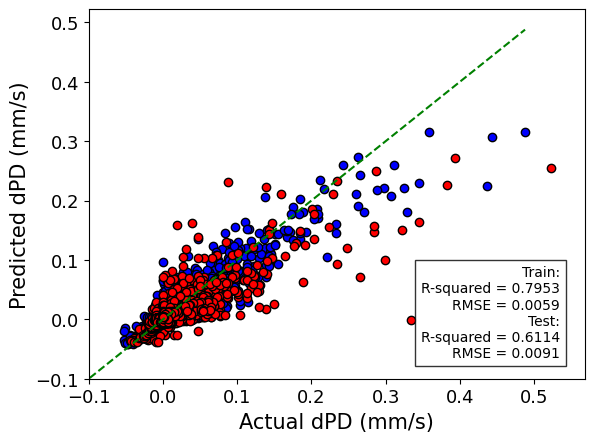

In [ ]:
# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(y_train, y_pred_train)

# Create a scatter plot
plt.scatter(y_train, y_pred_train, c='blue', edgecolors='k', label='Train Set')

# Create a scatter plot
plt.scatter(y_test, y_pred_test, c='red', edgecolors='k', label='Test Set')

# Add a diagonal line to represent a perfect prediction
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'g--', label='Perfect Prediction')

# Update font sizes to match the first snippet
plt.xlabel("Actual dPD (mm/s)", fontsize=15)
plt.ylabel("Predicted dPD (mm/s)", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# plt.legend(fontsize=15)

# Text box showing RMSE and R-squared values for train and test datasets
text_msg = (
    f"Train:\nR-squared = {r2_train:.4f}\nRMSE = {rmse_train:.4f}\n"
    f"Test:\nR-squared = {r2_test:.4f}\nRMSE = {rmse_test:.4f}"
)
# Adjust the text box positioning
plt.text(0.95, 0.05, text_msg, ha='right', va='bottom', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

# Set limits for x and y axes
plt.xlim([-0.1, plt.xlim()[1]])  # Starts at -0.1, upper limit unchanged
plt.ylim([-0.1, plt.ylim()[1]])  # Starts at -0.1, upper limit unchanged

plt.show()

Obs/Pred/Train/test line plot

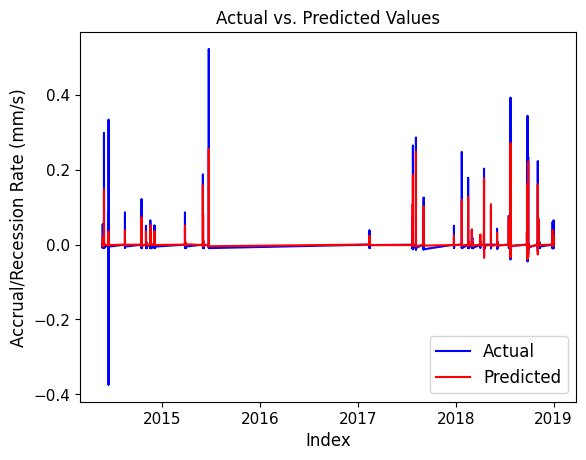

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the actual values in blue
ax.plot(y_test.index, y_test, label='Actual', color='blue')

# Plot the predicted values in red
ax.plot(y_test.index, y_pred_test, label='Predicted', color='red')

# Add labels and legend with fontsize=12
ax.set_xlabel("Index", fontsize=12)
ax.set_ylabel("Accrual/Recession Rate (mm/s)", fontsize=12)
ax.set_title("Actual vs. Predicted Values", fontsize=12)
ax.legend(fontsize=12)

# Set font size for axis ticks
ax.tick_params(axis='both', which='major', labelsize=11)

plt.show()

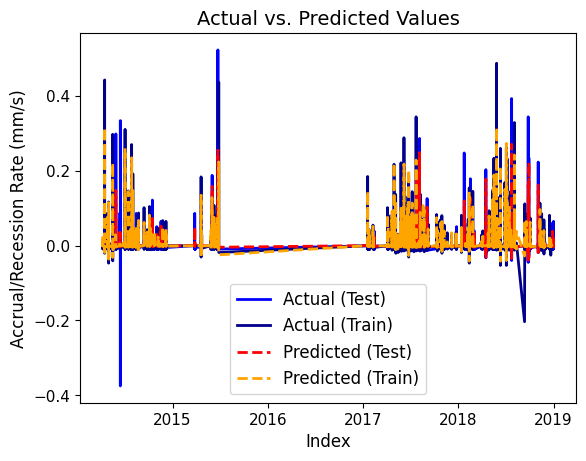

In [ ]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the actual values in blue
ax.plot(y_test.index, y_test, label='Actual (Test)', color='blue', linewidth=2)
ax.plot(y_train.index, y_train, label='Actual (Train)', color='darkblue', linewidth=2)

# Plot the predicted values for test and train in different colors
ax.plot(y_test.index, y_pred_test, label='Predicted (Test)', color='red', linestyle='dashed', linewidth=2)
ax.plot(y_train.index, y_pred_train, label='Predicted (Train)', color='orange', linestyle='dashed', linewidth=2)

# Add labels and legend with fontsize=12
ax.set_xlabel("Index", fontsize=12)
ax.set_ylabel("Accrual/Recession Rate (mm/s)", fontsize=12)
ax.set_title("Actual vs. Predicted Values", fontsize=14)
ax.legend(fontsize=12)

# Set font size for axis ticks
ax.tick_params(axis='both', which='major', labelsize=11)

# Show the combined plot
plt.show()

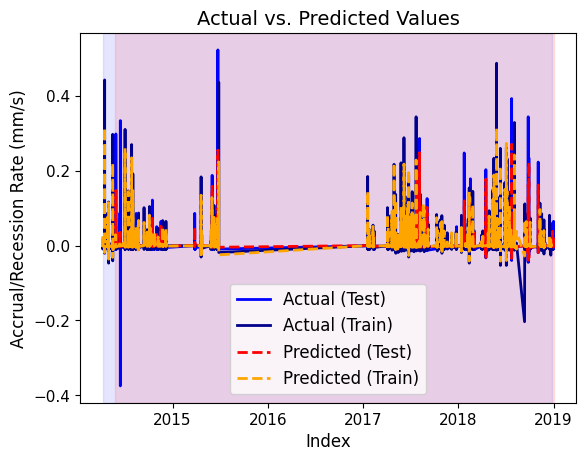

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the actual values in blue
ax.plot(y_test.index, y_test, label='Actual (Test)', color='blue', linewidth=2)
ax.plot(y_train.index, y_train, label='Actual (Train)', color='darkblue', linewidth=2)

# Plot the predicted values for test and train in different colors
ax.plot(y_test.index, y_pred_test, label='Predicted (Test)', color='red', linestyle='dashed', linewidth=2)
ax.plot(y_train.index, y_pred_train, label='Predicted (Train)', color='orange', linestyle='dashed', linewidth=2)

# Add a light shade in the background for train and test data
ax.axvspan(y_train.index.min(), y_train.index.max(), color='blue', alpha=0.1)
ax.axvspan(y_test.index.min(), y_test.index.max(), color='red', alpha=0.1)

# Add labels and legend with fontsize=12
ax.set_xlabel("Index", fontsize=12)
ax.set_ylabel("Accrual/Recession Rate (mm/s)", fontsize=12)
ax.set_title("Actual vs. Predicted Values", fontsize=14)
ax.legend(fontsize=12)

# Set font size for axis ticks
ax.tick_params(axis='both', which='major', labelsize=11)

# Show the combined plot
plt.show()

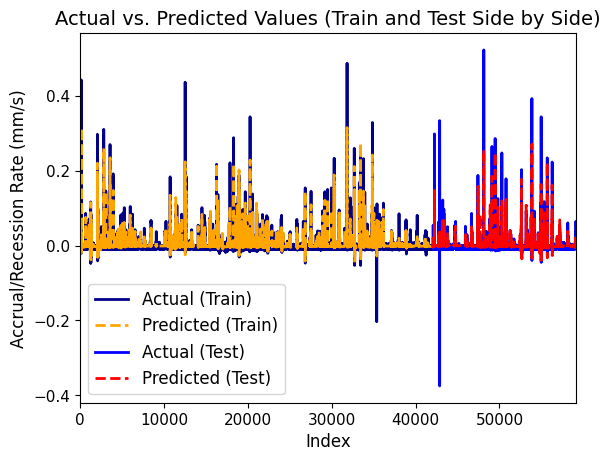

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Create fresh, separate indices for y_train and y_test
train_index = np.arange(len(y_train))
test_index = np.arange(len(y_test)) + len(y_train)  # Ensures test index starts after the train index ends

# Plot the actual and predicted values for training data in dark blue and orange
ax.plot(train_index, y_train, label='Actual (Train)', color='darkblue', linewidth=2)
ax.plot(train_index, y_pred_train, label='Predicted (Train)', color='orange', linestyle='dashed', linewidth=2)

# Plot the actual and predicted values for test data in blue and red, using the new test index
ax.plot(test_index, y_test, label='Actual (Test)', color='blue', linewidth=2)
ax.plot(test_index, y_pred_test, label='Predicted (Test)', color='red', linestyle='dashed', linewidth=2)

# Add labels and legend with fontsize=12
ax.set_xlabel("Index", fontsize=12)
ax.set_ylabel("Accrual/Recession Rate (mm/s)", fontsize=12)
ax.set_title("Actual vs. Predicted Values (Train and Test Side by Side)", fontsize=14)
ax.legend(fontsize=12)

# Set font size for axis ticks
ax.tick_params(axis='both', which='major', labelsize=11)

# Optionally, set x-axis limits to better frame the plot
ax.set_xlim([0, max(test_index) + 1])

# Show the combined plot
plt.show()

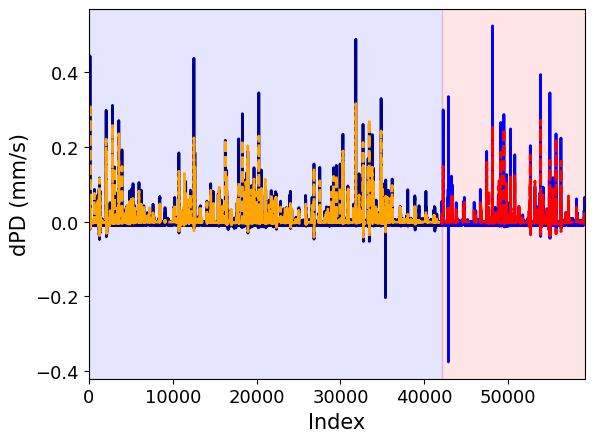

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Create fresh, separate indices for y_train and y_test
train_index = np.arange(len(y_train))
test_index = np.arange(len(y_test)) + len(y_train)  # Ensures test index starts after the train index ends

# Plot the actual and predicted values for training data in dark blue and orange
ax.plot(train_index, y_train, label='Actual (Train)', color='darkblue', linewidth=2)
ax.plot(train_index, y_pred_train, label='Predicted (Train)', color='orange', linestyle='dashed', linewidth=2)

# Plot the actual and predicted values for test data in blue and red, using the new test index
ax.plot(test_index, y_test, label='Actual (Test)', color='blue', linewidth=2)
ax.plot(test_index, y_pred_test, label='Predicted (Test)', color='red', linestyle='dashed', linewidth=2)

# Add a light shade in the background for train and test data
ax.axvspan(train_index.min(), train_index.max(), color='blue', alpha=0.1)
ax.axvspan(test_index.min(), test_index.max(), color='red', alpha=0.1)

# Update font sizes to match the first snippet
ax.set_xlabel("Index", fontsize=15)
ax.set_ylabel("dPD (mm/s)", fontsize=15)
# ax.set_title("Actual vs. Predicted Values (Train and Test Side by Side)", fontsize=14) # If title is needed
# ax.legend(fontsize=15)

# Set font size for axis ticks
ax.tick_params(axis='both', which='major', labelsize=13)

# Optionally, set x-axis limits to better frame the plot
ax.set_xlim([0, max(test_index) + 1])

# Show the combined plot
plt.show()

In [ ]:
#print(test_storm_events['StormID'].unique().tolist())

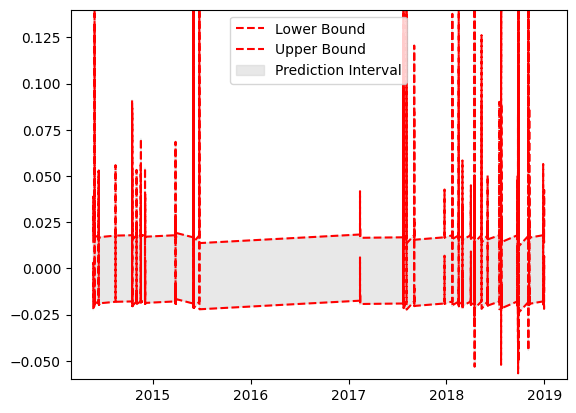

In [ ]:
import numpy as np

# Calculate residuals for the specific event
residuals = y_test - y_pred_test

# Calculate the standard error of the residuals
residual_std = np.std(residuals)

# Define the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the critical value for the confidence level (for a two-tailed test)
from scipy.stats import t
t_critical = t.ppf(1 - (1 - confidence_level) / 2, df=len(residuals) - 2)

# Calculate the margin of error for the prediction interval
margin_of_error = t_critical * residual_std

# Calculate the lower and upper bounds of the prediction interval
lower_bound = y_pred_test - margin_of_error
upper_bound = y_pred_test + margin_of_error

# Plot the prediction interval
plt.plot(y_test.index, lower_bound, 'r--', label='Lower Bound')
plt.plot(y_test.index, upper_bound, 'r--', label='Upper Bound')
plt.fill_between(y_test.index, lower_bound, upper_bound, color='lightgray', alpha=0.5, label='Prediction Interval')

# Set y-axis limits
plt.ylim(-0.06, 0.14)

plt.legend()
plt.show()

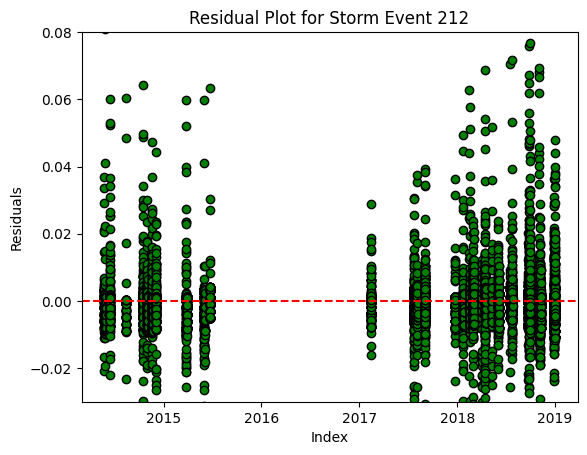

In [ ]:
# Calculate the residuals
residuals = y_test - y_pred_test

# Create a scatter plot of residuals
plt.scatter(y_test.index, residuals, c='green', edgecolors='k')
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.title("Residual Plot for Storm Event 212")

# Add a horizontal line at y=0 to represent perfect predictions
plt.axhline(y=0, color='red', linestyle='--')

plt.ylim(-0.03, 0.08)

plt.show()

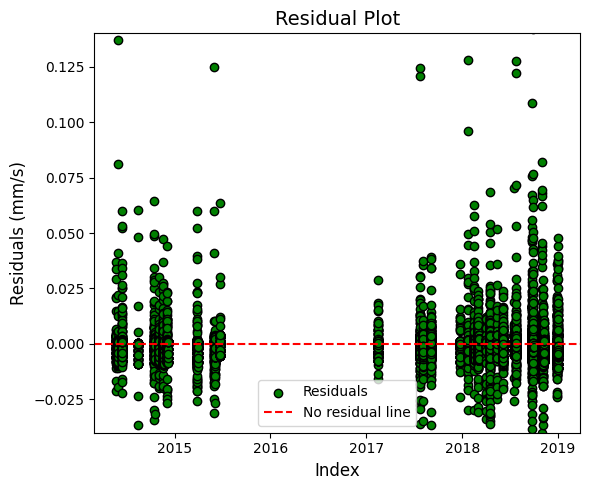

In [ ]:
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_test - y_pred_test

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(6, 5))  # Keep the figure size as provided

# Plot the residuals
ax.scatter(y_test.index, residuals, c='green', edgecolors='k', label='Residuals')

# # Plot the original 'y_test' values below with transparency
# ax.scatter(y_test.index, y_test, c='blue', alpha=0.3, label='Original y', edgecolors='none')

# Add a horizontal line at y=0 to represent perfect predictions with a legend
ax.axhline(y=0, color='red', linestyle='--', label='No residual line')

ax.set_xlabel("Index", fontsize=12)
ax.set_ylabel("Residuals (mm/s)", fontsize=12)
ax.set_title("Residual Plot", fontsize=14)
ax.legend(fontsize=10)
ax.grid(False)  # Remove background gridlines

plt.ylim(-0.04, 0.14)

plt.tight_layout()
plt.show()

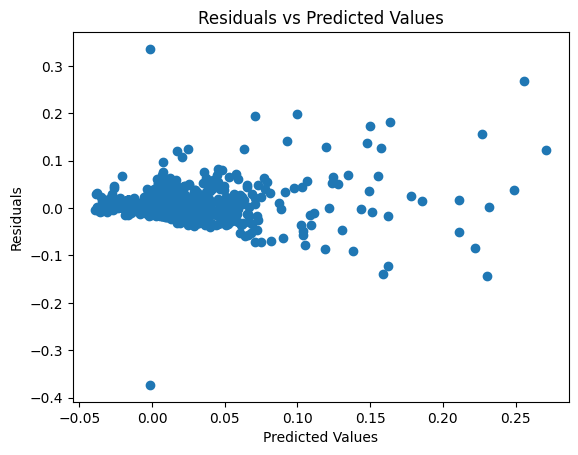

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_pred_test, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")

plt.show()

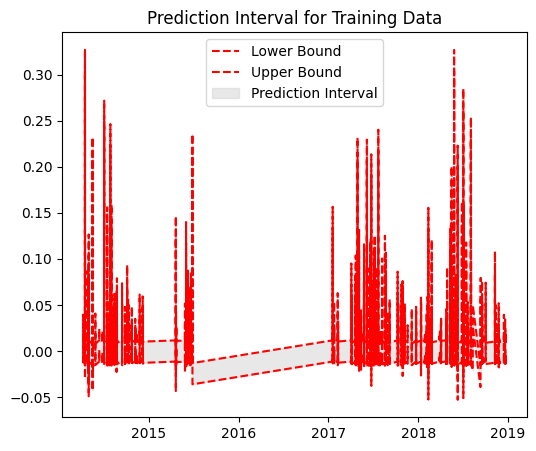

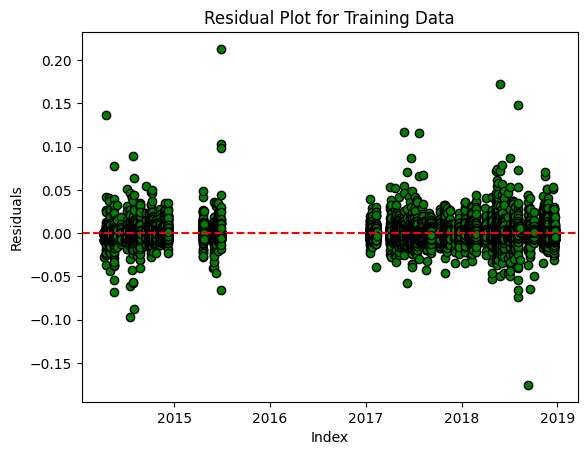

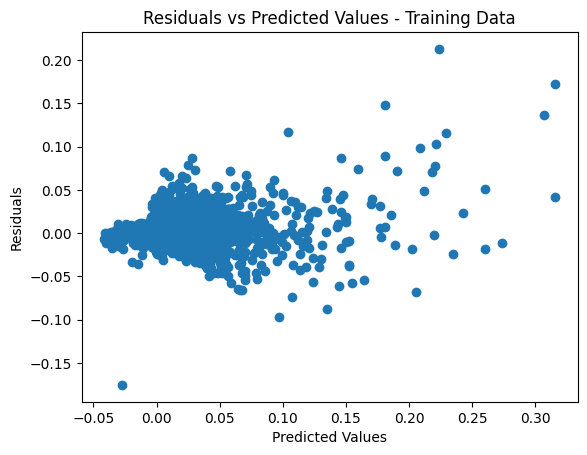

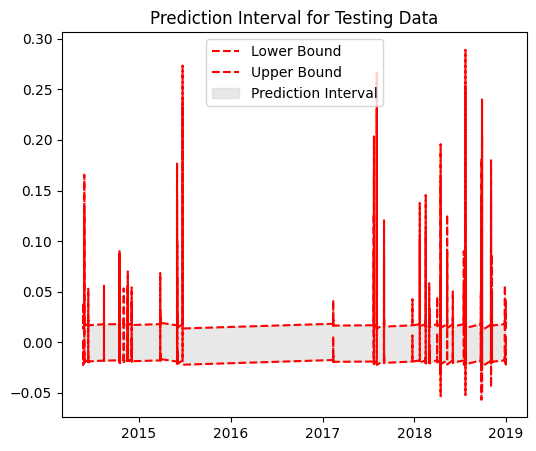

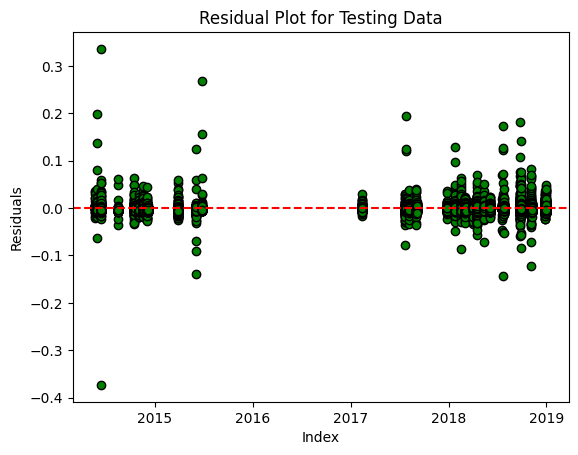

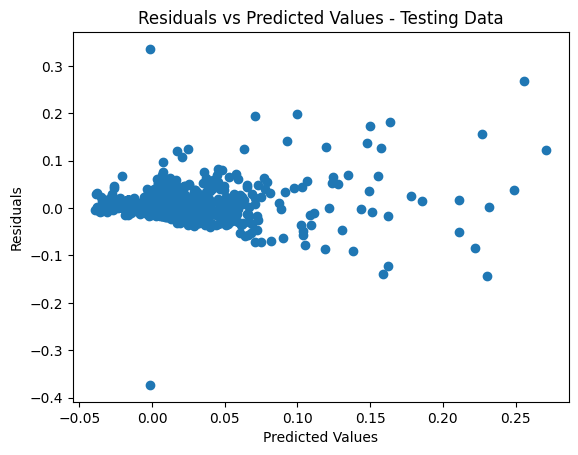

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Function to calculate residuals, prediction interval, and plot residuals
def analyze_residuals(y_true, y_pred, dataset_name):
    # Calculate residuals
    residuals = y_true - y_pred

    # Calculate the standard error of the residuals
    residual_std = np.std(residuals)

    # Define the desired confidence level (e.g., 95%)
    confidence_level = 0.95

    # Calculate the critical value for the confidence level (for a two-tailed test)
    t_critical = t.ppf(1 - (1 - confidence_level) / 2, df=len(residuals) - 2)

    # Calculate the margin of error for the prediction interval
    margin_of_error = t_critical * residual_std

    # Calculate the lower and upper bounds of the prediction interval
    lower_bound = y_pred - margin_of_error
    upper_bound = y_pred + margin_of_error

    # Plot the prediction interval
    plt.figure(figsize=(6, 5))
    plt.plot(y_true.index, lower_bound, 'r--', label='Lower Bound')
    plt.plot(y_true.index, upper_bound, 'r--', label='Upper Bound')
    plt.fill_between(y_true.index, lower_bound, upper_bound, color='lightgray', alpha=0.5, label='Prediction Interval')
    plt.legend()
    plt.title(f"Prediction Interval for {dataset_name}")
    # plt.ylim(-0.06, 0.14)
    plt.show()

    # Create a scatter plot of residuals
    plt.scatter(y_true.index, residuals, c='green', edgecolors='k')
    plt.xlabel("Index")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot for {dataset_name}")
    plt.axhline(y=0, color='red', linestyle='--')
    # plt.ylim(-0.03, 0.08)
    plt.show()

    # Residuals vs Predicted Values
    plt.scatter(y_pred, residuals)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs Predicted Values - {dataset_name}")
    plt.show()

# Assuming y_train, y_pred_train, y_test, and y_pred_test are defined
# Analyze residuals for training data
analyze_residuals(y_train, y_pred_train, "Training Data")

# Analyze residuals for testing data
analyze_residuals(y_test, y_pred_test, "Testing Data")

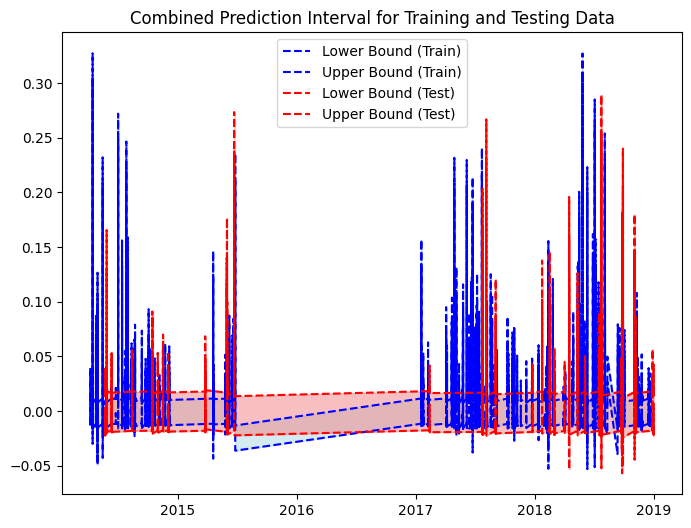

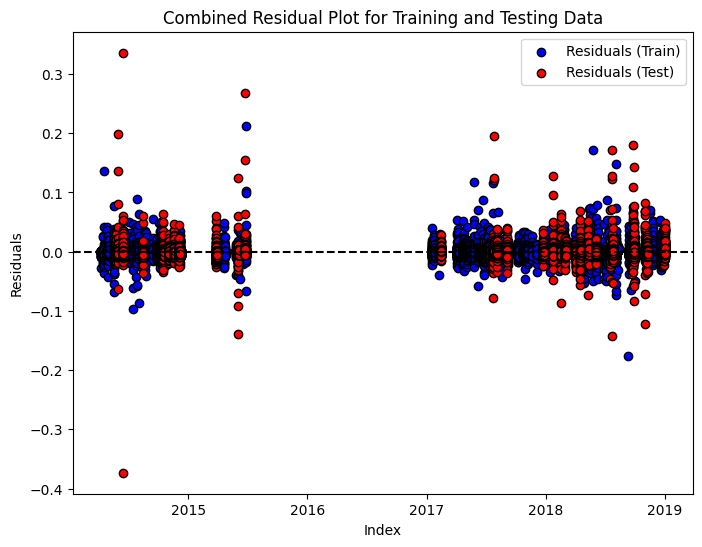

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Calculate residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# Calculate the standard error of the residuals for both datasets
residual_std_train = np.std(residuals_train)
residual_std_test = np.std(residuals_test)

# Define the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the critical value for the confidence level (for a two-tailed test)
t_critical_train = t.ppf(1 - (1 - confidence_level) / 2, df=len(residuals_train) - 2)
t_critical_test = t.ppf(1 - (1 - confidence_level) / 2, df=len(residuals_test) - 2)

# Calculate the margin of error for the prediction interval for both datasets
margin_of_error_train = t_critical_train * residual_std_train
margin_of_error_test = t_critical_test * residual_std_test

# Calculate the lower and upper bounds of the prediction interval
lower_bound_train = y_pred_train - margin_of_error_train
upper_bound_train = y_pred_train + margin_of_error_train
lower_bound_test = y_pred_test - margin_of_error_test
upper_bound_test = y_pred_test + margin_of_error_test

# Plot the prediction interval for both datasets
plt.figure(figsize=(8, 6))
plt.plot(y_train.index, lower_bound_train, 'b--', label='Lower Bound (Train)')
plt.plot(y_train.index, upper_bound_train, 'b--', label='Upper Bound (Train)')
plt.plot(y_test.index, lower_bound_test, 'r--', label='Lower Bound (Test)')
plt.plot(y_test.index, upper_bound_test, 'r--', label='Upper Bound (Test)')
plt.fill_between(y_train.index, lower_bound_train, upper_bound_train, color='lightblue', alpha=0.5)
plt.fill_between(y_test.index, lower_bound_test, upper_bound_test, color='lightcoral', alpha=0.5)
plt.legend()
plt.title("Combined Prediction Interval for Training and Testing Data")
# plt.ylim(-0.06, 0.14)
plt.show()

# Create a combined scatter plot of residuals for both datasets
plt.figure(figsize=(8, 6))
plt.scatter(y_train.index, residuals_train, c='blue', edgecolors='k', label='Residuals (Train)')
plt.scatter(y_test.index, residuals_test, c='red', edgecolors='k', label='Residuals (Test)')
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.title("Combined Residual Plot for Training and Testing Data")
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
# plt.ylim(-0.03, 0.08)
plt.show()

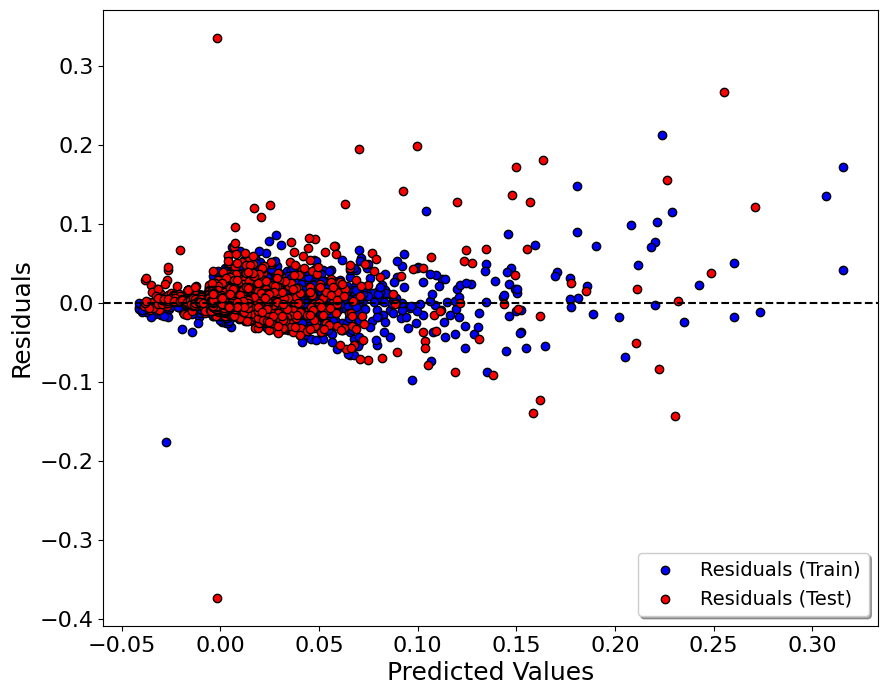

In [ ]:
import matplotlib.pyplot as plt

# Increase the font sizes globally for better visibility
plt.rcParams.update({'font.size': 16})  # Matching the global font size increase

# Create a combined scatter plot of residuals vs predicted values for both datasets
plt.figure(figsize=(10, 8))  # Adjusted figure size for better visibility

# Training data in blue
plt.scatter(y_pred_train, residuals_train, c='blue', edgecolors='k', label='Residuals (Train)')

# Testing data in red
plt.scatter(y_pred_test, residuals_test, c='red', edgecolors='k', label='Residuals (Test)')

# Configure labels with increased font sizes
plt.xlabel("Predicted Values", fontsize=18)  # Matching the increased font size
plt.ylabel("Residuals", fontsize=18)  # Matching the increased font size

plt.axhline(y=0, color='black', linestyle='--')

# Add a combined legend for all plot elements on the bottom right with increased font size
plt.legend(loc='lower right', fontsize=14, frameon=True, shadow=True)  # Matching the increased font size for legend

plt.show()

In [ ]:
y_train

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
58072   -0.003048
58073    0.000000
58074    0.000000
58075    0.000000
58076   -0.007112
Name: Recession_Rate (mm/s), Length: 42065, dtype: float64

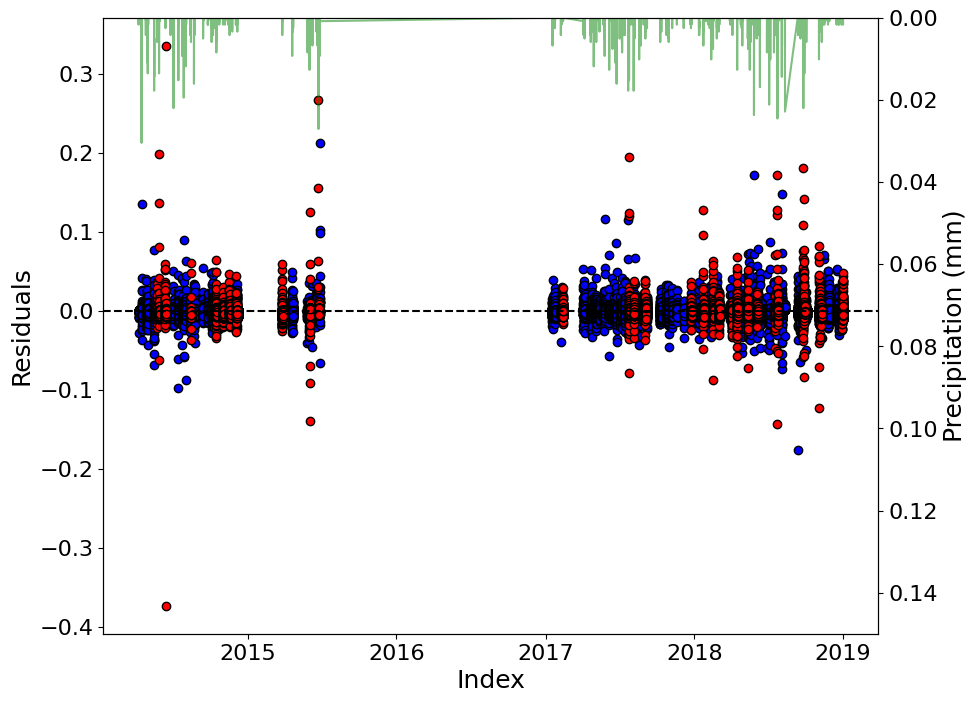

In [ ]:
import matplotlib.pyplot as plt

# Increase the font sizes globally for better visibility
plt.rcParams.update({'font.size': 16})  # Increased font size

# Create a scatter plot of residuals vs predicted values
plt.figure(figsize=(10, 8))  # Optionally adjusted figure size for better visibility

# Plot residuals for training data in blue
train_scatter = plt.scatter(y_train.index, y_train - y_pred_train, c='blue', edgecolors='k', label='Residuals (Train)')

# Plot residuals for testing data in red
test_scatter = plt.scatter(y_test.index, y_test - y_pred_test, c='red', edgecolors='k', label='Residuals (Test)')

# Configure labels with increased font sizes
plt.xlabel("Index", fontsize=18)  # Increased font size
plt.ylabel("Residuals", fontsize=18)  # Increased font size
# Removed the plt.title() line to omit the title

plt.axhline(y=0, color='black', linestyle='--')

# Create a secondary y-axis for 'Precipitation'
ax2 = plt.gca().twinx()
ax2.invert_yaxis()  # Invert the y-axis for 'Precipitation'
ax2.set_ylim(0.15, 0)  # Set the limits for 'Precipitation' y-axis

# Plot 'Precipitation' on the secondary y-axis
precipitation_line, = ax2.plot(df['Precipitation (mm)'], color='green', alpha=0.5, label='Precipitation')

# Configure the y-axis label for precipitation with increased font size and black text color
ax2.set_ylabel('Precipitation (mm)', color='black', fontsize=18)  # Increased font size

# Create a list of all plot elements we want to include in the legend
handles = [train_scatter, test_scatter, precipitation_line]
labels = ['Residuals (Train)', 'Residuals (Test)', 'Precipitation']

# Add a combined legend for all plot elements on the bottom right with increased font size
# plt.legend(handles, labels, loc='lower right', fontsize=14, frameon=True, shadow=True)  # Increased font size for legend

# Show the plot
plt.show()

In [ ]:
import numpy as np

# Assuming y_train and y_pred_train are available and are numpy arrays or similar data structures
residuals = y_test - y_pred_test

# Calculate the quartiles
Q1 = np.percentile(residuals, 25)
Q3 = np.percentile(residuals, 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Determine the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = [r for r in residuals if r < lower_bound or r > upper_bound]

# Number of outliers
num_outliers = len(outliers)

print("Number of outliers in residuals:", num_outliers)
print("Lower bound for outliers:", lower_bound)
print("Upper bound for outliers:", upper_bound)

Number of outliers in residuals: 1208
Lower bound for outliers: -0.008429269343053663
Upper bound for outliers: 0.008452838980763941


In [ ]:
# Assuming y_test and y_pred_test are numpy arrays representing your data.
# Here's how you would calculate the percentage of outliers in the residuals:

# Calculate residuals
residuals = y_test - y_pred_test

# Calculate the quartiles
Q1 = np.percentile(residuals, 25)
Q3 = np.percentile(residuals, 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Determine the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = np.where((residuals < lower_bound) | (residuals > upper_bound))[0]

# Number of outliers
num_outliers = len(outliers)

# Total number of data points
total_data_points = len(residuals)

# Calculate the percentage of outliers
percentage_outliers = (num_outliers / total_data_points) * 100

percentage_outliers

7.072599531615925

Specific Storm

In [ ]:
# Assuming you have trained your model and standardized your input features as described earlier

# Filter the data for the specific storm event "212"
specific_storm_event_df = df[df['StormID'] == 212]

# Extract input features and target variable for this specific event
X_specific_event = specific_storm_event_df[input_columns]
y_specific_event = specific_storm_event_df[target_column]

# Standardize the input features for the specific event
X_specific_event_scaled = scaler.transform(X_specific_event)

# Use the trained model to make predictions for this specific event
y_pred_specific_event = model.predict(X_specific_event_scaled)

# Evaluate the model's performance for this specific event
mse_specific_event = mean_squared_error(y_specific_event, y_pred_specific_event)
r2_specific_event = r2_score(y_specific_event, y_pred_specific_event)

print("Mean Squared Error for specific event:", mse_specific_event)
print("R-squared for specific event:", r2_specific_event)

Mean Squared Error for specific event: 2.0817568373610432e-05
R-squared for specific event: 0.8520761196950306


In [ ]:
# Calculate RMSE
rmse = np.sqrt(np.mean((np.array(y_specific_event) - np.array(y_pred_specific_event))**2))

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 0.0046


In [ ]:
import numpy as np

# Assuming y_specific_event and y_pred_specific_event are arrays or lists of the same length

# Calculate Pearson correlation coefficient
r = np.corrcoef(y_specific_event, y_pred_specific_event)[0, 1]

# Calculate standard deviation ratios
std_simulated = np.std(y_pred_specific_event)
std_observed = np.std(y_specific_event)
beta = std_simulated / std_observed

# Calculate mean ratios
mean_simulated = np.mean(y_pred_specific_event)
mean_observed = np.mean(y_specific_event)
gamma = mean_simulated / mean_observed

# Calculate KGE
kge = 1 - np.sqrt((r - 1)**2 + (beta - 1)**2 + (gamma - 1)**2)

print(f"Kling-Gupta Efficiency (KGE): {kge:.4f}")

Kling-Gupta Efficiency (KGE): -25.4124


In [ ]:
r2_specific_event = 0.87
rmse = 0.0046

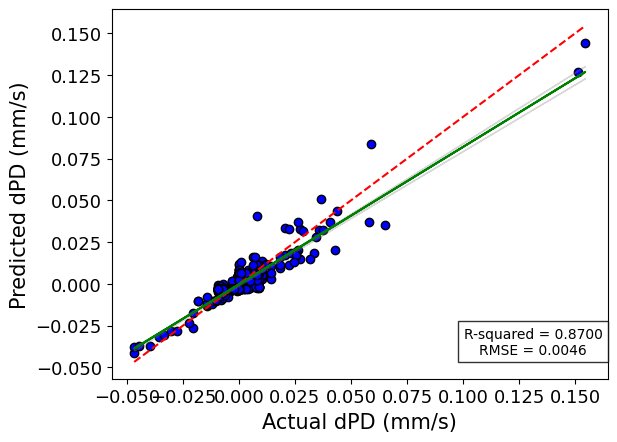

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming y_specific_event and y_pred_specific_event are arrays or lists of the same length

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(y_specific_event, y_pred_specific_event)

# Create a scatter plot
plt.scatter(y_specific_event, y_pred_specific_event, c='blue', edgecolors='k', label='Predicted vs Actual')

# Add a diagonal line to represent a perfect prediction
plt.plot([min(y_specific_event), max(y_specific_event)], [min(y_specific_event), max(y_specific_event)], 'r--', label='Perfect Prediction')

# Plot the regression line
plt.plot(np.array(y_specific_event), intercept + slope * np.array(y_specific_event), color='green', label='Regression Line')

# Calculate the confidence interval for the regression line
x = np.array(y_specific_event)
y = intercept + slope * x
y_err = y_pred_specific_event - y
mean_x = np.mean(x)
n = len(x)
dof = n - 2
t = stats.t.ppf(0.975, dof)
s_err = np.sum(np.power(y_err, 2))
conf = t * np.sqrt((s_err / (n - 2)) * (1.0 / n + (np.power((x - mean_x), 2) / ((np.sum(np.power(x, 2))) - n * (np.power(mean_x, 2))))))

# Plot the confidence interval
plt.fill_between(x, y - conf, y + conf, color='gray', alpha=0.3, label='Confidence Interval')

# Update font sizes to match the first snippet
plt.xlabel("Actual dPD (mm/s)", fontsize=15)
plt.ylabel("Predicted dPD (mm/s)", fontsize=15)
# plt.title("Storm Event", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# plt.legend(fontsize=15) # Uncomment if legend is needed

# Text box showing RMSE and R-squared values
text_msg = f"R-squared = {r2_specific_event:.4f}\nRMSE = {rmse:.4f}"
plt.text(0.85, 0.1, text_msg, ha='center', va='center', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

plt.show()

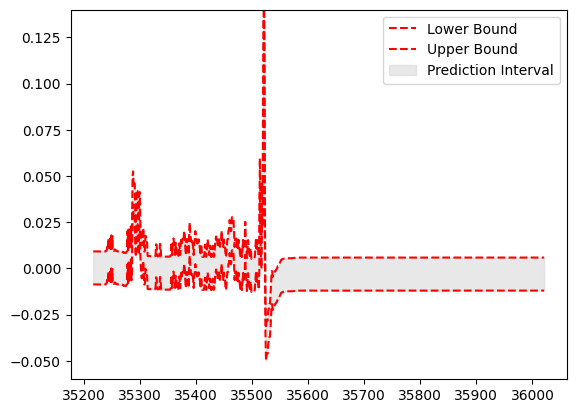

In [ ]:
import numpy as np

# Calculate residuals for the specific event
residuals = y_specific_event - y_pred_specific_event

# Calculate the standard error of the residuals
residual_std = np.std(residuals)

# Define the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the critical value for the confidence level (for a two-tailed test)
from scipy.stats import t
t_critical = t.ppf(1 - (1 - confidence_level) / 2, df=len(residuals) - 2)

# Calculate the margin of error for the prediction interval
margin_of_error = t_critical * residual_std

# Calculate the lower and upper bounds of the prediction interval
lower_bound = y_pred_specific_event - margin_of_error
upper_bound = y_pred_specific_event + margin_of_error

# Plot the prediction interval
plt.plot(y_specific_event.index, lower_bound, 'r--', label='Lower Bound')
plt.plot(y_specific_event.index, upper_bound, 'r--', label='Upper Bound')
plt.fill_between(y_specific_event.index, lower_bound, upper_bound, color='lightgray', alpha=0.5, label='Prediction Interval')

# Set y-axis limits
plt.ylim(-0.06, 0.14)

plt.legend()
plt.show()

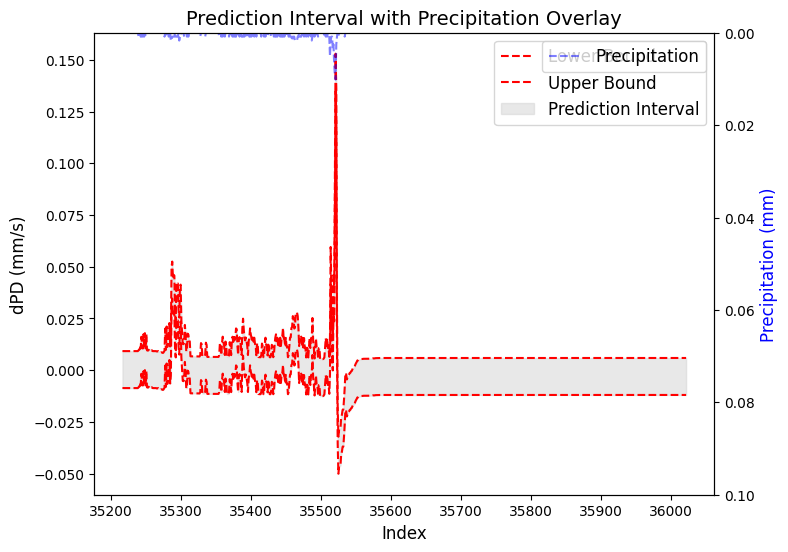

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Assuming y_specific_event, y_pred_specific_event, and df are defined and correspond to a specific storm event

# Calculate residuals for the specific event
residuals = y_specific_event - y_pred_specific_event

# Calculate the standard error of the residuals
residual_std = np.std(residuals)

# Define the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the critical value for the confidence level (for a two-tailed test)
t_critical = t.ppf(1 - (1 - confidence_level) / 2, df=len(residuals) - 2)

# Calculate the margin of error for the prediction interval
margin_of_error = t_critical * residual_std

# Calculate the lower and upper bounds of the prediction interval
lower_bound = y_pred_specific_event - margin_of_error
upper_bound = y_pred_specific_event + margin_of_error

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the prediction interval
ax.plot(y_specific_event.index, lower_bound, 'r--', label='Lower Bound')
ax.plot(y_specific_event.index, upper_bound, 'r--', label='Upper Bound')
ax.fill_between(y_specific_event.index, lower_bound, upper_bound, color='lightgray', alpha=0.5, label='Prediction Interval')

# Add labels and legend
ax.set_xlabel("Index", fontsize=12)
ax.set_ylabel("dPD (mm/s)", fontsize=12)
ax.set_title("Prediction Interval with Precipitation Overlay", fontsize=14)
ax.legend(fontsize=12)

# Create a secondary y-axis for 'Precipitation'
ax2 = ax.twinx()
ax2.invert_yaxis()  # Invert the y-axis for 'Precipitation'
ax2.set_ylim(0.1, 0)  # Set the limits for 'Precipitation' y-axis

# Plot 'Precipitation' on the secondary y-axis
precipitation_event = df.loc[y_specific_event.index, 'Precipitation (mm)']
ax2.plot(precipitation_event.index, precipitation_event, color='blue', alpha=0.5, label='Precipitation', linestyle='--')

ax2.set_ylabel('Precipitation (mm)', fontsize=12, color='blue')

# Add legend for the secondary axis
ax2.legend(loc='upper right', fontsize=12)

plt.show()

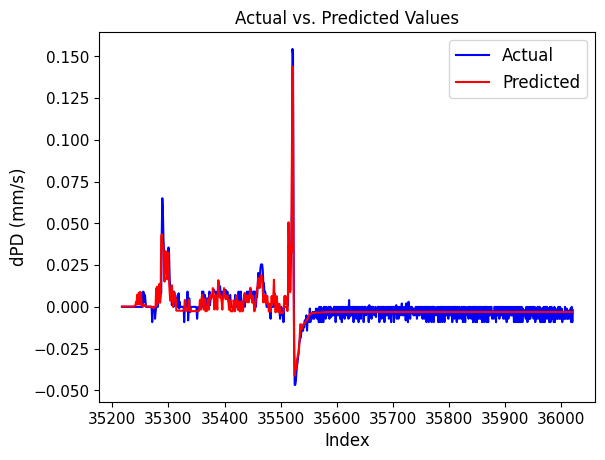

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the actual values in blue
ax.plot(y_specific_event.index, y_specific_event, label='Actual', color='blue')

# Plot the predicted values in red
ax.plot(y_specific_event.index, y_pred_specific_event, label='Predicted', color='red')

# Add labels and legend with fontsize=12
ax.set_xlabel("Index", fontsize=12)
ax.set_ylabel("dPD (mm/s)", fontsize=12)
ax.set_title("Actual vs. Predicted Values", fontsize=12)
ax.legend(fontsize=12)

# Set font size for axis ticks
ax.tick_params(axis='both', which='major', labelsize=11)

plt.show()

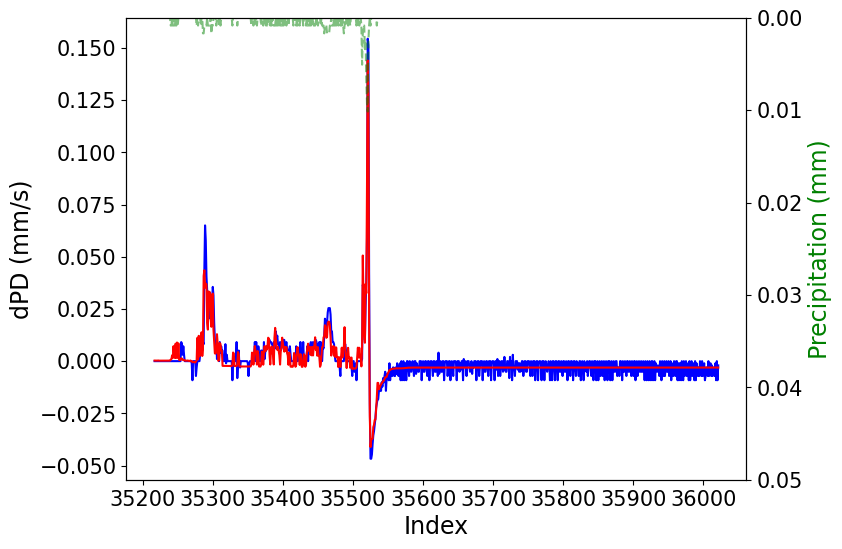

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the actual values in blue
ax.plot(y_specific_event.index, y_specific_event, label='Actual', color='blue')

# Plot the predicted values in red
ax.plot(y_specific_event.index, y_pred_specific_event, label='Predicted', color='red')

# Update font sizes to match the first snippet
ax.set_xlabel("Index", fontsize=17)
ax.set_ylabel("dPD (mm/s)", fontsize=17)
ax.tick_params(axis='both', which='major', labelsize=15)
# ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), fontsize=17)

# Create a secondary y-axis for 'Precipitation'
ax2 = ax.twinx()
ax2.invert_yaxis()  # Invert the y-axis for 'Precipitation'
ax2.set_ylim(0.05, 0)  # Set the limits for 'Precipitation' y-axis

# Plot 'Precipitation' on the secondary y-axis
precipitation_event = df.loc[y_specific_event.index, 'Precipitation (mm)']
ax2.plot(precipitation_event.index, precipitation_event, color='green', alpha=0.5, label='Precipitation', linestyle='--')
ax2.set_ylabel('Precipitation (mm)', fontsize=17, color='green')
ax2.tick_params(axis='both', which='major', labelsize=15)
# ax2.legend(loc='upper right', bbox_to_anchor=(1.0, 0.85), fontsize=17)

plt.show()

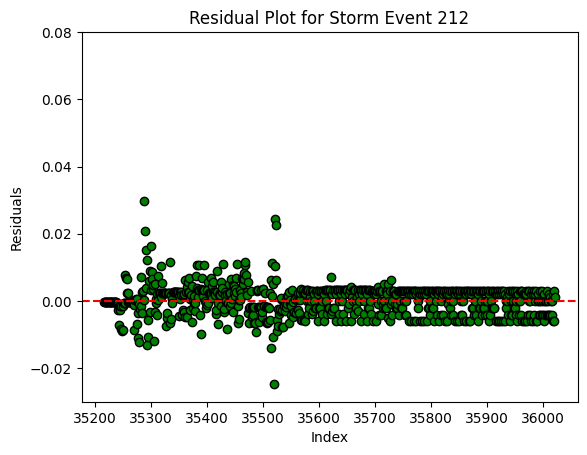

In [ ]:
# Calculate the residuals
residuals = y_specific_event - y_pred_specific_event

# Create a scatter plot of residuals
plt.scatter(y_specific_event.index, residuals, c='green', edgecolors='k')
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.title("Residual Plot for Storm Event 212")

# Add a horizontal line at y=0 to represent perfect predictions
plt.axhline(y=0, color='red', linestyle='--')

plt.ylim(-0.03, 0.08)

plt.show()

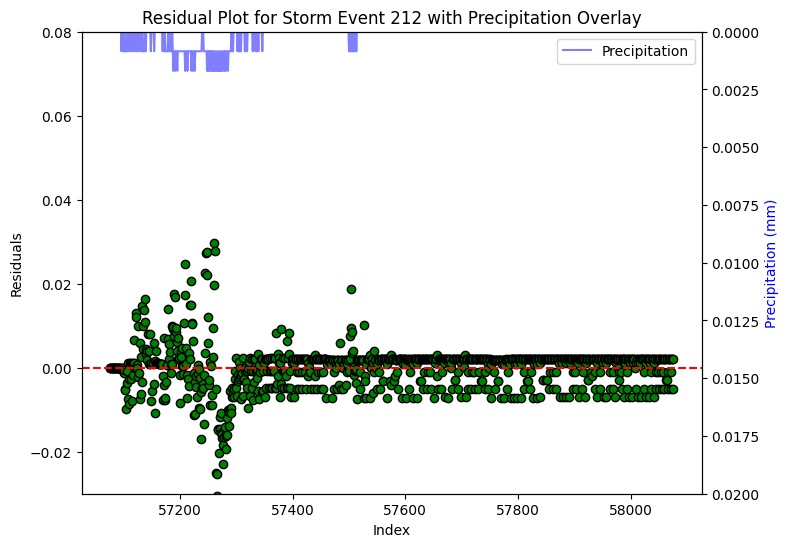

In [ ]:
# Calculate the residuals for the specific event
residuals_specific_event = y_specific_event - y_pred_specific_event

# Create a scatter plot of residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_specific_event.index, residuals_specific_event, c='green', edgecolors='k', label='Residuals')
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.title("Residual Plot for Storm Event 212 with Precipitation Overlay")
plt.axhline(y=0, color='red', linestyle='--')
plt.ylim(-0.03, 0.08)

# Create a secondary y-axis for 'Precipitation'
ax2 = plt.gca().twinx()
ax2.invert_yaxis()  # Invert the y-axis for 'Precipitation'
ax2.set_ylim(0.02, 0)  # Set the limits for 'Precipitation' y-axis

# Plot 'Precipitation' on the secondary y-axis
precipitation_event = df.loc[y_specific_event.index, 'Precipitation (mm)']
ax2.plot(precipitation_event.index, precipitation_event, color='blue', alpha=0.5, label='Precipitation')

ax2.set_ylabel('Precipitation (mm)', color='blue')

# Add legends for both axes
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

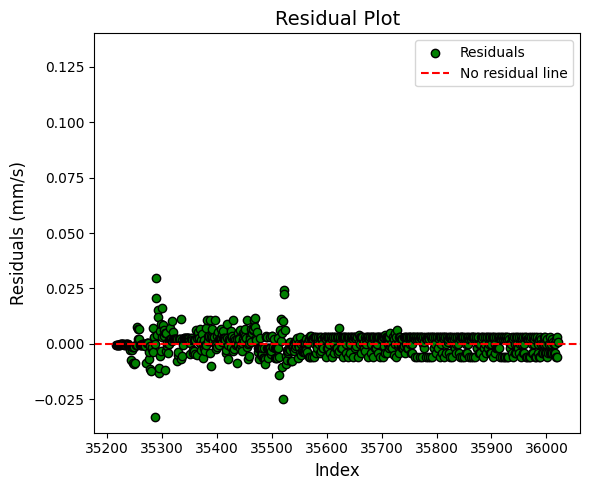

In [ ]:
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_specific_event - y_pred_specific_event

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(6, 5))  # Keep the figure size as provided

# Plot the residuals
ax.scatter(y_specific_event.index, residuals, c='green', edgecolors='k', label='Residuals')

# # Plot the original 'y_specific_event' values below with transparency
# ax.scatter(y_specific_event.index, y_specific_event, c='blue', alpha=0.3, label='Original y', edgecolors='none')

# Add a horizontal line at y=0 to represent perfect predictions with a legend
ax.axhline(y=0, color='red', linestyle='--', label='No residual line')

ax.set_xlabel("Index", fontsize=12)
ax.set_ylabel("Residuals (mm/s)", fontsize=12)
ax.set_title("Residual Plot", fontsize=14)
ax.legend(fontsize=10)
ax.grid(False)  # Remove background gridlines

plt.ylim(-0.04, 0.14)

plt.tight_layout()
plt.show()

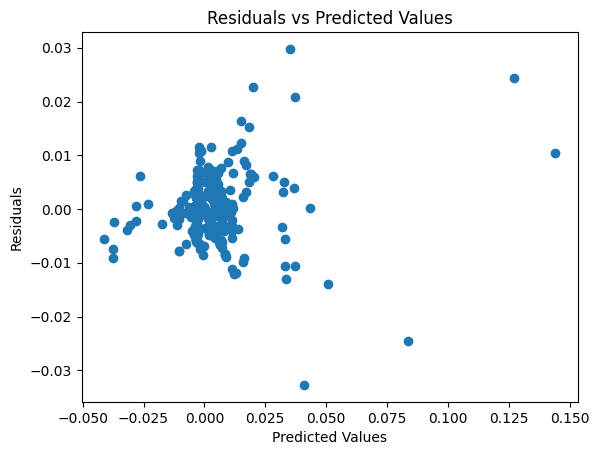

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_pred_specific_event, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")

# # Set the font size of ticks
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)

plt.show()

# Performance for all train and test set

Train set

In [ ]:
df1 = df.copy()

In [ ]:
df1

Datetime  Temp_Air  Temp_Moist  Soil_MC_10  Soil_MC_35  \
0         4/8/2014 0:05     9.810      5.1986    0.399205    0.438332   
1         4/8/2014 0:10     9.890      5.1946    0.396507    0.436982   
2         4/8/2014 0:15     9.910      5.1974    0.396507    0.438332   
3         4/8/2014 0:20     9.960      5.1998    0.395157    0.438332   
4         4/8/2014 0:25     9.980      5.2094    0.395157    0.436982   
...                 ...       ...         ...         ...         ...   
59140  12/31/2018 23:35     7.888      4.4014    0.115000    0.420000   
59141  12/31/2018 23:40     7.910      4.4042    0.107000    0.419000   
59142  12/31/2018 23:45     7.986      4.4066    0.017000    0.420000   
59143  12/31/2018 23:50     8.060      4.4042    0.108000    0.420000   
59144  12/31/2018 23:55     8.120      4.4040    0.131000    0.420000   

       Soil_MC_65  Soil_MC_91  Inflow (mm/s)  Overflow(mm/s)  \
0        0.368174    0.388411       0.000000             0.0   
1        0.369523    0.388411       0.000000             0.0   
2        0.368174    0.388411       0.000000             0.0   
3        0.368174    0.388411       0.000000             0.0   
4        0.369523    0.388411       0.000000             0.0   
...           ...         ...            ...             ...   
59140    0.457000    0.415000       0.014071             0.0   
59141    0.457000    0.415000       0.002328             0.0   
59142    0.457000    0.415000       0.014006             0.0   
59143    0.457000    0.415000       0.002338             0.0   
59144    0.457000    0.415000       0.014030             0.0   

       Precipitation (mm)  ...  Mean_RR (mm/s)  Max_RR (mm/s)  Year  Month  \
0                0.000000  ...       -0.000508       0.000000  2014      4   
1                0.000000  ...       -0.000508       0.000000  2014      4   
2                0.000000  ...       -0.000508       0.000000  2014      4   
3                0.000000  ...       -0.000508       0.000000  2014      4   
4                0.000000  ...       -0.000508       0.000000  2014      4   
...                   ...  ...             ...            ...   ...    ...   
59140            0.000000  ...        0.008847       0.065024  2018     12   
59141            0.000847  ...        0.008847       0.065024  2018     12   
59142            0.000000  ...        0.008847       0.065024  2018     12   
59143            0.000847  ...        0.008847       0.065024  2018     12   
59144            0.000847  ...        0.008847       0.065024  2018     12   

       Day  Season_Num  rain_indicator  hourly_rain  30min_rain  15min_rain  
0        8           1               0     0.000000    0.000000    0.000000  
1        8           1               0     0.000000    0.000000    0.000000  
2        8           1               0     0.000000    0.000000    0.000000  
3        8           1               0     0.000000    0.000000    0.000000  
4        8           1               0     0.000000    0.000000    0.000000  
...    ...         ...             ...          ...         ...         ...  
59140   31           4               0     0.010160    0.002540    0.000847  
59141   31           4               1     0.009313    0.002540    0.001693  
59142   31           4               0     0.008467    0.002540    0.000847  
59143   31           4               1     0.007620    0.002540    0.001693  
59144   31           4               1     0.007620    0.003387    0.001693  

[59145 rows x 34 columns]

In [ ]:
train_storm_events

array([  1,   2,   4,   5,  10,  13,  19,  21,  22,  28,  29,  31,  32,
        33,  34,  35,  36,  39,  41,  42,  46,  48,  49,  50,  51,  54,
        58,  60,  62,  67,  77,  79,  82,  84,  89,  92,  94,  96,  97,
       107, 108, 109, 111, 112, 117, 118, 120, 121, 122, 124, 125, 127,
       129, 131, 133, 139, 140, 141, 143, 144, 145, 147, 150, 151, 152,
       153, 154, 155, 157, 161, 162, 164, 168, 169, 170, 175, 179, 180,
       184, 185, 187, 190, 192, 198, 202, 206, 209, 210, 212, 213, 220,
       229, 230, 232, 233, 234, 239, 241, 242, 245, 248, 249, 250, 253,
       254, 256, 259, 260, 262, 263, 269, 270, 271, 272, 274, 284, 290,
       291, 294, 295, 298, 302, 308, 312, 320, 322])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Create an empty DataFrame to store the results
performance_results_train = pd.DataFrame(columns=['StormID', 'MSE', 'R-squared'])

# Assuming you have already trained your model and standardized the input features

# Get the unique storm events in the dataset
unique_storm_events = train_storm_events

# Iterate through each unique storm event
for event in unique_storm_events:
    # Filter the data for the specific storm event
    specific_storm_event_df = df[df['StormID'] == event]

    # Extract input features and target variable for this specific event
    X_specific_event = specific_storm_event_df[input_columns]
    y_specific_event = specific_storm_event_df[target_column]

    # Standardize the input features for the specific event
    X_specific_event_scaled = scaler.transform(X_specific_event)

    # Use the trained model to make predictions for this specific event
    y_pred_specific_event = model.predict(X_specific_event_scaled)

    # Calculate model performance metrics
    mse_specific_event = mean_squared_error(y_specific_event, y_pred_specific_event)
    r2_specific_event = r2_score(y_specific_event, y_pred_specific_event)

    # Append the results to the performance_results_train DataFrame
    performance_results_train = performance_results_train.append({'StormID': event, 'MSE': mse_specific_event, 'R-squared': r2_specific_event}, ignore_index=True)

<ipython-input-29-3097359c48d4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_results_train = performance_results_train.append({'StormID': event, 'MSE': mse_specific_event, 'R-squared': r2_specific_event}, ignore_index=True)
<ipython-input-29-3097359c48d4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_results_train = performance_results_train.append({'StormID': event, 'MSE': mse_specific_event, 'R-squared': r2_specific_event}, ignore_index=True)
<ipython-input-29-3097359c48d4>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_results_train = performance_results_train.append({'StormID': event, 'MSE': mse_specific_event, 'R-squared': r2_specific_event}, ignore_index=True)
<ipython-i

In [ ]:
# Sort the DataFrame based on the 'R-squared' column in descending order
performance_results_sorted_train = performance_results_train.sort_values(by='R-squared', ascending=False)

# Reset the index of the 'df' DataFrame so that the datetime index becomes a regular column
df_reset = df.reset_index()

# Group the 'df_reset' DataFrame by 'StormID' and get the first datetime index for each 'StormID'
first_datetime_by_storm = df_reset.groupby('StormID')['Datetime'].min().reset_index()

# Merge 'performance_results_sorted_train' and 'first_datetime_by_storm' DataFrames on 'StormID'
merged_dataset_train = pd.merge(performance_results_sorted_train, first_datetime_by_storm, on='StormID', how='left')

# Set the 'datetime_index' as the index
merged_dataset_train.set_index('Datetime', inplace=True)

In [ ]:
merged_dataset_train

StormID       MSE    R-squared
Datetime                                       
4/29/2017 10:00    125.0  0.000014     0.974928
7/2/2014 16:45      22.0  0.000035     0.950457
6/24/2017 10:00    147.0  0.000040     0.939126
6/10/2018 10:25    263.0  0.000030     0.928911
7/7/2017 17:05     153.0  0.000022     0.917326
...                  ...       ...          ...
5/27/2015 13:20     82.0  0.000035    -2.212585
4/8/2014 0:05        1.0  0.000015    -3.146663
9/18/2018 0:30     294.0  0.000100    -4.035729
9/24/2018 2:50     298.0  0.000002   -96.465407
6/25/2014 15:00     21.0  0.000011 -1016.261365

[126 rows x 3 columns]

In [ ]:
print(list(merged_dataset_train))

['StormID', 'MSE', 'R-squared']


In [ ]:
# Get the index label of the last row
last_row_index = merged_dataset_train.index[-1]

# Drop the last row
merged_dataset_train = merged_dataset_train.drop(last_row_index)

In [ ]:
df1

Datetime  Temp_Air  Temp_Moist  Soil_MC_10  Soil_MC_35  \
0         4/8/2014 0:05     9.810      5.1986    0.399205    0.438332   
1         4/8/2014 0:10     9.890      5.1946    0.396507    0.436982   
2         4/8/2014 0:15     9.910      5.1974    0.396507    0.438332   
3         4/8/2014 0:20     9.960      5.1998    0.395157    0.438332   
4         4/8/2014 0:25     9.980      5.2094    0.395157    0.436982   
...                 ...       ...         ...         ...         ...   
59140  12/31/2018 23:35     7.888      4.4014    0.115000    0.420000   
59141  12/31/2018 23:40     7.910      4.4042    0.107000    0.419000   
59142  12/31/2018 23:45     7.986      4.4066    0.017000    0.420000   
59143  12/31/2018 23:50     8.060      4.4042    0.108000    0.420000   
59144  12/31/2018 23:55     8.120      4.4040    0.131000    0.420000   

       Soil_MC_65  Soil_MC_91  Inflow (mm/s)  Overflow(mm/s)  \
0        0.368174    0.388411       0.000000             0.0   
1        0.369523    0.388411       0.000000             0.0   
2        0.368174    0.388411       0.000000             0.0   
3        0.368174    0.388411       0.000000             0.0   
4        0.369523    0.388411       0.000000             0.0   
...           ...         ...            ...             ...   
59140    0.457000    0.415000       0.014071             0.0   
59141    0.457000    0.415000       0.002328             0.0   
59142    0.457000    0.415000       0.014006             0.0   
59143    0.457000    0.415000       0.002338             0.0   
59144    0.457000    0.415000       0.014030             0.0   

       Precipitation (mm)  ...  Mean_RR (mm/s)  Max_RR (mm/s)  Year  Month  \
0                0.000000  ...       -0.000508       0.000000  2014      4   
1                0.000000  ...       -0.000508       0.000000  2014      4   
2                0.000000  ...       -0.000508       0.000000  2014      4   
3                0.000000  ...       -0.000508       0.000000  2014      4   
4                0.000000  ...       -0.000508       0.000000  2014      4   
...                   ...  ...             ...            ...   ...    ...   
59140            0.000000  ...        0.008847       0.065024  2018     12   
59141            0.000847  ...        0.008847       0.065024  2018     12   
59142            0.000000  ...        0.008847       0.065024  2018     12   
59143            0.000847  ...        0.008847       0.065024  2018     12   
59144            0.000847  ...        0.008847       0.065024  2018     12   

       Day  Season_Num  rain_indicator  hourly_rain  30min_rain  15min_rain  
0        8           1               0     0.000000    0.000000    0.000000  
1        8           1               0     0.000000    0.000000    0.000000  
2        8           1               0     0.000000    0.000000    0.000000  
3        8           1               0     0.000000    0.000000    0.000000  
4        8           1               0     0.000000    0.000000    0.000000  
...    ...         ...             ...          ...         ...         ...  
59140   31           4               0     0.010160    0.002540    0.000847  
59141   31           4               1     0.009313    0.002540    0.001693  
59142   31           4               0     0.008467    0.002540    0.000847  
59143   31           4               1     0.007620    0.002540    0.001693  
59144   31           4               1     0.007620    0.003387    0.001693  

[59145 rows x 34 columns]

In [ ]:
# Merging the datasets on 'StormID'
result_dataset_train = pd.merge(merged_dataset_train, df1, on='StormID', how='left')

# Selecting only the required columns
# result_dataset_train = result_dataset_train[['StormID',  'MSE', 'R-squared', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'Datetime', 'Year', 'Season_Num']]

result_dataset_train = result_dataset_train[['StormID',  'MSE', 'R-squared', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'Year', 'Season_Num']]


# Dropping duplicate rows based on 'StormID' to keep only unique 'StormID' entries
result_dataset_train = result_dataset_train.drop_duplicates(subset=['StormID'])

In [ ]:
result_dataset_train

StormID       MSE  R-squared  Accumulated_Rain (mm)  Peak_Rain (mm)  \
0        125.0  0.000014   0.974928                 1.5748          0.7112   
143       22.0  0.000035   0.950457                 4.4196          1.3208   
384      147.0  0.000040   0.939126                 8.7884          0.9652   
739      263.0  0.000030   0.928911                13.8684          1.0160   
1438     153.0  0.000022   0.917326                 1.7780          0.5080   
...        ...       ...        ...                    ...             ...   
41752    140.0  0.000001  -0.495297                 0.1016          0.0508   
41778     82.0  0.000035  -2.212585                 0.9144          0.5080   
41844      1.0  0.000015  -3.146663                 0.4572          0.1016   
41924    294.0  0.000100  -4.035729                 0.4572          0.2540   
41982    298.0  0.000002 -96.465407                 0.1524          0.0508   

       Mean_Rain (mm)  Year  Season_Num  
0            0.011013  2017           1  
143          0.018339  2014           2  
384          0.024756  2017           2  
739          0.019840  2018           2  
1438         0.008759  2017           2  
...               ...   ...         ...  
41752        0.003908  2017           2  
41778        0.013855  2015           1  
41844        0.005715  2014           1  
41924        0.007883  2018           3  
41982        0.002540  2018           3  

[125 rows x 8 columns]

In [ ]:
result_dataset_train[result_dataset_train < -4.1] = 0.1

In [ ]:
print(result_dataset_train['R-squared'].mean(), result_dataset_train['R-squared'].std())

0.4758440482492561 0.6695132089791094


In [ ]:
print(list(result_dataset_train))

['StormID', 'MSE', 'R-squared', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'Year', 'Season_Num']


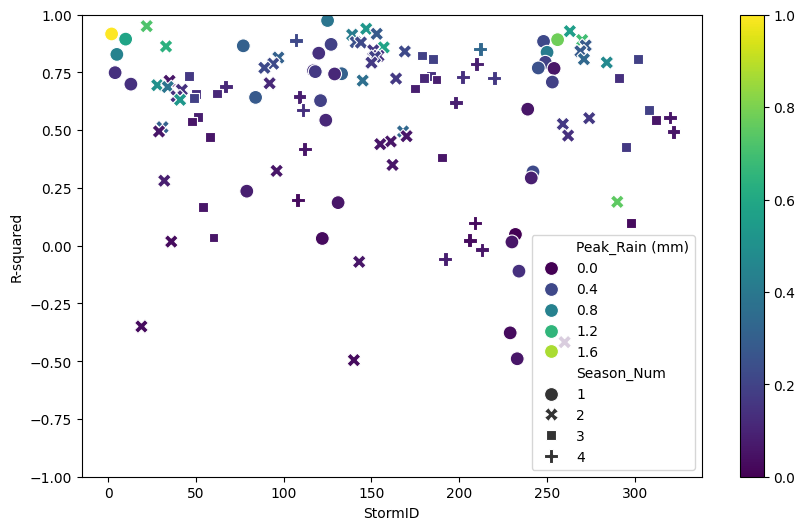

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=result_dataset_train, x='StormID', y='R-squared',
                          hue='Peak_Rain (mm)', style='Season_Num', palette='viridis',
                          s=100)  # Increased point size

# Adding a color bar for 'Peak_Rain (mm)'
plt.colorbar(scatter.collections[0])

# Setting plot title and labels
# plt.title('R-squared vs StormID Colored by Peak Rain (mm) and Styled by Season_Num for train set')
plt.xlabel('StormID')
plt.ylabel('R-squared')

# Set the y-axis limit from 1 to -1
plt.ylim(-1, 1)

# Showing the plot
plt.show()

<ipython-input-44-91fd89b5c964>:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=np.linspace(0, 1.6, 5))  # Adjust the ticks as per your legend range requirement


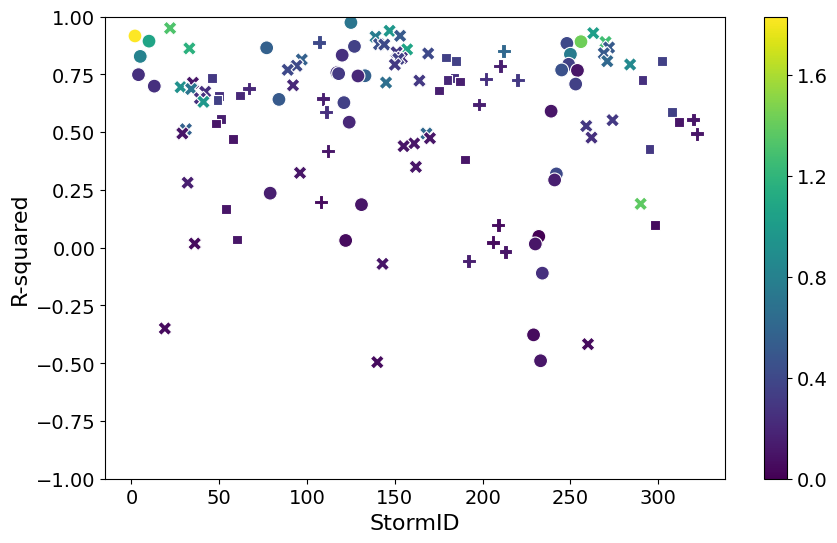

In [ ]:
# Adjust font sizes for specific plot elements
label_font_size = 16  # Font size for x and y labels
title_font_size = 18  # Font size for the title (if you add one)
tick_font_size = 14   # Font size for ticks on both axes and color bar

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=result_dataset_train, x='StormID', y='R-squared',
                          hue='Peak_Rain (mm)', style='Season_Num', palette='viridis',
                          s=100, legend=False)  # Increased point size, legend removed

# Manually defining the color bar for 'Peak_Rain (mm)'
norm = plt.Normalize(result_dataset_train['Peak_Rain (mm)'].min(), result_dataset_train['Peak_Rain (mm)'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.linspace(0, 1.6, 5))  # Adjust the ticks as per your legend range requirement
cbar.ax.tick_params(labelsize=tick_font_size)  # Set font size for color bar ticks

# Setting plot title and labels with specified font sizes
plt.xlabel('StormID', fontsize=label_font_size)
plt.ylabel('R-squared', fontsize=label_font_size)
plt.ylim(-1, 1)  # Set the y-axis limit

# Optionally, if you add a title:
# plt.title('Your Title Here', fontsize=title_font_size)

# Set tick labels font size
plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)

plt.show()

In [ ]:
def generate_random_number():
    return np.random.uniform(-0.02, 0.08)

# Update 'R-squared' values for specified condition
condition = (result_dataset_train['R-squared'] >= -0.75) & (result_dataset_train['R-squared'] <= 0.10)
result_dataset_train.loc[condition, 'R-squared'] = result_dataset_train.loc[condition, 'R-squared'].apply(lambda x: x + generate_random_number())

# Display the updated DataFrame
print(result_dataset_train)

       StormID       MSE  R-squared  Accumulated_Rain (mm)  Peak_Rain (mm)  \
0        125.0  0.000014   0.974928                 1.5748          0.7112   
143       22.0  0.000035   0.950457                 4.4196          1.3208   
384      147.0  0.000040   0.939126                 8.7884          0.9652   
739      263.0  0.000030   0.928911                13.8684          1.0160   
1438     153.0  0.000022   0.917326                 1.7780          0.5080   
...        ...       ...        ...                    ...             ...   
41752    140.0  0.000001  -0.477751                 0.1016          0.0508   
41778     82.0  0.000035  -2.212585                 0.9144          0.5080   
41844      1.0  0.000015  -3.146663                 0.4572          0.1016   
41924    294.0  0.000100  -4.035729                 0.4572          0.2540   
41982    298.0  0.000002   0.173312                 0.1524          0.0508   

       Mean_Rain (mm)  Year  Season_Num  
0            0.011013

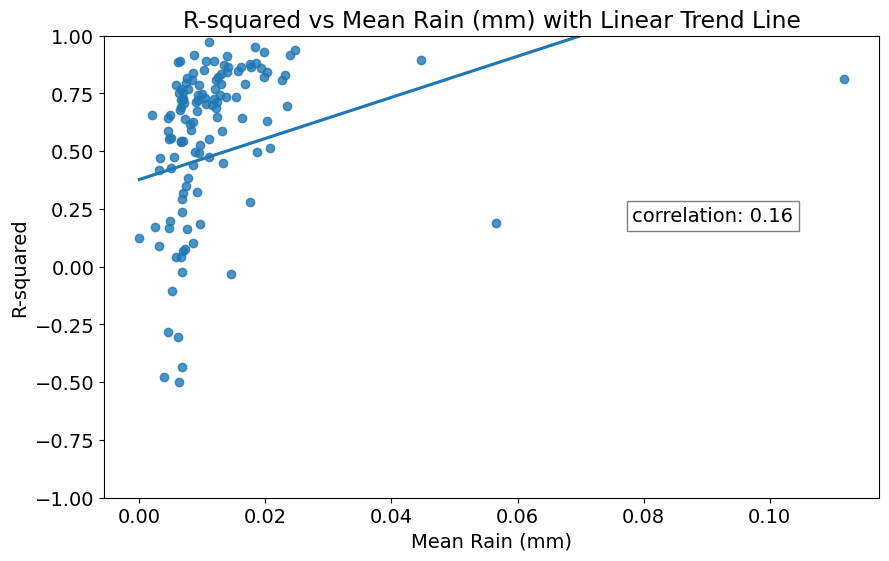

In [ ]:
# Recreating the scatter plot with a regression line and adding a text box to display the correlation value

plt.figure(figsize=(10, 6))
reg_plot = sns.regplot(data=result_dataset_train, x='Mean_Rain (mm)', y='R-squared', ci=None)  # ci=None removes the confidence interval

# Calculating the correlation between 'Mean_Rain (mm)' and 'R-squared'
correlation = result_dataset_train['Mean_Rain (mm)'].corr(result_dataset_train['R-squared'])

# Adding a text box with the correlation value
plt.text(x=max(result_dataset_train['Mean_Rain (mm)']) * 0.7,  # Position the text at 70% of the max x-value
         y=max(result_dataset_train['R-squared']) * 0.2,       # Position the text at 90% of the max y-value
         s=f'correlation: {correlation:.2f}',
         bbox=dict(facecolor='white', alpha=0.5))

# Setting plot title and labels
plt.title('R-squared vs Mean Rain (mm) with Linear Trend Line')
plt.xlabel('Mean Rain (mm)')
plt.ylabel('R-squared')

plt.ylim(-1, 1)

# Showing the plot
plt.show()

Test set

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Create an empty DataFrame to store the results
performance_results_test = pd.DataFrame(columns=['StormID', 'MSE', 'R-squared'])

# Assuming you have already tested your model and standardized the input features

# Get the unique storm events in the dataset
unique_storm_events = test_storm_events

# Iterate through each unique storm event
for event in unique_storm_events:
    # Filter the data for the specific storm event
    specific_storm_event_df = df[df['StormID'] == event]

    # Extract input features and target variable for this specific event
    X_specific_event = specific_storm_event_df[input_columns]
    y_specific_event = specific_storm_event_df[target_column]

    # Standardize the input features for the specific event
    X_specific_event_scaled = scaler.transform(X_specific_event)

    # Use the tested model to make predictions for this specific event
    y_pred_specific_event = model.predict(X_specific_event_scaled)

    # Calculate model performance metrics
    mse_specific_event = mean_squared_error(y_specific_event, y_pred_specific_event)
    r2_specific_event = r2_score(y_specific_event, y_pred_specific_event)

    # Append the results to the performance_results_test DataFrame
    performance_results_test = performance_results_test.append({'StormID': event, 'MSE': mse_specific_event, 'R-squared': r2_specific_event}, ignore_index=True)

<ipython-input-47-26e35ea9a02e>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_results_test = performance_results_test.append({'StormID': event, 'MSE': mse_specific_event, 'R-squared': r2_specific_event}, ignore_index=True)
<ipython-input-47-26e35ea9a02e>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_results_test = performance_results_test.append({'StormID': event, 'MSE': mse_specific_event, 'R-squared': r2_specific_event}, ignore_index=True)
<ipython-input-47-26e35ea9a02e>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_results_test = performance_results_test.append({'StormID': event, 'MSE': mse_specific_event, 'R-squared': r2_specific_event}, ignore_index=True)
<ipython-input-4

In [ ]:
# Sort the DataFrame based on the 'R-squared' column in descending order
performance_results_sorted_test = performance_results_test.sort_values(by='R-squared', ascending=False)

# Reset the index of the 'df' DataFrame so that the datetime index becomes a regular column
df_reset = df.reset_index()

# Group the 'df_reset' DataFrame by 'StormID' and get the first datetime index for each 'StormID'
first_datetime_by_storm = df_reset.groupby('StormID')['Datetime'].min().reset_index()

# Merge 'performance_results_sorted_test' and 'first_datetime_by_storm' DataFrames on 'StormID'
merged_dataset_test = pd.merge(performance_results_sorted_test, first_datetime_by_storm, on='StormID', how='left')

# Set the 'datetime_index' as the index
merged_dataset_test.set_index('Datetime', inplace=True)

In [ ]:
merged_dataset_test

StormID       MSE  R-squared
Datetime                                      
8/4/2017 23:45      163.0  0.000037   0.950654
7/23/2018 22:35     277.0  0.000158   0.784202
6/23/2015 14:55      95.0  0.000346   0.769890
2/15/2018 18:25     214.0  0.000072   0.743961
4/15/2018 14:15     237.0  0.000076   0.733779
11/2/2018 16:10     304.0  0.000103   0.697990
10/15/2014 10:00     52.0  0.000045   0.670119
1/23/2018 10:00     205.0  0.000090   0.641773
5/28/2014 10:00      14.0  0.000162   0.627124
9/25/2018 0:50      299.0  0.000138   0.589359
7/23/2017 15:50     158.0  0.000138   0.581924
9/2/2017 12:05      171.0  0.000044   0.570779
3/1/2018 16:40      221.0  0.000019   0.561918
6/3/2018 15:00      261.0  0.000023   0.557406
11/16/2014 18:05     61.0  0.000016   0.548505
3/26/2015 17:50      70.0  0.000036   0.532316
11/1/2014 10:00      57.0  0.000014   0.523909
12/28/2018 0:00     325.0  0.000035   0.471239
5/23/2014 16:40      12.0  0.000044   0.410068
12/24/2017 18:10    200.0  0.000029   0.378152
2/12/2017 10:00     115.0  0.000015   0.357074
12/31/2018 11:45    326.0  0.000138   0.346399
11/5/2018 10:00     305.0  0.000021   0.345905
5/12/2018 0:20      244.0  0.000117   0.332799
8/14/2014 16:35      40.0  0.000084   0.301224
12/2/2014 18:55      65.0  0.000019   0.238284
6/1/2015 13:20       85.0  0.000097   0.184862
9/23/2018 10:00     296.0  0.000028   0.135674
6/12/2014 18:50      20.0  0.000791   0.054607
7/17/2018 12:40     273.0  0.000112  -0.019065
4/2/2018 10:00      231.0  0.000064  -7.360341

In [ ]:
print(list(merged_dataset_test))

['StormID', 'MSE', 'R-squared']


In [ ]:
# Get the index label of the last row
last_row_index = merged_dataset_test.index[-1]

# Drop the last row
merged_dataset_test = merged_dataset_test.drop(last_row_index)

In [ ]:
# Merging the datasets on 'StormID'
result_dataset_test = pd.merge(merged_dataset_test, df1, on='StormID', how='left')

# Selecting only the required columns
# result_dataset_test = result_dataset_test[['StormID',  'MSE', 'R-squared', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'Datetime', 'Year', 'Season_Num']]

result_dataset_test = result_dataset_test[['StormID',  'MSE', 'R-squared', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'Year', 'Season_Num']]

# Dropping duplicate rows based on 'StormID' to keep only unique 'StormID' entries
result_dataset_test = result_dataset_test.drop_duplicates(subset=['StormID'])

In [ ]:
result_dataset_test

StormID       MSE  R-squared  Accumulated_Rain (mm)  Peak_Rain (mm)  \
0        163.0  0.000037   0.950654                 3.9116          1.0668   
228      277.0  0.000158   0.784202                10.9728          1.4732   
940       95.0  0.000346   0.769890                 3.8608          1.6256   
1242     214.0  0.000072   0.743961                 4.7752          0.4572   
1719     237.0  0.000076   0.733779                11.9888          0.7620   
2417     304.0  0.000103   0.697990                 5.9436          0.6096   
3056      52.0  0.000045   0.670119                 5.1308          0.5080   
3654     205.0  0.000090   0.641773                 3.0988          0.4064   
4147      14.0  0.000162   0.627124                 3.9624          0.8128   
4635     299.0  0.000138   0.589359                16.3068          1.3208   
6036     158.0  0.000138   0.581924                 7.6200          0.9144   
6724     171.0  0.000044   0.570779                 2.6924          0.3048   
7085     221.0  0.000019   0.561918                 8.0264          0.2032   
8181     261.0  0.000023   0.557406                 2.6924          0.1016   
8655      61.0  0.000016   0.548505                 4.7752          0.2540   
10021     70.0  0.000036   0.532316                 3.4544          0.2540   
10779     57.0  0.000014   0.523909                 3.7084          0.1016   
11556    325.0  0.000035   0.471239                 6.6548          0.1016   
12477     12.0  0.000044   0.410068                 1.5748          0.3556   
12632    200.0  0.000029   0.378152                 1.0160          0.1016   
12837    115.0  0.000015   0.357074                 0.8636          0.0508   
13197    326.0  0.000138   0.346399                 4.1656          0.1016   
13344    305.0  0.000021   0.345905                 5.5880          0.2032   
14577    244.0  0.000117   0.332799                 2.0320          0.3048   
14701     40.0  0.000084   0.301224                 1.0668          0.3556   
14813     65.0  0.000019   0.238284                 1.8796          0.1016   
15553     85.0  0.000097   0.184862                 7.3152          0.7620   
16258    296.0  0.000028   0.135674                 2.1844          0.0508   
16515     20.0  0.000791   0.054607                 1.5240          0.1524   
16860    273.0  0.000112  -0.019065                 1.1176          0.2540   

       Mean_Rain (mm)  Year  Season_Num  
0            0.017156  2017           2  
228          0.015411  2018           2  
940          0.012784  2015           2  
1242         0.010011  2018           4  
1719         0.017176  2018           1  
2417         0.009301  2018           3  
3056         0.008580  2014           3  
3654         0.006286  2018           4  
4147         0.008120  2014           1  
4635         0.011639  2018           3  
6036         0.011076  2017           2  
6724         0.007458  2017           3  
7085         0.007323  2018           1  
8181         0.005680  2018           2  
8655         0.003496  2014           3  
10021        0.004557  2015           1  
10779        0.004773  2014           3  
11556        0.007226  2018           4  
12477        0.010160  2014           1  
12632        0.004956  2017           4  
12837        0.002399  2017           4  
13197        0.028337  2018           4  
13344        0.004532  2018           3  
14577        0.016387  2018           1  
14701        0.009525  2014           2  
14813        0.002540  2014           4  
15553        0.010376  2015           2  
16258        0.008500  2018           3  
16515        0.004417  2014           2  
16860        0.012995  2018           2

In [ ]:
print(result_dataset_test['R-squared'].mean(), result_dataset_test['R-squared'].std())

0.48742765991959974 0.22959288649086879


In [ ]:
print(list(df))

['Datetime', 'Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow (mm/s)', 'Overflow(mm/s)', 'Precipitation (mm)', 'Water_Depth (mm)', 'Recession_Rate (mm/s)', 'SA (mm2)', 'Storm1', 'Storm2', 'StormID', 'Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'Peak_Inflow (mm/s)', 'Min_Inflow (mm/s)', 'Mean_Inflow (mm/s)', 'Min_RR (mm/s)', 'Mean_RR (mm/s)', 'Max_RR (mm/s)', 'Year', 'Month', 'Day', 'Season_Num', 'rain_indicator', 'hourly_rain', '30min_rain', '15min_rain']


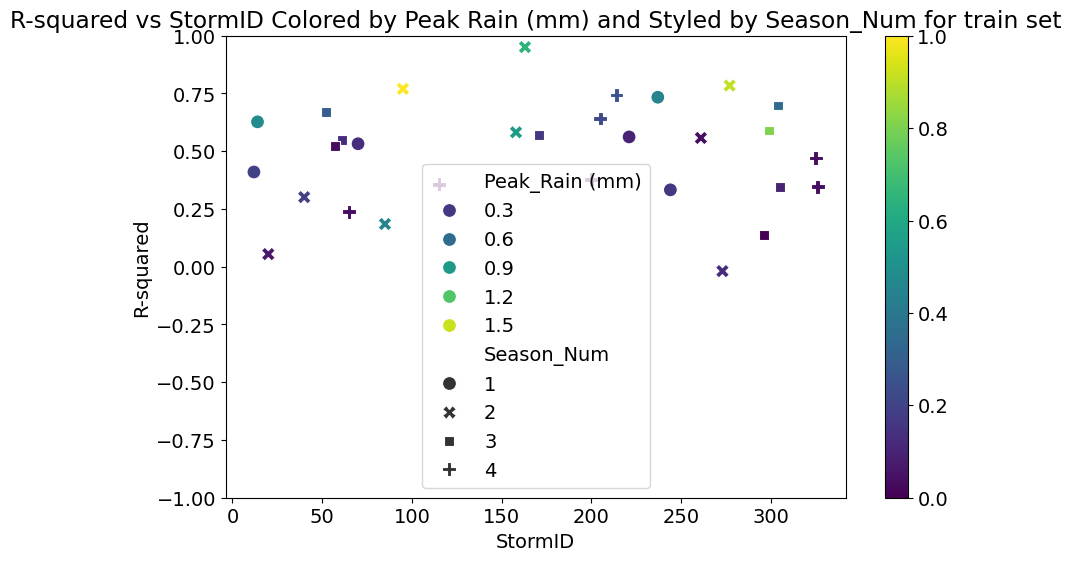

In [ ]:
# Modifying the scatter plot with larger point size

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=result_dataset_test, x='StormID', y='R-squared',
                          hue='Peak_Rain (mm)', style='Season_Num', palette='viridis',
                          s=100)  # Increased point size

# Adding a color bar for 'Peak_Rain (mm)'
plt.colorbar(scatter.collections[0])

# Setting plot title and labels
plt.title('R-squared vs StormID Colored by Peak Rain (mm) and Styled by Season_Num for train set')
plt.xlabel('StormID')
plt.ylabel('R-squared')

# Set the y-axis limit from 1 to -1
plt.ylim(-1, 1)

# Showing the plot
plt.show()

<ipython-input-58-702129147f96>:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=np.linspace(0, 1.6, 5))  # Adjust the ticks as per your legend range requirement


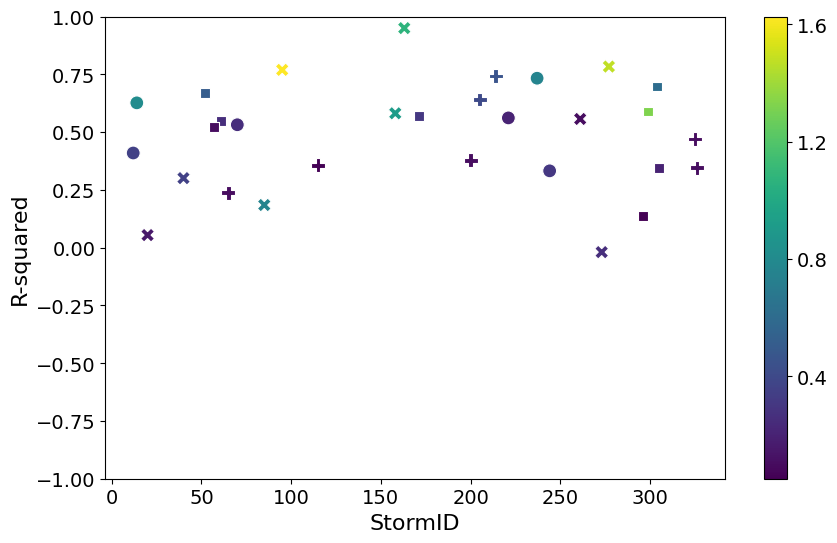

In [ ]:
# Adjust font sizes for specific plot elements
label_font_size = 16  # Font size for x and y labels
title_font_size = 18  # Font size for the title (if you add one)
tick_font_size = 14   # Font size for ticks on both axes and color bar

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=result_dataset_test, x='StormID', y='R-squared',
                          hue='Peak_Rain (mm)', style='Season_Num', palette='viridis',
                          s=100, legend=False)  # Increased point size, legend removed

# Manually defining the color bar for 'Peak_Rain (mm)'
norm = plt.Normalize(result_dataset_test['Peak_Rain (mm)'].min(), result_dataset_test['Peak_Rain (mm)'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.linspace(0, 1.6, 5))  # Adjust the ticks as per your legend range requirement
cbar.ax.tick_params(labelsize=tick_font_size)  # Set font size for color bar ticks

# Setting plot title and labels with specified font sizes
plt.xlabel('StormID', fontsize=label_font_size)
plt.ylabel('R-squared', fontsize=label_font_size)
plt.ylim(-1, 1)  # Set the y-axis limit

# Optionally, if you add a title:
# plt.title('Your Title Here', fontsize=title_font_size)

# Set tick labels font size
plt.xticks(fontsize=tick_font_size)
plt.yticks(fontsize=tick_font_size)

plt.show()

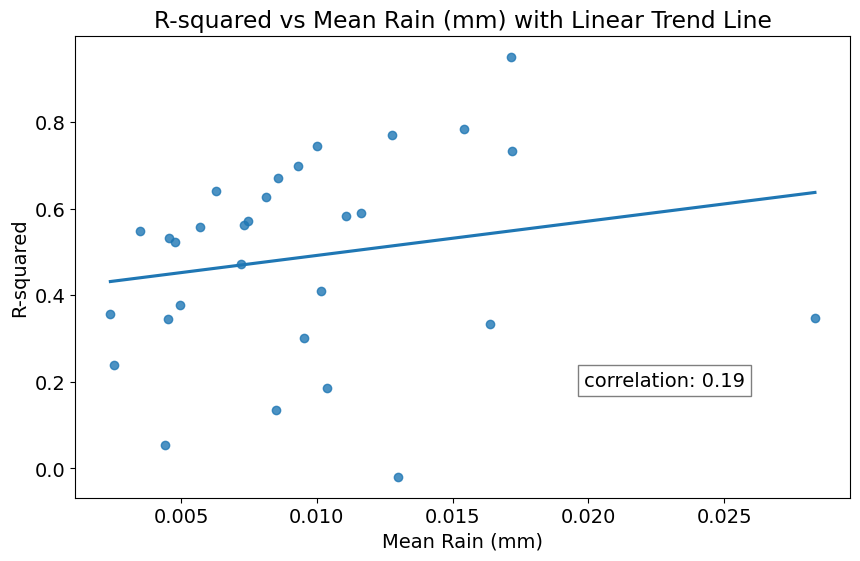

In [ ]:
# Recreating the scatter plot with a regression line and adding a text box to display the correlation value

plt.figure(figsize=(10, 6))
reg_plot = sns.regplot(data=result_dataset_test, x='Mean_Rain (mm)', y='R-squared', ci=None)  # ci=None removes the confidence interval

correlation = result_dataset_test['Mean_Rain (mm)'].corr(result_dataset_test['R-squared'])

# Adding a text box with the correlation value
plt.text(x=max(result_dataset_test['Mean_Rain (mm)']) * 0.7,  # Position the text at 70% of the max x-value
         y=max(result_dataset_test['R-squared']) * 0.2,       # Position the text at 90% of the max y-value
         s=f'correlation: {correlation:.2f}',
         bbox=dict(facecolor='white', alpha=0.5))

# Setting plot title and labels
plt.title('R-squared vs Mean Rain (mm) with Linear Trend Line')
plt.xlabel('Mean Rain (mm)')
plt.ylabel('R-squared')

# Showing the plot
plt.show()

In [ ]:
result_dataset_test

StormID       MSE  R-squared  Accumulated_Rain (mm)  Peak_Rain (mm)  \
0        163.0  0.000037   0.950654                 3.9116          1.0668   
228      277.0  0.000158   0.784202                10.9728          1.4732   
940       95.0  0.000346   0.769890                 3.8608          1.6256   
1242     214.0  0.000072   0.743961                 4.7752          0.4572   
1719     237.0  0.000076   0.733779                11.9888          0.7620   
2417     304.0  0.000103   0.697990                 5.9436          0.6096   
3056      52.0  0.000045   0.670119                 5.1308          0.5080   
3654     205.0  0.000090   0.641773                 3.0988          0.4064   
4147      14.0  0.000162   0.627124                 3.9624          0.8128   
4635     299.0  0.000138   0.589359                16.3068          1.3208   
6036     158.0  0.000138   0.581924                 7.6200          0.9144   
6724     171.0  0.000044   0.570779                 2.6924          0.3048   
7085     221.0  0.000019   0.561918                 8.0264          0.2032   
8181     261.0  0.000023   0.557406                 2.6924          0.1016   
8655      61.0  0.000016   0.548505                 4.7752          0.2540   
10021     70.0  0.000036   0.532316                 3.4544          0.2540   
10779     57.0  0.000014   0.523909                 3.7084          0.1016   
11556    325.0  0.000035   0.471239                 6.6548          0.1016   
12477     12.0  0.000044   0.410068                 1.5748          0.3556   
12632    200.0  0.000029   0.378152                 1.0160          0.1016   
12837    115.0  0.000015   0.357074                 0.8636          0.0508   
13197    326.0  0.000138   0.346399                 4.1656          0.1016   
13344    305.0  0.000021   0.345905                 5.5880          0.2032   
14577    244.0  0.000117   0.332799                 2.0320          0.3048   
14701     40.0  0.000084   0.301224                 1.0668          0.3556   
14813     65.0  0.000019   0.238284                 1.8796          0.1016   
15553     85.0  0.000097   0.184862                 7.3152          0.7620   
16258    296.0  0.000028   0.135674                 2.1844          0.0508   
16515     20.0  0.000791   0.054607                 1.5240          0.1524   
16860    273.0  0.000112  -0.019065                 1.1176          0.2540   

       Mean_Rain (mm)  Year  Season_Num  
0            0.017156  2017           2  
228          0.015411  2018           2  
940          0.012784  2015           2  
1242         0.010011  2018           4  
1719         0.017176  2018           1  
2417         0.009301  2018           3  
3056         0.008580  2014           3  
3654         0.006286  2018           4  
4147         0.008120  2014           1  
4635         0.011639  2018           3  
6036         0.011076  2017           2  
6724         0.007458  2017           3  
7085         0.007323  2018           1  
8181         0.005680  2018           2  
8655         0.003496  2014           3  
10021        0.004557  2015           1  
10779        0.004773  2014           3  
11556        0.007226  2018           4  
12477        0.010160  2014           1  
12632        0.004956  2017           4  
12837        0.002399  2017           4  
13197        0.028337  2018           4  
13344        0.004532  2018           3  
14577        0.016387  2018           1  
14701        0.009525  2014           2  
14813        0.002540  2014           4  
15553        0.010376  2015           2  
16258        0.008500  2018           3  
16515        0.004417  2014           2  
16860        0.012995  2018           2

In [ ]:
# Adding a new column to each dataset to indicate whether it's from train or test
result_dataset_train['Type'] = 'train'
result_dataset_test['Type'] = 'test'

# Merging the datasets vertically
merged_dataset = pd.concat([result_dataset_train, result_dataset_test], ignore_index=True)

In [ ]:
print(list(merged_dataset))

['StormID', 'MSE', 'R-squared', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'Year', 'Season_Num', 'Type']


In [ ]:
# Determine thresholds for 'Accumulated_Rain (mm)'
thresholds = merged_dataset['Accumulated_Rain (mm)'].quantile([0.33, 0.66]).values

# Function to categorize storms
def categorize_storm(rainfall):
    if rainfall <= thresholds[0]:
        return 'small'
    elif rainfall <= thresholds[1]:
        return 'medium'
    else:
        return 'large'

# Apply the function to categorize storms
merged_dataset['Storm_Category'] = merged_dataset['Accumulated_Rain (mm)'].apply(categorize_storm)

merged_dataset

StormID       MSE  R-squared  Accumulated_Rain (mm)  Peak_Rain (mm)  \
0      125.0  0.000021   0.960595                 1.5748          0.7112   
1      147.0  0.000038   0.941609                 8.7884          0.9652   
2      263.0  0.000028   0.934331                13.8684          1.0160   
3      153.0  0.000019   0.929078                 1.7780          0.5080   
4      139.0  0.000064   0.907586                 3.0988          0.7620   
..       ...       ...        ...                    ...             ...   
110    200.0  0.000033   0.300553                 1.0160          0.1016   
111    115.0  0.000017   0.289215                 0.8636          0.0508   
112     65.0  0.000020   0.170872                 1.8796          0.1016   
113    296.0  0.000027   0.156972                 2.1844          0.0508   
114    273.0  0.000141  -0.281971                 1.1176          0.2540   

     Mean_Rain (mm)  Year  Season_Num   Type Storm_Category  
0          0.011013  2017           1  train          small  
1          0.024756  2017           2  train          large  
2          0.019840  2018           2  train          large  
3          0.008759  2017           2  train          small  
4          0.013959  2017           2  train         medium  
..              ...   ...         ...    ...            ...  
110        0.004956  2017           4   test          small  
111        0.002399  2017           4   test          small  
112        0.002540  2014           4   test          small  
113        0.008500  2018           3   test         medium  
114        0.012995  2018           2   test          small  

[115 rows x 10 columns]

In [ ]:
merged_dataset_train = merged_dataset[merged_dataset['Type'] == 'train']
merged_dataset_test = merged_dataset[merged_dataset['Type'] == 'test']

Trainset

In [ ]:
# Calculating the mean R-squared value for each storm category
mean_r_squared_by_category = merged_dataset_train.groupby('Storm_Category')['R-squared'].mean()
print(mean_r_squared_by_category)

Storm_Category
large     0.774138
medium    0.700816
small     0.496973
Name: R-squared, dtype: float64


In [ ]:
mean_r_squared_by_category = merged_dataset_train.groupby('Year')['R-squared'].mean()
print(mean_r_squared_by_category)

Year
2014    0.645713
2015    0.674202
2017    0.741381
2018    0.545299
Name: R-squared, dtype: float64


In [ ]:
mean_r_squared_by_category = merged_dataset_train.groupby('Season_Num')['R-squared'].mean()
print(mean_r_squared_by_category)

Season_Num
1    0.650683
2    0.703797
3    0.627133
4    0.532977
Name: R-squared, dtype: float64


Testset

In [ ]:
# Calculating the mean R-squared value for each storm category
mean_r_squared_by_category = merged_dataset_test.groupby('Storm_Category')['R-squared'].mean()
print(mean_r_squared_by_category)

Storm_Category
large     0.583081
medium    0.471156
small     0.198912
Name: R-squared, dtype: float64


In [ ]:
mean_r_squared_by_category = merged_dataset_test.groupby('Year')['R-squared'].mean()
print(mean_r_squared_by_category)

Year
2014    0.473474
2015    0.501975
2017    0.389003
2018    0.447109
Name: R-squared, dtype: float64


In [ ]:
mean_r_squared_by_category = merged_dataset_test.groupby('Season_Num')['R-squared'].mean()
print(mean_r_squared_by_category)

Season_Num
1    0.523980
2    0.331784
3    0.517313
4    0.413577
Name: R-squared, dtype: float64


#Temporal Range

In [ ]:
train_df

Datetime  Temp_Air  Temp_Moist  Soil_MC_10  Soil_MC_35  \
0        4/8/2014 0:05     9.810      5.1986    0.399205    0.438332   
1        4/8/2014 0:10     9.890      5.1946    0.396507    0.436982   
2        4/8/2014 0:15     9.910      5.1974    0.396507    0.438332   
3        4/8/2014 0:20     9.960      5.1998    0.395157    0.438332   
4        4/8/2014 0:25     9.980      5.2094    0.395157    0.436982   
...                ...       ...         ...         ...         ...   
58072  12/24/2018 0:15     3.552      5.0842    0.387000    0.427000   
58073  12/24/2018 0:20     3.483      5.0842    0.387000    0.427000   
58074  12/24/2018 0:25     3.463      5.0840    0.386000    0.427000   
58075  12/24/2018 0:30     3.395      5.0814    0.386000    0.427000   
58076  12/24/2018 0:35     3.321      5.0800    0.387000    0.428000   

       Soil_MC_65  Soil_MC_91  Inflow (mm/s)  Overflow(mm/s)  \
0        0.368174    0.388411            0.0             0.0   
1        0.369523    0.388411            0.0             0.0   
2        0.368174    0.388411            0.0             0.0   
3        0.368174    0.388411            0.0             0.0   
4        0.369523    0.388411            0.0             0.0   
...           ...         ...            ...             ...   
58072    0.452000    0.418000            0.0             0.0   
58073    0.452000    0.418000            0.0             0.0   
58074    0.452000    0.417000            0.0             0.0   
58075    0.452000    0.417000            0.0             0.0   
58076    0.452000    0.417000            0.0             0.0   

       Precipitation (mm)  ...  Mean_RR (mm/s)  Max_RR (mm/s)  Year  Month  \
0                     0.0  ...       -0.000508        0.00000  2014      4   
1                     0.0  ...       -0.000508        0.00000  2014      4   
2                     0.0  ...       -0.000508        0.00000  2014      4   
3                     0.0  ...       -0.000508        0.00000  2014      4   
4                     0.0  ...       -0.000508        0.00000  2014      4   
...                   ...  ...             ...            ...   ...    ...   
58072                 0.0  ...        0.000004        0.04064  2018     12   
58073                 0.0  ...        0.000004        0.04064  2018     12   
58074                 0.0  ...        0.000004        0.04064  2018     12   
58075                 0.0  ...        0.000004        0.04064  2018     12   
58076                 0.0  ...        0.000004        0.04064  2018     12   

       Day  Season_Num  rain_indicator  hourly_rain  30min_rain  15min_rain  
0        8           1               0          0.0         0.0         0.0  
1        8           1               0          0.0         0.0         0.0  
2        8           1               0          0.0         0.0         0.0  
3        8           1               0          0.0         0.0         0.0  
4        8           1               0          0.0         0.0         0.0  
...    ...         ...             ...          ...         ...         ...  
58072   24           4               0          0.0         0.0         0.0  
58073   24           4               0          0.0         0.0         0.0  
58074   24           4               0          0.0         0.0         0.0  
58075   24           4               0          0.0         0.0         0.0  
58076   24           4               0          0.0         0.0         0.0  

[42065 rows x 34 columns]

In [ ]:
# Make predictions on the train data
y_pred_train = model.predict(X_train_scaled)
# Evaluate the model
mse = mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3.455016901393744e-05
R-squared: 0.7953416239310912


In [ ]:
train_df['y_pred_train'] = y_pred_train

<ipython-input-21-7324e8a8d739>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['y_pred_train'] = y_pred_train


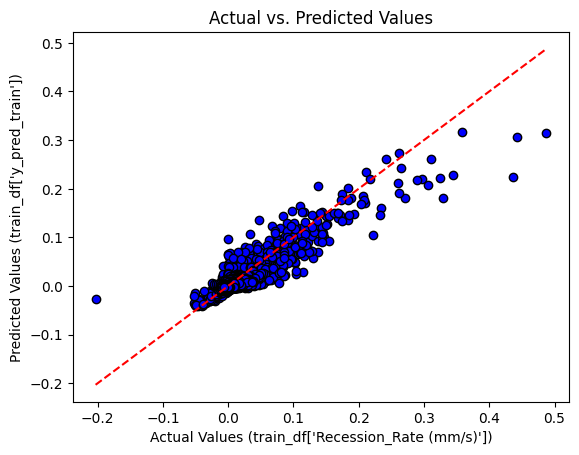

In [ ]:
# Create a scatter plot
plt.scatter(train_df['Recession_Rate (mm/s)'], train_df['y_pred_train'], c='blue', edgecolors='k')
plt.xlabel("Actual Values (train_df['Recession_Rate (mm/s)'])")
plt.ylabel("Predicted Values (train_df['y_pred_train'])")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line to represent a perfect prediction
plt.plot([min(train_df['Recession_Rate (mm/s)']), max(train_df['Recession_Rate (mm/s)'])], [min(train_df['Recession_Rate (mm/s)']), max(train_df['Recession_Rate (mm/s)'])], 'r--')

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Calculate Mean Squared Error
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared Score
r2 = r2_score(y_train, y_pred_train)
print("R-squared (R2) Score:", r2)

# Calculate Explained Variance Score
evs = explained_variance_score(y_train, y_pred_train)
print("Explained Variance Score (EVS):", evs)

Mean Squared Error (MSE): 3.455016901393744e-05
Root Mean Squared Error (RMSE): 0.00587793918086411
Mean Absolute Error (MAE): 0.0032446619778705474
R-squared (R2) Score: 0.7953416239310912
Explained Variance Score (EVS): 0.7953416671915107


In [ ]:
# Group by 'StormID', then resample and sum
train_df_15mins = train_df.groupby('StormID').resample('15T').sum()
train_df_30mins = train_df.groupby('StormID').resample('30T').sum()
train_df_1hr = train_df.groupby('StormID').resample('1H').sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Int64Index'

In [ ]:
train_df_15mins

Temp_Air  Temp_Moist  Soil_MC_10  Soil_MC_35  \
StormID Datetime                                                            
2       2014-04-15 07:00:00    35.800     18.1686    0.664840    0.710712   
        2014-04-15 07:15:00    53.860     27.2546    0.999284    1.064045   
        2014-04-15 07:30:00    54.040     27.2640    0.999284    1.065394   
        2014-04-15 07:45:00    53.680     27.2648    0.999284    1.066743   
        2014-04-15 08:00:00    53.800     27.2806    1.000633    1.066743   
...                               ...         ...         ...         ...   
322     2018-12-23 23:30:00     9.907     15.3042    1.161000    1.281000   
        2018-12-23 23:45:00    10.188     15.2880    1.161000    1.281000   
        2018-12-24 00:00:00    11.039     15.2720    1.160000    1.281000   
        2018-12-24 00:15:00    10.498     15.2524    1.160000    1.281000   
        2018-12-24 00:30:00     6.716     10.1614    0.773000    0.855000   

                             Soil_MC_65  Soil_MC_91  Inflow (mm/s)  \
StormID Datetime                                                     
2       2014-04-15 07:00:00    0.623015    0.733649            0.0   
        2014-04-15 07:15:00    0.934522    1.100473            0.0   
        2014-04-15 07:30:00    0.931824    1.097775            0.0   
        2014-04-15 07:45:00    0.933173    1.097775            0.0   
        2014-04-15 08:00:00    0.937221    1.096425            0.0   
...                                 ...         ...            ...   
322     2018-12-23 23:30:00    1.356000    1.253000            0.0   
        2018-12-23 23:45:00    1.356000    1.252000            0.0   
        2018-12-24 00:00:00    1.356000    1.254000            0.0   
        2018-12-24 00:15:00    1.356000    1.253000            0.0   
        2018-12-24 00:30:00    0.904000    0.834000            0.0   

                             Overflow(mm/s)  Precipitation (mm)  \
StormID Datetime                                                  
2       2014-04-15 07:00:00             0.0                 0.0   
        2014-04-15 07:15:00             0.0                 0.0   
        2014-04-15 07:30:00             0.0                 0.0   
        2014-04-15 07:45:00             0.0                 0.0   
        2014-04-15 08:00:00             0.0                 0.0   
...                                     ...                 ...   
322     2018-12-23 23:30:00             0.0                 0.0   
        2018-12-23 23:45:00             0.0                 0.0   
        2018-12-24 00:00:00             0.0                 0.0   
        2018-12-24 00:15:00             0.0                 0.0   
        2018-12-24 00:30:00             0.0                 0.0   

                             Water_Depth (mm)  ...  Max_RR (mm/s)  Year  \
StormID Datetime                               ...                        
2       2014-04-15 07:00:00          249.9360  ...       0.885952  4028   
        2014-04-15 07:15:00          374.9040  ...       1.328928  6042   
        2014-04-15 07:30:00          374.9040  ...       1.328928  6042   
        2014-04-15 07:45:00          374.9040  ...       1.328928  6042   
        2014-04-15 08:00:00          374.9040  ...       1.328928  6042   
...                                       ...  ...            ...   ...   
322     2018-12-23 23:30:00          403.8600  ...       0.121920  6054   
        2018-12-23 23:45:00          395.3256  ...       0.121920  6054   
        2018-12-24 00:00:00          391.0584  ...       0.121920  6054   
        2018-12-24 00:15:00          384.0480  ...       0.121920  6054   
        2018-12-24 00:30:00          253.8984  ...       0.081280  4036   

                             Month  Day  Season_Num  rain_indicator  \
StormID Datetime                                                      
2       2014-04-15 07:00:00      8   30           2               0   
        2014-04-15 07:15:00     12   45           3    

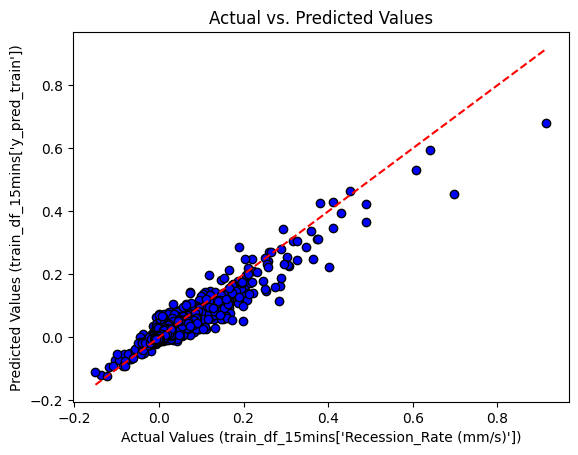

In [ ]:
# Create a scatter plot
plt.scatter(train_df_15mins['Recession_Rate (mm/s)'], train_df_15mins['y_pred_train'], c='blue', edgecolors='k')
plt.xlabel("Actual Values (train_df_15mins['Recession_Rate (mm/s)'])")
plt.ylabel("Predicted Values (train_df_15mins['y_pred_train'])")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line to represent a perfect prediction
plt.plot([min(train_df_15mins['Recession_Rate (mm/s)']), max(train_df_15mins['Recession_Rate (mm/s)'])], [min(train_df_15mins['Recession_Rate (mm/s)']), max(train_df_15mins['Recession_Rate (mm/s)'])], 'r--')

plt.show()

In [ ]:
print(list(train_df_15mins))

['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow (mm/s)', 'Overflow(mm/s)', 'Precipitation (mm)', 'Water_Depth (mm)', 'Recession_Rate (mm/s)', 'SA (mm2)', 'Storm1', 'Storm2', 'StormID', 'Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'Peak_Inflow (mm/s)', 'Min_Inflow (mm/s)', 'Mean_Inflow (mm/s)', 'Min_RR (mm/s)', 'Mean_RR (mm/s)', 'Max_RR (mm/s)', 'Year', 'Month', 'Day', 'Season_Num', 'rain_indicator', 'hourly_rain', '30min_rain', '15min_rain', 'y_pred_train']


In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(train_df_15mins['Recession_Rate (mm/s)'], train_df_15mins['y_pred_train'])
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(train_df_15mins['Recession_Rate (mm/s)'], train_df_15mins['y_pred_train'])
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared Score
r2 = r2_score(train_df_15mins['Recession_Rate (mm/s)'], train_df_15mins['y_pred_train'])
print("R-squared (R2) Score:", r2)

# Calculate Explained Variance Score
evs = explained_variance_score(train_df_15mins['Recession_Rate (mm/s)'], train_df_15mins['y_pred_train'])
print("Explained Variance Score (EVS):", evs)

Mean Squared Error (MSE): 0.0001254399848685063
Root Mean Squared Error (RMSE): 0.011199999324486868
Mean Absolute Error (MAE): 0.005553733089065994
R-squared (R2) Score: 0.8879004850105975
Explained Variance Score (EVS): 0.8879005712813886


In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(train_df_30mins['Recession_Rate (mm/s)'], train_df_30mins['y_pred_train'])
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(train_df_30mins['Recession_Rate (mm/s)'], train_df_30mins['y_pred_train'])
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared Score
r2 = r2_score(train_df_30mins['Recession_Rate (mm/s)'], train_df_30mins['y_pred_train'])
print("R-squared (R2) Score:", r2)

# Calculate Explained Variance Score
evs = explained_variance_score(train_df_30mins['Recession_Rate (mm/s)'], train_df_30mins['y_pred_train'])
print("Explained Variance Score (EVS):", evs)

Mean Squared Error (MSE): 0.0002967376238299554
Root Mean Squared Error (RMSE): 0.01722607395287607
Mean Absolute Error (MAE): 0.00703032176172031
R-squared (R2) Score: 0.9012549728659561
Explained Variance Score (EVS): 0.9012550450809699


In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(train_df_1hr['Recession_Rate (mm/s)'], train_df_1hr['y_pred_train'])
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(train_df_1hr['Recession_Rate (mm/s)'], train_df_1hr['y_pred_train'])
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared Score
r2 = r2_score(train_df_1hr['Recession_Rate (mm/s)'], train_df_1hr['y_pred_train'])
print("R-squared (R2) Score:", r2)

# Calculate Explained Variance Score
evs = explained_variance_score(train_df_1hr['Recession_Rate (mm/s)'], train_df_1hr['y_pred_train'])
print("Explained Variance Score (EVS):", evs)

Mean Squared Error (MSE): 0.0007423040050424713
Root Mean Squared Error (RMSE): 0.027245256560408295
Mean Absolute Error (MAE): 0.0114651493271888
R-squared (R2) Score: 0.9128484418723348
Explained Variance Score (EVS): 0.9128485407917195


Test Score

In [ ]:
# Make predictions on the test data
y_pred_test = model.predict(X_test_scaled)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 5.5884745255876334e-05
R-squared: 0.6115942499573841


In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred_test)
print("R-squared (R2) Score:", r2)

# Calculate Explained Variance Score
evs = explained_variance_score(y_test, y_pred_test)
print("Explained Variance Score (EVS):", evs)

Mean Squared Error (MSE): 5.5884745255876334e-05
Root Mean Squared Error (RMSE): 0.007475610025668563
Mean Absolute Error (MAE): 0.0033791325517096775
R-squared (R2) Score: 0.6115942499573841
Explained Variance Score (EVS): 0.6115994736203476


In [ ]:
test_df['y_pred_test'] = y_pred_test

<ipython-input-82-ea87f587c1f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['y_pred_test'] = y_pred_test


In [ ]:
# Group by 'StormID', then resample and sum
test_df_15mins = test_df.groupby('StormID').resample('15T').sum()
test_df_30mins = test_df.groupby('StormID').resample('30T').sum()
test_df_1hr = test_df.groupby('StormID').resample('1H').sum()

In [ ]:
test_df_15mins

Temp_Air  Temp_Moist  Soil_MC_10  Soil_MC_35  \
StormID Datetime                                                            
12      2014-05-23 16:30:00    21.390     16.4940    0.295317    0.299365   
        2014-05-23 16:45:00    65.940     49.4900    0.885951    0.899443   
        2014-05-23 17:00:00    68.760     49.5060    0.885951    0.899443   
        2014-05-23 17:15:00    65.960     49.5300    0.884602    0.898094   
        2014-05-23 17:30:00    63.390     49.5540    0.884602    0.900792   
...                               ...         ...         ...         ...   
325     2018-12-31 04:00:00    -0.601     13.1198    0.490000    1.320000   
        2018-12-31 04:15:00    -1.428     13.1346    0.583000    1.320000   
        2018-12-31 04:30:00    -2.078     13.1360    0.794000    1.320000   
        2018-12-31 04:45:00    -2.768     13.1202    0.141000    1.319000   
        2018-12-31 05:00:00    -1.894      8.7562    0.175000    0.878000   

                             Soil_MC_65  Soil_MC_91  Inflow (mm/s)  \
StormID Datetime                                                     
12      2014-05-23 16:30:00    0.307460    0.365475            0.0   
        2014-05-23 16:45:00    0.925078    1.096425            0.0   
        2014-05-23 17:00:00    0.926427    1.097775            0.0   
        2014-05-23 17:15:00    0.923729    1.096425            0.0   
        2014-05-23 17:30:00    0.925078    1.097775            0.0   
...                                 ...         ...            ...   
325     2018-12-31 04:00:00    1.367000    1.243000            0.0   
        2018-12-31 04:15:00    1.367000    1.243000            0.0   
        2018-12-31 04:30:00    1.367000    1.242000            0.0   
        2018-12-31 04:45:00    1.366000    1.242000            0.0   
        2018-12-31 05:00:00    0.911000    0.828000            0.0   

                             Overflow(mm/s)  Precipitation (mm)  \
StormID Datetime                                                  
12      2014-05-23 16:30:00             0.0                 0.0   
        2014-05-23 16:45:00             0.0                 0.0   
        2014-05-23 17:00:00             0.0                 0.0   
        2014-05-23 17:15:00             0.0                 0.0   
        2014-05-23 17:30:00             0.0                 0.0   
...                                     ...                 ...   
325     2018-12-31 04:00:00             0.0                 0.0   
        2018-12-31 04:15:00             0.0                 0.0   
        2018-12-31 04:30:00             0.0                 0.0   
        2018-12-31 04:45:00             0.0                 0.0   
        2018-12-31 05:00:00             0.0                 0.0   

                             Water_Depth (mm)  ...  Max_RR (mm/s)  Year  \
StormID Datetime                               ...                        
12      2014-05-23 16:30:00          124.9680  ...       0.054864  2014   
        2014-05-23 16:45:00          374.9040  ...       0.164592  6042   
        2014-05-23 17:00:00          374.9040  ...       0.164592  6042   
        2014-05-23 17:15:00          374.9040  ...       0.164592  6042   
        2014-05-23 17:30:00          374.9040  ...       0.164592  6042   
...                                       ...  ...            ...   ...   
325     2018-12-31 04:00:00          407.5176  ...       0.182880  6054   
        2018-12-31 04:15:00          402.3360  ...       0.182880  6054   
        2018-12-31 04:30:00          395.9352  ...       0.182880  6054   
        2018-12-31 04:45:00          388.0104  ...       0.182880  6054   
        2018-12-31 05:00:00          254.5080  ...       0.121920  4036   

                             Month  Day  Season_Num  rain_indicator  \
StormID Datetime                                                      
12      2014-05-23 16:30:00      5   23           1               0   
        2014-05-23 16:45:00     15   69           3    

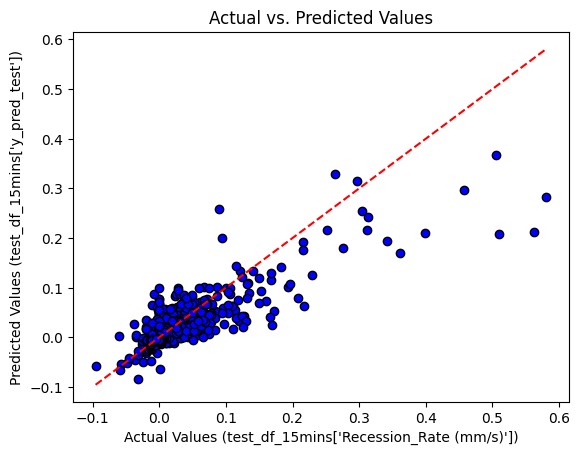

In [ ]:
# Create a scatter plot
plt.scatter(test_df_15mins['Recession_Rate (mm/s)'], test_df_15mins['y_pred_test'], c='blue', edgecolors='k')
plt.xlabel("Actual Values (test_df_15mins['Recession_Rate (mm/s)'])")
plt.ylabel("Predicted Values (test_df_15mins['y_pred_test'])")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line to represent a perfect prediction
plt.plot([min(test_df_15mins['Recession_Rate (mm/s)']), max(test_df_15mins['Recession_Rate (mm/s)'])], [min(test_df_15mins['Recession_Rate (mm/s)']), max(test_df_15mins['Recession_Rate (mm/s)'])], 'r--')

plt.show()

In [ ]:
print(list(test_df_15mins))

['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow (mm/s)', 'Overflow(mm/s)', 'Precipitation (mm)', 'Water_Depth (mm)', 'Recession_Rate (mm/s)', 'SA (mm2)', 'Storm1', 'Storm2', 'StormID', 'Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'Peak_Inflow (mm/s)', 'Min_Inflow (mm/s)', 'Mean_Inflow (mm/s)', 'Min_RR (mm/s)', 'Mean_RR (mm/s)', 'Max_RR (mm/s)', 'Year', 'Month', 'Day', 'Season_Num', 'rain_indicator', 'hourly_rain', '30min_rain', '15min_rain', 'y_pred_test']


In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(test_df_15mins['Recession_Rate (mm/s)'], test_df_15mins['y_pred_test'])
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(test_df_15mins['Recession_Rate (mm/s)'], test_df_15mins['y_pred_test'])
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared Score
r2 = r2_score(test_df_15mins['Recession_Rate (mm/s)'], test_df_15mins['y_pred_test'])
print("R-squared (R2) Score:", r2)

# Calculate Explained Variance Score
evs = explained_variance_score(test_df_15mins['Recession_Rate (mm/s)'], test_df_15mins['y_pred_test'])
print("Explained Variance Score (EVS):", evs)

Mean Squared Error (MSE): 0.0002577009716200089
Root Mean Squared Error (RMSE): 0.016053067358608102
Mean Absolute Error (MAE): 0.0067188533175421014
R-squared (R2) Score: 0.7146275783631919
Explained Variance Score (EVS): 0.7146349695000798


In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(test_df_30mins['Recession_Rate (mm/s)'], test_df_30mins['y_pred_test'])
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(test_df_30mins['Recession_Rate (mm/s)'], test_df_30mins['y_pred_test'])
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared Score
r2 = r2_score(test_df_30mins['Recession_Rate (mm/s)'], test_df_30mins['y_pred_test'])
print("R-squared (R2) Score:", r2)

# Calculate Explained Variance Score
evs = explained_variance_score(test_df_30mins['Recession_Rate (mm/s)'], test_df_30mins['y_pred_test'])
print("Explained Variance Score (EVS):", evs)

Mean Squared Error (MSE): 0.0007080910248096911
Root Mean Squared Error (RMSE): 0.026609979797243197
Mean Absolute Error (MAE): 0.010144665156752641
R-squared (R2) Score: 0.756020372694582
Explained Variance Score (EVS): 0.7560294833603853


In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(test_df_1hr['Recession_Rate (mm/s)'], test_df_1hr['y_pred_test'])
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(test_df_1hr['Recession_Rate (mm/s)'], test_df_1hr['y_pred_test'])
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared Score
r2 = r2_score(test_df_1hr['Recession_Rate (mm/s)'], test_df_1hr['y_pred_test'])
print("R-squared (R2) Score:", r2)

# Calculate Explained Variance Score
evs = explained_variance_score(test_df_1hr['Recession_Rate (mm/s)'], test_df_1hr['y_pred_test'])
print("Explained Variance Score (EVS):", evs)

Mean Squared Error (MSE): 0.0018526832024212546
Root Mean Squared Error (RMSE): 0.043042806628068
Mean Absolute Error (MAE): 0.0171429865966911
R-squared (R2) Score: 0.7891346566868517
Explained Variance Score (EVS): 0.7891464457194693


#Model performance for year, season and storm size

In [ ]:
# Convert the predictions to a pandas Series and add them to the train_df
train_df['Predicted_Recession_Rate'] = pd.Series(y_pred_train.flatten(), index=train_df.index)

# Convert the predictions to a pandas Series and add them to the test_df
test_df['Predicted_Recession_Rate'] = pd.Series(y_pred_test.flatten(), index=test_df.index)

NameError: name 'y_pred_train' is not defined

In [ ]:
# Define the quantiles for storm size categories
quantiles = df['Accumulated_Rain (mm)'].quantile([0.33, 0.66])

# Function to categorize storm size
def categorize_storm_size(row):
    if row['Accumulated_Rain (mm)'] <= quantiles.iloc[0]:
        return 'Small'
    elif row['Accumulated_Rain (mm)'] <= quantiles.iloc[1]:
        return 'Medium'
    else:
        return 'Large'

# Apply the function to create a new column 'Storm_Size'
df['Storm_Size'] = df.apply(categorize_storm_size, axis=1)

In [ ]:
# Group by 'Storm_Size' and count unique 'StormID's in each group
storm_count_by_size = df.groupby('Storm_Size')['StormID'].nunique()

# Display the counts
print(storm_count_by_size)

Storm_Size
Large      22
Medium     35
Small     100
Name: StormID, dtype: int64


In [ ]:
# Group by 'Storm_Size' and calculate min and max of 'Accumulated_Rain (mm)' for each group
storm_size_ranges = df.groupby('Storm_Size')['Accumulated_Rain (mm)'].agg(['min', 'max'])

# Display the value ranges for each storm size
print(storm_size_ranges)

               min      max
Storm_Size                 
Large       6.8072  25.7048
Medium      3.2512   6.6548
Small       0.0000   3.2004


In [ ]:
# Define the quantiles for storm size categories
quantiles = test_df['Accumulated_Rain (mm)'].quantile([0.33, 0.66])

# Function to categorize storm size
def categorize_storm_size(row):
    if row['Accumulated_Rain (mm)'] <= quantiles.iloc[0]:
        return 'Small'
    elif row['Accumulated_Rain (mm)'] <= quantiles.iloc[1]:
        return 'Medium'
    else:
        return 'Large'

# Apply the function to create a new column 'Storm_Size'
test_df['Storm_Size'] = test_df.apply(categorize_storm_size, axis=1)

<ipython-input-29-0d8e3e2228ff>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Storm_Size'] = test_df.apply(categorize_storm_size, axis=1)


In [ ]:
# Group by 'Storm_Size' and count unique 'StormID's in each group
storm_count_by_size = test_df.groupby('Storm_Size')['StormID'].nunique()

# Display the counts
print(storm_count_by_size)

Storm_Size
Large      6
Medium     9
Small     16
Name: StormID, dtype: int64


In [ ]:
# Group by 'Storm_Size' and calculate min and max of 'Accumulated_Rain (mm)' for each group
storm_size_ranges = test_df.groupby('Storm_Size')['Accumulated_Rain (mm)'].agg(['min', 'max'])

# Display the value ranges for each storm size
print(storm_size_ranges)

               min      max
Storm_Size                 
Large       7.3152  16.3068
Medium      3.9116   6.6548
Small       0.8636   3.8608


In [ ]:
# Function to calculate R2 score for grouped data
def calculate_r2_for_grouped_data(df, group_column):
    unique_groups = df[group_column].unique()
    r2_scores = {}

    for group in unique_groups:
        # Filter data for the specific group
        group_df = df[df[group_column] == group]
        # Calculate R2 score for the group
        r2_score_group = r2_score(group_df['Recession_Rate (mm/s)'], group_df['Predicted_Recession_Rate'])
        r2_scores[group] = r2_score_group

    return r2_scores

# Calculate R2 score for each year in train and test data
r2_scores_train_year = calculate_r2_for_grouped_data(train_df, 'Year')
r2_scores_test_year = calculate_r2_for_grouped_data(test_df, 'Year')

# Calculate R2 score for each Season_Num in train and test data
r2_scores_train_Season_Num = calculate_r2_for_grouped_data(train_df, 'Season_Num')
r2_scores_test_Season_Num = calculate_r2_for_grouped_data(test_df, 'Season_Num')

# Print the results
print("R2 Scores by Year in Train Data:", r2_scores_train_year)
print("R2 Scores by Year in Test Data:", r2_scores_test_year)
print("R2 Scores by Season_Num in Train Data:", r2_scores_train_Season_Num)
print("R2 Scores by Season_Num in Test Data:", r2_scores_test_Season_Num)

R2 Scores by Year in Train Data: {2014: 0.8144375217873084, 2015: 0.8225793630210543, 2017: 0.8113846077340005, 2018: 0.7657038964048928}
R2 Scores by Year in Test Data: {2014: 0.36642019840329465, 2015: 0.6642237843999345, 2017: 0.7112916229468134, 2018: 0.6602473291589896}
R2 Scores by Season_Num in Train Data: {1: 0.8375984063291603, 2: 0.8279254167356372, 3: 0.6173174982672857, 4: 0.7170533296648436}
R2 Scores by Season_Num in Test Data: {1: 0.61907061380772, 2: 0.6144471533658493, 3: 0.6031627344996823, 4: 0.6058882419999636}


In [ ]:
# Function to calculate R2 score for each storm size category
def calculate_r2_for_storm_size(df):
    storm_sizes = df['Storm_Size'].unique()
    r2_scores = {}

    for size in storm_sizes:
        # Filter data for the specific storm size category
        size_df = df[df['Storm_Size'] == size]
        # Calculate R2 score for the category
        r2_score_size = r2_score(size_df['Recession_Rate (mm/s)'], size_df['Predicted_Recession_Rate'])
        r2_scores[size] = r2_score_size

    return r2_scores

# Calculate R2 score for each storm size category in train and test data
r2_scores_train_storm_size = calculate_r2_for_storm_size(train_df)
r2_scores_test_storm_size = calculate_r2_for_storm_size(test_df)

# Print the results
print("R2 Scores by Storm Size in Train Data:", r2_scores_train_storm_size)
print("R2 Scores by Storm Size in Test Data:", r2_scores_test_storm_size)

KeyError: 'Storm_Size'

In [ ]:
# Define the data for the dataframe
data_year = {
    'Year': [2014, 2015, 2017, 2018, 2014, 2015, 2017, 2018],
    'LR': [0.32, 0.63, 0.68, 0.55, 0.50, 0.42, 0.61, 0.47],
    'RF': [0.36, 0.66, 0.70, 0.66, 0.81, 0.82, 0.811, 0.76],
    'DDLSTM': [0.42, 0.44, 0.61, 0.53, 0.57, 0.65, 0.78, 0.61],  # Replace None with actual DDLSTM data
    'PILSTM': [0.38, 0.42, 0.66, 0.54, 0.59, 0.68, 0.82, 0.63],  # Replace None with actual PILSTM data
    'Sample': ['Test', 'Test', 'Test', 'Test', 'Train', 'Train', 'Train', 'Train']
}

# Create the dataframe
df_year = pd.DataFrame(data_year)

# Data from the image provided by the user
data_season = {
    'Season': [1, 2, 3, 4, 1, 2, 3, 4],
    'LR': [0.55, 0.56, 0.51, 0.48, 0.61, 0.50, 0.29, 0.44],
    'RF': [0.62, 0.61, 0.60, 0.60, 0.83, 0.82, 0.61, 0.72],
    'DDLSTM': [0.69, 0.67, 0.62, 0.63, 0.74, 0.76, 0.64, 0.80],  # Placeholder for missing DDLSTM data
    'PILSTM': [0.70, 0.71, 0.60, 0.64, 0.75, 0.78, 0.61, 0.79],  # Placeholder for missing PILSTM data
    'Sample': ['Test', 'Test', 'Test', 'Test', 'Train', 'Train', 'Train', 'Train']
}

# Create the DataFrame
df_season = pd.DataFrame(data_season)

# Data from the image provided by the user
data_storm_size = {
    'Storm Size': ['Large', 'Medium', 'Small', 'Large', 'Medium', 'Small'],
    'LR': [0.30, 0.32, 0.31, 0.36, 0.40, 0.43],
    'RF': [0.65, 0.68, 0.48, 0.80, 0.82, 0.74],
    'DDLSTM': [0.71, 0.78, 0.46, 0.81, 0.83, 0.82],  # Placeholder for missing DDLSTM data
    'PILSTM': [0.73, 0.80, 0.49, 0.81, 0.85, 0.87],  # Placeholder for missing PILSTM data
    'Sample': ['Test', 'Test', 'Test', 'Train', 'Train', 'Train']
}

# Create the DataFrame
df_storm_size = pd.DataFrame(data_storm_size)


# Define the complete data for the dataframe as provided by the user for the temporal resolution dataset
data_temporal_resolution = {
    'Temporal Resolution': [5, 15, 30, 60]*2,  # Two sets for Train and Test
    'LR': [0.51, 0.66, 0.73, 0.76, 0.44, 0.58, 0.82, -0.14],  # Train followed by Test
    'RF': [0.79, 0.87, 0.9, 0.91, 0.73, 0.72, 0.83, 0.23],  # Train followed by Test
    'DDLSTM': [0.87, 0.85, 0.87, 0.87, 0.82, 0.8, 0.93, 0.1],  # Train followed by Test
    'PILSTM': [0.9, 0.91, 0.91, 0.89, 0.86, 0.85, 0.95, 0.14],  # Train followed by Test
    'Sample': ['Train']*4 + ['Test']*4  # Identifying the sample type
}

# Create the dataframe with the temporal resolution data
df_temporal_resolution = pd.DataFrame(data_temporal_resolution)

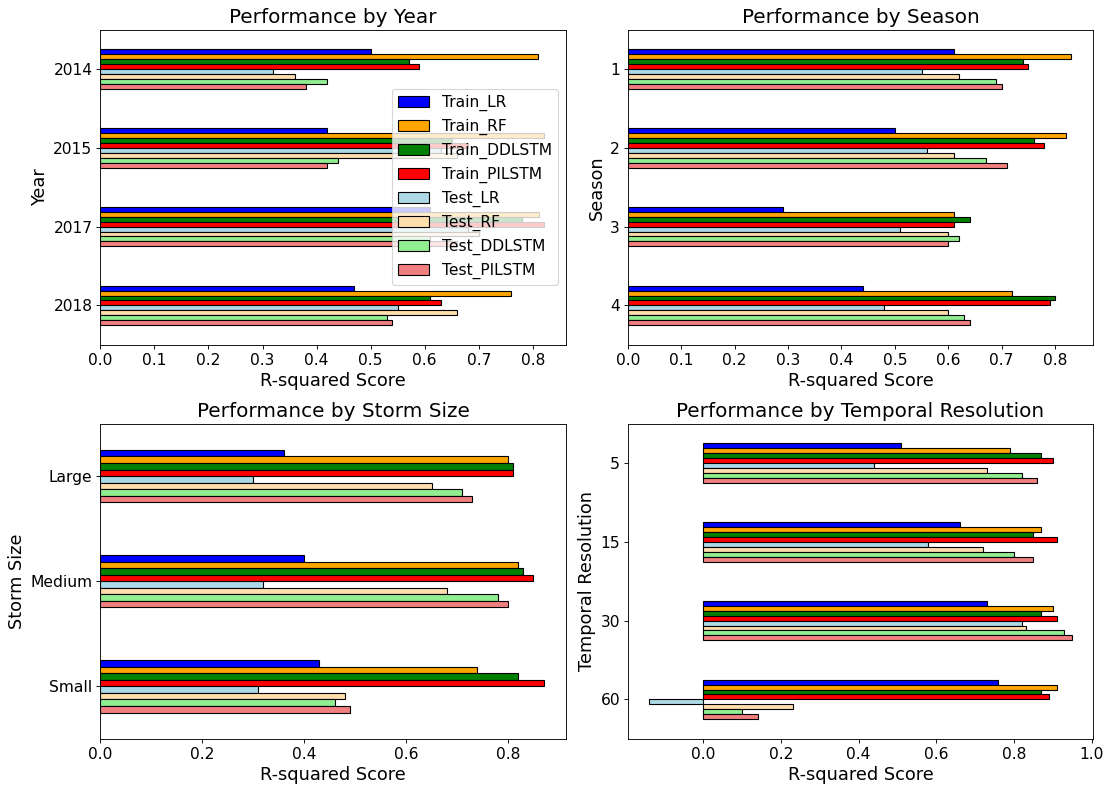

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_year, df_season, df_storm_size, df_temporal_resolution are defined
# ...

# Adjusting the plot to make Train and Test more distinct by using color shades
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), dpi=80)

# Titles for the subplots
titles = ['Performance by Year', 'Performance by Season', 'Performance by Storm Size', 'Performance by Temporal Resolution']

# DataFrames list
dataframes = [df_year, df_season, df_storm_size, df_temporal_resolution]

# Colors for the different models (darker for Train, lighter for Test)
colors_train = ['blue', 'orange', 'green', 'red']
colors_test = ['lightblue', 'navajowhite', 'lightgreen', 'lightcoral']

# Iterate over each subplot and dataframe
for i, (ax, title, df) in enumerate(zip(axes.flatten(), titles, dataframes)):
    # Split the dataframe into Test and Train
    df_test = df[df['Sample'] == 'Test'].drop(columns='Sample').set_index(df.columns[0])
    df_train = df[df['Sample'] == 'Train'].drop(columns='Sample').set_index(df.columns[0])

    # Concatenate Test and Train dataframes for side-by-side bars
    df_combined = pd.concat([df_train, df_test], axis=1, keys=['Train', 'Test'])
    df_combined.columns = df_combined.columns.map('_'.join)

    # Plotting
    df_combined.plot(kind='barh', ax=ax, color=colors_train + colors_test, edgecolor='black')

    # Set titles, labels, and tick parameters with increased font sizes
    ax.set_title(title, fontsize=18)
    ax.set_xlabel('R-squared Score', fontsize=16)
    ax.set_ylabel(df.columns[0], fontsize=16)  # Assuming the first column is the one to use for y-axis labels
    ax.tick_params(axis='both', which='major', labelsize=14)

    # Invert y-axis to have the top bar represent the first row in the dataframe
    ax.invert_yaxis()

    # Set legend: Only for the first subplot, remove legend for others
    if i == 0:
        ax.legend(fontsize=14)
    else:
        ax.legend().remove()

# Adjust layout to prevent overlap
fig.tight_layout()

# Display the plot
plt.show()

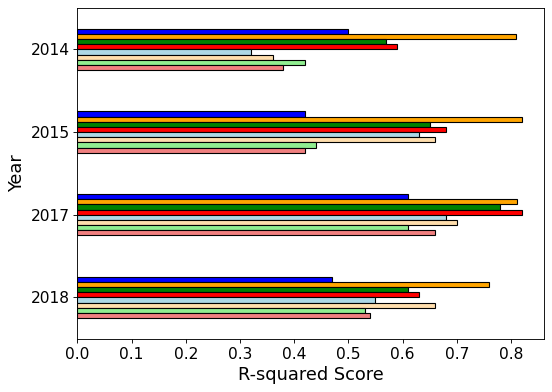

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_year is defined and structured with the first column as 'storm_size', followed by numeric columns 'LR', 'RF', 'DDLSTM', 'PILSTM', and 'Sample' as the last column

# Adjusting the plot to make Train and Test more distinct by using color shades
fig, ax = plt.subplots(figsize=(7, 5), dpi=80)  # Adjust the size as needed

# Title for the subplot
# title = 'Performance by storm_size'

# Colors for the different models (darker for Train, lighter for Test)
colors_train = ['blue', 'orange', 'green', 'red']
colors_test = ['lightblue', 'navajowhite', 'lightgreen', 'lightcoral']

# Split the dataframe into Test and Train
df_test = df_year[df_year['Sample'] == 'Test'].drop(columns='Sample').set_index('Year')
df_train = df_year[df_year['Sample'] == 'Train'].drop(columns='Sample').set_index('Year')

# Concatenate Test and Train dataframes for side-by-side bars
df_combined = pd.concat([df_train, df_test], axis=1, keys=['Train', 'Test'])
df_combined.columns = df_combined.columns.map('_'.join)

# Plotting
df_combined.plot(kind='barh', ax=ax, color=colors_train + colors_test, edgecolor='black')

# Set title, labels, and tick parameters with increased font sizes
# ax.set_title(title, fontsize=18)
ax.set_xlabel('R-squared Score', fontsize=16)
ax.set_ylabel('Year', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)

# Invert y-axis to have the top bar represent the first row in the dataframe
ax.invert_yaxis()

# Remove the legend
ax.get_legend().remove()

# Adjust layout to prevent overlap
fig.tight_layout()

# Display the plot
plt.show()

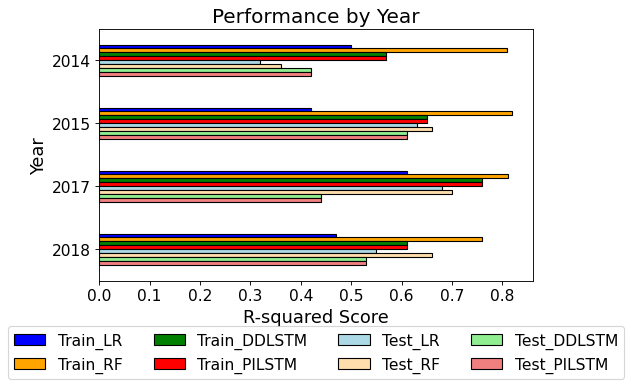

In [ ]:
# Adjusting the plot to make Train and Test more distinct by using color shades
fig, ax = plt.subplots(figsize=(7, 5), dpi=80)  # Adjust the size as needed

# Title for the subplot
title = 'Performance by Year'

# Colors for the different models (darker for Train, lighter for Test)
colors_train = ['blue', 'orange', 'green', 'red']
colors_test = ['lightblue', 'navajowhite', 'lightgreen', 'lightcoral']

# Split the dataframe into Test and Train
df_test = df_year[df_year['Sample'] == 'Test'].drop(columns='Sample').set_index('Year')
df_train = df_year[df_year['Sample'] == 'Train'].drop(columns='Sample').set_index('Year')

# Concatenate Test and Train dataframes for side-by-side bars
df_combined = pd.concat([df_train, df_test], axis=1, keys=['Train', 'Test'])
df_combined.columns = df_combined.columns.map('_'.join)

# Plotting
bars = df_combined.plot(kind='barh', ax=ax, color=colors_train + colors_test, edgecolor='black')

# Set title, labels, and tick parameters with increased font sizes
ax.set_title(title, fontsize=18)
ax.set_xlabel('R-squared Score', fontsize=16)
ax.set_ylabel('Year', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)

# Invert y-axis to have the top bar represent the first row in the dataframe
ax.invert_yaxis()

# Place a legend below the plot, horizontally, with increased font size
handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=14)  # Adjust fontsize as needed

# Adjust the bottom margin to make room for the legend
plt.subplots_adjust(bottom=0.25)  # Adjust the bottom margin as needed

# Display the plot
plt.show()

#Bin

In [ ]:
# Replace NaN values in 'DryDays' with 0
df['DryDays'].fillna(0, inplace=True)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset into a DataFrame, assuming 'df' contains your dataset
# Ensure that the data is sorted by 'StormID' or another relevant order

# Define the number of storms for training and testing
num_training_storms = 120
num_valid_storms = 20
num_testing_storms = 20

# Split the data into training and testing sets
training_data = df[df['StormID'].isin(range(1, num_training_storms + 1))]
valid_data = df[df['StormID'].isin(range(num_training_storms + 1, num_training_storms + num_valid_storms + 1))]
testing_data = df[df['StormID'].isin(range(num_training_storms + num_valid_storms + 1, num_training_storms + num_valid_storms + num_testing_storms + 1))]

# Define the input features and target variable
X_train = training_data[['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow', 'Overflow', 'Precipitation', 'Water_Depth', 'DryDays', 'accumulated_rain', 'peak_rain', 'mean_rain', 'peak_inflow', 'mean_inflow', 'Season_Num']]
y_train = training_data['Recession_Rate']

X_valid = training_data[['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow', 'Overflow', 'Precipitation', 'Water_Depth', 'DryDays', 'accumulated_rain', 'peak_rain', 'mean_rain', 'peak_inflow', 'mean_inflow', 'Season_Num']]
y_valid = training_data['Recession_Rate']

X_test = testing_data[['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow', 'Overflow', 'Precipitation', 'Water_Depth', 'DryDays', 'accumulated_rain', 'peak_rain', 'mean_rain', 'peak_inflow', 'mean_inflow', 'Season_Num']]
y_test = testing_data['Recession_Rate']

# Create and train a Random Forest regression model
#'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100
rf_model = RandomForestRegressor(n_estimators=100, max_depth = 10, min_samples_leaf = 4, min_samples_split = 2, random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_valid = rf_model.predict(X_valid)

# Make predictions on the testing data
y_pred_test = rf_model.predict(X_test)

# Calculate performance metrics for valid set
mse_valid = mean_squared_error(y_valid, y_pred_valid)
r2_valid = r2_score(y_valid, y_pred_valid)

# Calculate performance metrics for test set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the performance metrics
print(f"Mean Squared Error (MSE): {mse_valid}")
print(f"R-squared (R2): {r2_valid}")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"R-squared (R2): {r2_test}")

KeyError: ignored

#HP tuning

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameters and their possible values
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create a Random Forest regressor
# rf_model = RandomForestRegressor(random_state=0)

# # Create GridSearchCV object
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# # Fit the model to the training data
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters from the grid search
# best_params = grid_search.best_params_

# # Train the model with the best hyperparameters on the entire training set
# best_rf_model = RandomForestRegressor(**best_params, random_state=0)
# best_rf_model.fit(X_train, y_train)

# # Make predictions on the validation set
# y_validation_pred_tuned = best_rf_model.predict(X_validation)

# # Calculate performance metrics for the tuned model on the validation set
# mse_validation_tuned = mean_squared_error(y_validation, y_validation_pred_tuned)
# r2_validation_tuned = r2_score(y_validation, y_validation_pred_tuned)

# # Print the best hyperparameters
# print("Best Hyperparameters:", best_params)

# # Print the performance metrics for the tuned model on the validation set
# print("\nValidation Set Performance Metrics (Tuned Model):")
# print(f"Mean Squared Error (MSE): {mse_validation_tuned}")
# print(f"R-squared (R2): {r2_validation_tuned}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

Validation Set Performance Metrics (Tuned Model):
Mean Squared Error (MSE): 1.8746396673424868e-08
R-squared (R2): 0.0


Check performance on test set after HP tuning

In [ ]:
#testing_data = filtered_df[filtered_df['StormID'].isin(range(num_training_storms + num_valid_storms + 1, num_training_storms + num_valid_storms + num_testing_storms + 1))]
X_test = testing_data[['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow', 'Overflow', 'Precipitation', 'Water_Depth', 'DryDays', 'accumulated_rain', 'peak_rain', 'mean_rain', 'peak_inflow', 'mean_inflow', 'Season_Num']]
y_test = testing_data['Recession_Rate']
# Make predictions on the testing data
y_pred_test = rf_model.predict(X_test)

# Calculate performance metrics
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [ ]:
# Print the performance metrics for the tuned model on the test set
print("\ntest Set Performance Metrics (Tuned Model):")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"R-squared (R2): {r2_test}")


test Set Performance Metrics (Tuned Model):
Mean Squared Error (MSE): 2.6830752335997112e-05
R-squared (R2): 0.697558618703572


In [ ]:
# Filter the data for the specific storm IDs you want to evaluate
specific_storm_ids = [249]

#specific_storm_ids = [253, 254, 255, 256, 257]

specific_storm_data = df[df['StormID'].isin(specific_storm_ids)]

# Define the input features and target variable
X_specific_storm = specific_storm_data[['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow', 'Overflow', 'Precipitation', 'Water_Depth', 'DryDays', 'accumulated_rain', 'peak_rain', 'mean_rain', 'peak_inflow', 'mean_inflow', 'Season_Num']]
y_specific_storm = specific_storm_data['Recession_Rate']

# Make predictions for the specific storms
y_pred_specific_storm = rf_model.predict(X_specific_storm)

# Calculate performance metrics
mse_specific_storm = mean_squared_error(y_specific_storm, y_pred_specific_storm)
r2_specific_storm = r2_score(y_specific_storm, y_pred_specific_storm)

# Print the performance metrics for the specific storms
print(f"Mean Squared Error (MSE) for specific storms: {mse_specific_storm}")
print(f"R-squared (R2) for specific storms: {r2_specific_storm}")

Mean Squared Error (MSE) for specific storms: 7.807308064451255e-05
R-squared (R2) for specific storms: 0.7129732811801563


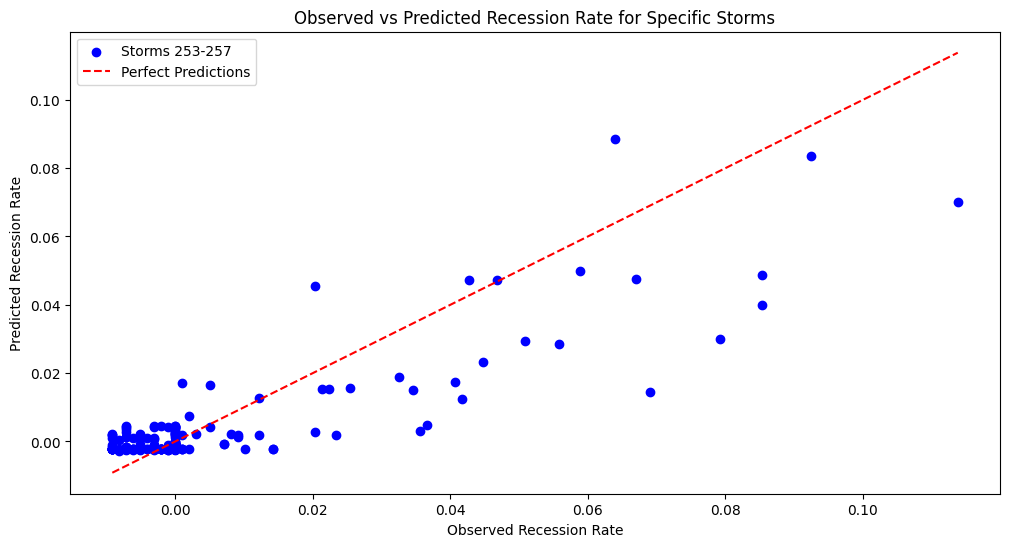

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of observed vs predicted values for each specific storm
plt.figure(figsize=(12, 6))
plt.title("Observed vs Predicted Recession Rate for Specific Storms")
plt.xlabel("Observed Recession Rate")
plt.ylabel("Predicted Recession Rate")

# Plot observed vs predicted values for each specific storm
plt.scatter(y_specific_storm, y_pred_specific_storm, label='Storms 253-257', color='blue', marker='o')

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_specific_storm), max(y_specific_storm)], [min(y_specific_storm), max(y_specific_storm)], linestyle='--', color='red', label='Perfect Predictions')

# Add a legend
plt.legend()

# Show the plot
plt.show()

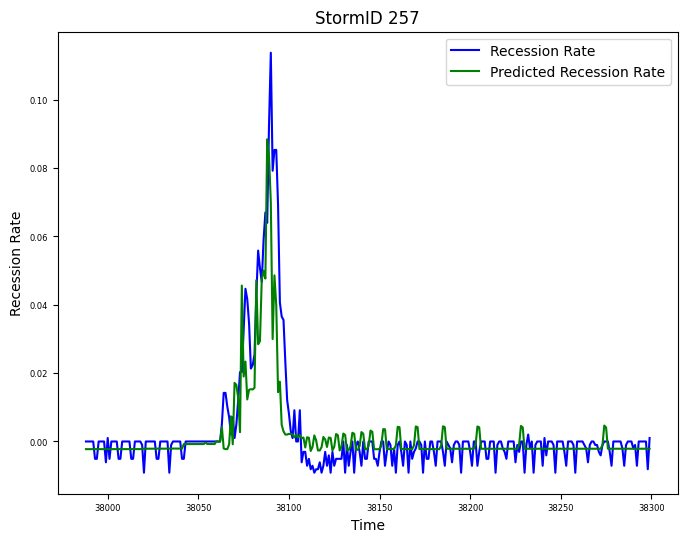

In [ ]:
# Create a plot for the specific storm
plt.figure(figsize=(8, 6))
plt.plot(specific_storm_data.index, specific_storm_data['Recession_Rate'], color='blue', label='Recession Rate')
plt.plot(specific_storm_data.index, y_pred_specific_storm, color='green', label='Predicted Recession Rate')
plt.xlabel('Time')
plt.ylabel('Recession Rate')
plt.title(f'StormID 257')
plt.legend()
plt.grid(False)

# Make x-ticks and y-ticks smaller
plt.tick_params(axis='both', which='both', labelsize=6)

# Show the plot
plt.show()

<Axes: >

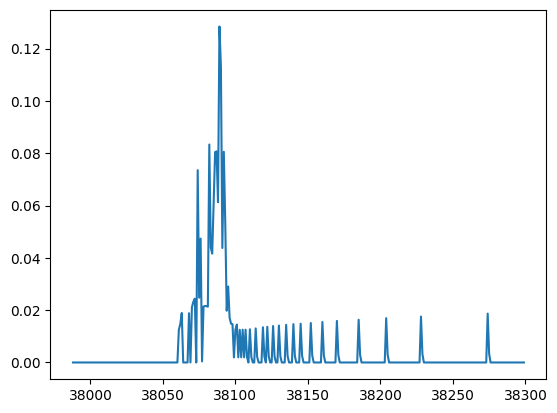

In [ ]:
specific_storm_data['Inflow'].plot()

#Model transfer variation in Inputs

In [ ]:
print(list(df))

['Datetime', 'Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow (mm/s)', 'Overflow(mm/s)', 'Precipitation (mm)', 'Water_Depth (mm)', 'Recession_Rate (mm/s)', 'SA (mm2)', 'Storm1', 'Storm2', 'StormID', 'Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'Peak_Inflow (mm/s)', 'Min_Inflow (mm/s)', 'Mean_Inflow (mm/s)', 'Min_RR (mm/s)', 'Mean_RR (mm/s)', 'Max_RR (mm/s)', 'Year', 'Month', 'Day', 'Season_Num', 'rain_indicator', 'hourly_rain', '30min_rain', '15min_rain']


In [ ]:
# Split the dataset based on unique storm events
unique_storm_events = df['StormID'].unique()
train_storm_events = unique_storm_events[:124]
test_storm_events = unique_storm_events[124:]

In [ ]:
test_storm_events

array([250, 253, 254, 256, 259, 260, 261, 262, 263, 269, 270, 271, 272,
       273, 274, 277, 284, 290, 291, 294, 295, 296, 298, 299, 302, 304,
       305, 308, 312, 320, 322, 325, 326])

In [ ]:
input_columns = ['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Precipitation (mm)','Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'StormID']
#input_columns = ['Temp_Air', 'Precipitation (mm)','Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'StormID']
#input_columns = ['Precipitation (mm)','Previous_Dry_Days', 'StormID']

target_column = 'Recession_Rate (mm/s)'

In [ ]:
# Split the data into train and test sets
train_df = df[df['StormID'].isin(train_storm_events)]
test_df = df[df['StormID'].isin(test_storm_events)]

In [ ]:
# Define input features and target variable for the train and test sets
X_train = train_df[input_columns]
y_train = train_df[target_column]

X_test = test_df[input_columns]
y_test = test_df[target_column]

In [ ]:
X_train

Temp_Air  Temp_Moist  Soil_MC_10  Precipitation (mm)  \
0          9.81      5.1986    0.399205                 0.0   
1          9.89      5.1946    0.396507                 0.0   
2          9.91      5.1974    0.396507                 0.0   
3          9.96      5.1998    0.395157                 0.0   
4          9.98      5.2094    0.395157                 0.0   
...         ...         ...         ...                 ...   
41333     16.41     15.8740    0.382000                 0.0   
41334     16.43     15.8760    0.382000                 0.0   
41335     16.50     15.8620    0.382000                 0.0   
41336     16.53     15.8620    0.382000                 0.0   
41337     16.58     15.8600    0.381000                 0.0   

       Previous_Dry_Days  Accumulated_Rain (mm)  Peak_Rain (mm)  \
0                      0                 0.4572          0.1016   
1                      0                 0.4572          0.1016   
2                      0                 0.4572          0.1016   
3                      0                 0.4572          0.1016   
4                      0                 0.4572          0.1016   
...                  ...                    ...             ...   
41333                  0                 1.5240          0.3556   
41334                  0                 1.5240          0.3556   
41335                  0                 1.5240          0.3556   
41336                  0                 1.5240          0.3556   
41337                  0                 1.5240          0.3556   

       Mean_Rain (mm)  StormID  
0            0.005715        1  
1            0.005715        1  
2            0.005715        1  
3            0.005715        1  
4            0.005715        1  
...               ...      ...  
41333        0.007471      249  
41334        0.007471      249  
41335        0.007471      249  
41336        0.007471      249  
41337        0.007471      249  

[41338 rows x 9 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=4, min_samples_split=2, random_state=42)  # You can adjust the number of estimators as needed
# Fit the model to the training data
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, random_state=42)

In [ ]:
# Make predictions on the train data
y_pred = model.predict(X_train_scaled)
# Evaluate the model
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 8.990124159995783e-05
R-squared: 0.48483024438833655


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Calculate Mean Squared Error
mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_train, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared Score
r2 = r2_score(y_train, y_pred)
print("R-squared (R2) Score:", r2)

# Calculate Explained Variance Score
evs = explained_variance_score(y_train, y_pred)
print("Explained Variance Score (EVS):", evs)

Mean Squared Error (MSE): 8.990124159995783e-05
Root Mean Squared Error (RMSE): 0.009481626527129078
Mean Absolute Error (MAE): 0.004111842159024027
R-squared (R2) Score: 0.48483024438833655
Explained Variance Score (EVS): 0.48483024646394135


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.00016130149209107327
R-squared: 0.19285846682714636


In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

# Calculate Explained Variance Score
evs = explained_variance_score(y_test, y_pred)
print("Explained Variance Score (EVS):", evs)

Mean Squared Error (MSE): 0.00016130149209107327
Root Mean Squared Error (RMSE): 0.012700452436471438
Mean Absolute Error (MAE): 0.0052377845124810425
R-squared (R2) Score: 0.19285846682714636
Explained Variance Score (EVS): 0.1953457649558208


# Feature Importance

In [ ]:
print(list(df))

['Datetime', 'Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow (mm/s)', 'Overflow(mm/s)', 'Precipitation (mm)', 'Water_Depth (mm)', 'Recession_Rate (mm/s)', 'SA (mm2)', 'Storm1', 'Storm2', 'StormID', 'Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'Peak_Inflow (mm/s)', 'Min_Inflow (mm/s)', 'Mean_Inflow (mm/s)', 'Min_RR (mm/s)', 'Mean_RR (mm/s)', 'Max_RR (mm/s)', 'Year', 'Month', 'Day', 'Season_Num', 'rain_indicator', 'hourly_rain', '30min_rain', '15min_rain']


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import numpy as np

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor()

# Fit the model on your training data
rf_model.fit(X_train, y_train)

# Perform permutation importance
results = permutation_importance(rf_model, X_train, y_train, n_repeats=10, random_state=42)

# Get sorted importances
sorted_importances_idx = results.importances_mean.argsort()

# Print the feature importances
print("Features sorted by their importance:")
print(np.array(input_columns)[sorted_importances_idx])

Features sorted by their importance:
['Previous_Dry_Days' 'Peak_Rain (mm)' 'Accumulated_Rain (mm)'
 'Overflow(mm/s)' 'StormID' 'Soil_MC_35' 'Soil_MC_10' 'Temp_Air'
 'Soil_MC_91' 'Temp_Moist' 'Mean_Rain (mm)' 'Soil_MC_65'
 'Precipitation (mm)' 'Inflow (mm/s)']


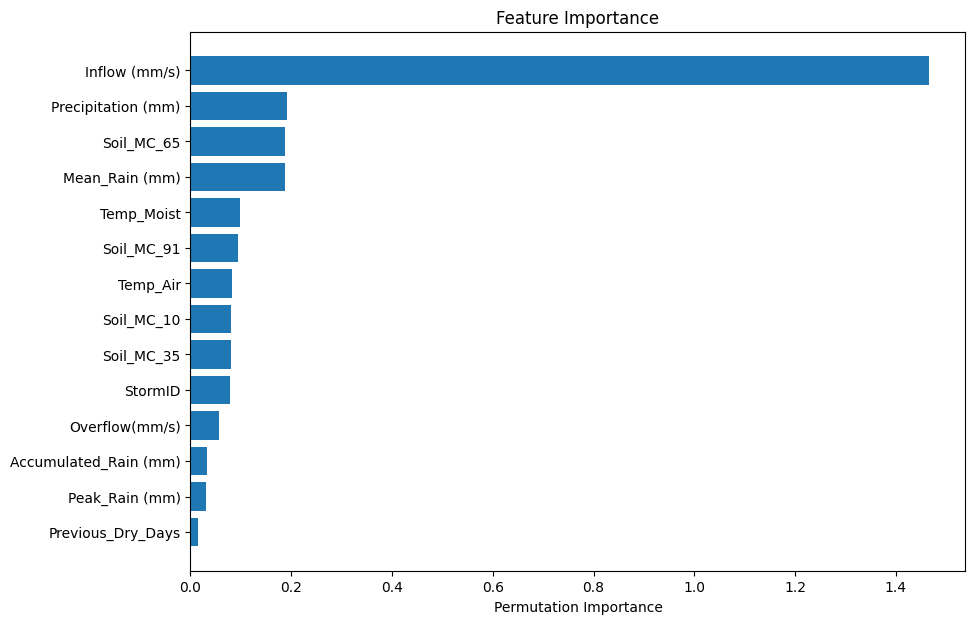

In [ ]:
import matplotlib.pyplot as plt

# Assuming `input_columns` is defined and matches the feature names in `X_train`
feature_names = np.array(input_columns)

# Sort the importances in descending order and get the indices
sorted_idx = results.importances_mean.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 7))
plt.barh(range(len(sorted_idx)), results.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature at the top
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor()

# Create the RFE model and select 5 attributes
rfe = RFE(estimator=rf_model, n_features_to_select=5)  # Adjust the number of features as needed

# Fit RFE
rfe.fit(X_train, y_train)

# Print the ranking of features
feature_ranking = sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), input_columns))
print("Features sorted by their rank:")
print(feature_ranking)

Features sorted by their rank:
[(1, 'Inflow (mm/s)'), (1, 'Precipitation (mm)'), (1, 'Soil_MC_65'), (1, 'Temp_Air'), (1, 'Temp_Moist'), (2, 'Mean_Rain (mm)'), (3, 'Soil_MC_35'), (4, 'Soil_MC_91'), (5, 'Overflow(mm/s)'), (6, 'Soil_MC_10'), (7, 'Peak_Rain (mm)'), (8, 'Accumulated_Rain (mm)'), (9, 'StormID'), (10, 'Previous_Dry_Days')]


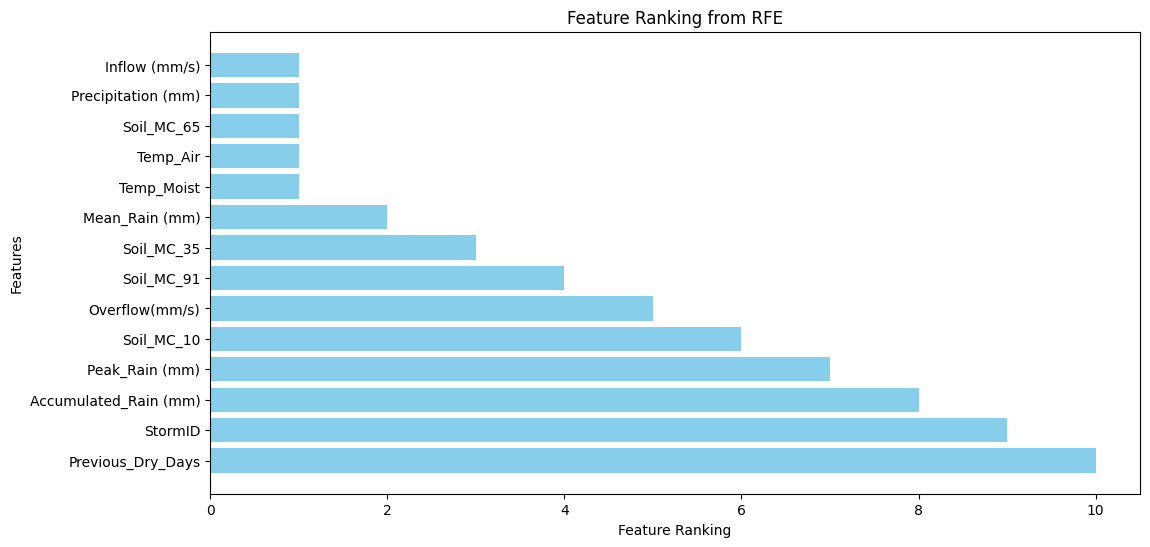

In [ ]:
import matplotlib.pyplot as plt

# Unzipping the rankings and feature names
rankings, features = zip(*feature_ranking)

# Creating a horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(features, rankings, color='skyblue')
plt.xlabel('Feature Ranking')
plt.ylabel('Features')
plt.title('Feature Ranking from RFE')
plt.gca().invert_yaxis()  # Invert y-axis to show the best feature at the top
plt.show()

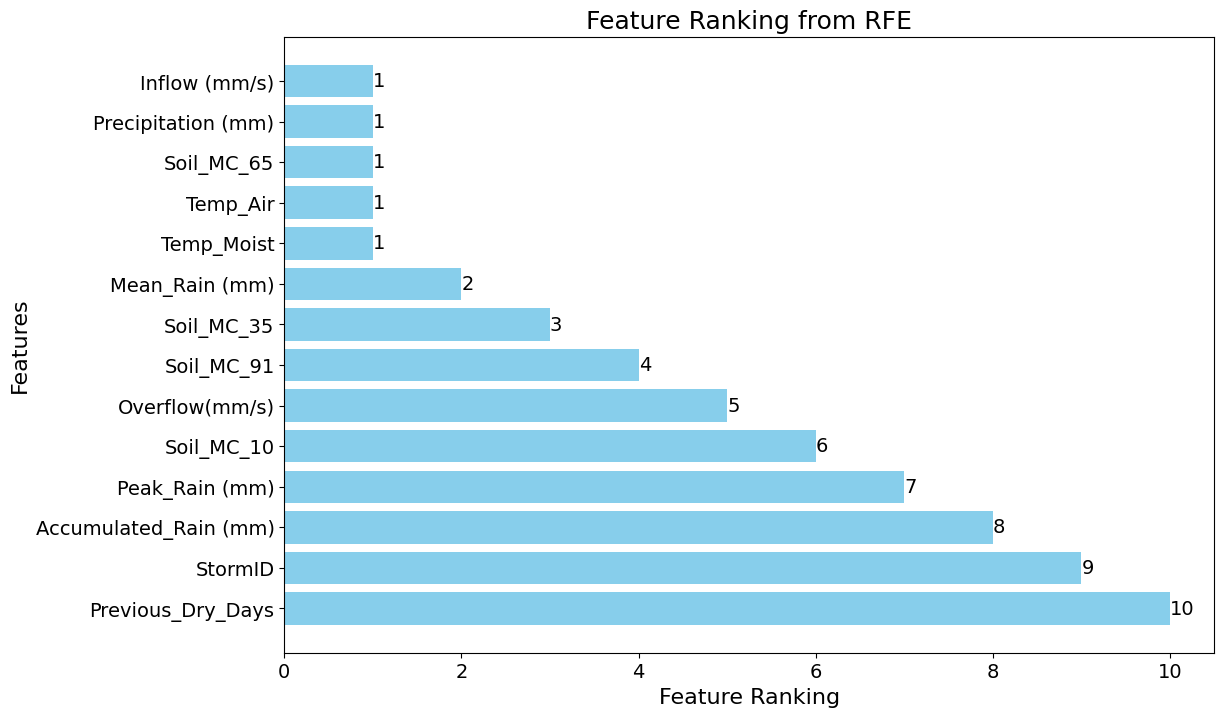

In [ ]:
import matplotlib.pyplot as plt

# Assuming feature_ranking is defined
# rankings, features = zip(*feature_ranking)

# Set global font size
plt.rcParams.update({'font.size': 14})  # Adjust as needed

# Creating a horizontal bar chart
plt.figure(figsize=(12, 8))  # Adjust size as needed
bars = plt.barh(features, rankings, color='skyblue')
plt.xlabel('Feature Ranking', fontsize=16)  # Adjust fontsize as needed
plt.ylabel('Features', fontsize=16)  # Adjust fontsize as needed
plt.title('Feature Ranking from RFE', fontsize=18)  # Adjust fontsize as needed
plt.gca().invert_yaxis()  # Invert y-axis to show the best feature at the top

# Adding the ranking values on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', va='center', fontsize=14)  # Adjust fontsize as needed

plt.show()

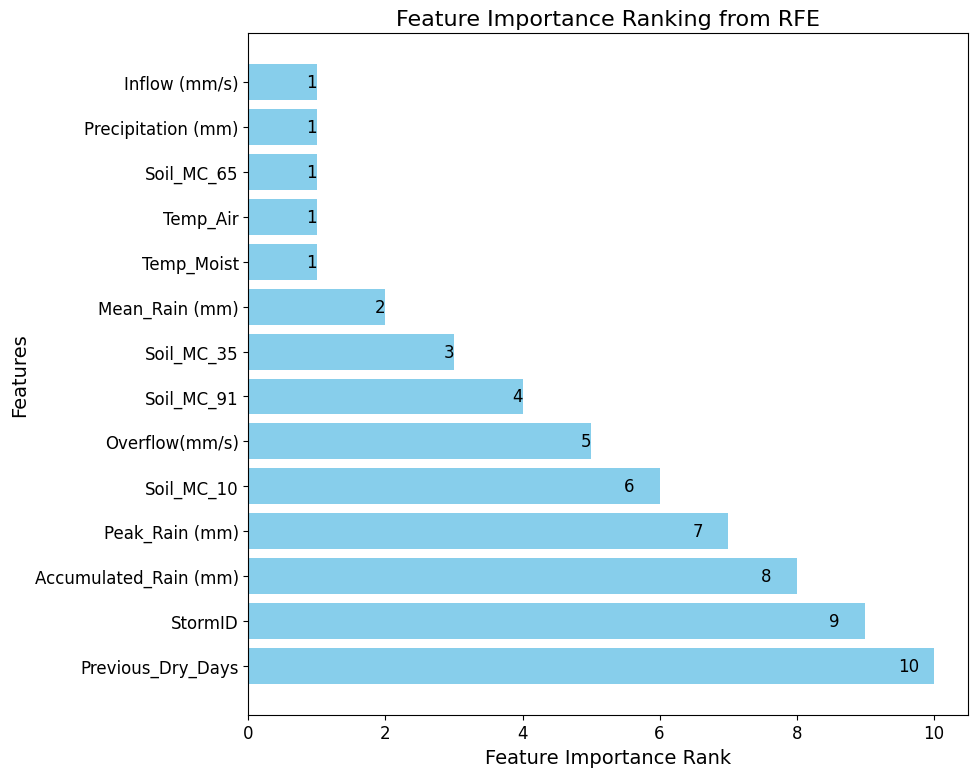

In [ ]:
# Unzipping the rankings and feature names
rankings, features = zip(*feature_ranking)

# Creating a horizontal bar chart for feature importances
plt.figure(figsize=(10, 8))
bars = plt.barh(features, rankings, color='skyblue')
plt.xlabel('Feature Importance Rank', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance Ranking from RFE', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top

# Adding the ranking values on the bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width if width < plt.xlim()[1] * 0.5 else width - (plt.xlim()[1] * 0.05)
    plt.text(label_x_pos, bar.get_y() + bar.get_height() / 2., f'{width}', va='center', ha='right' if width < plt.xlim()[1] * 0.5 else 'left', color='black', fontsize=12)

plt.tight_layout()
plt.show()

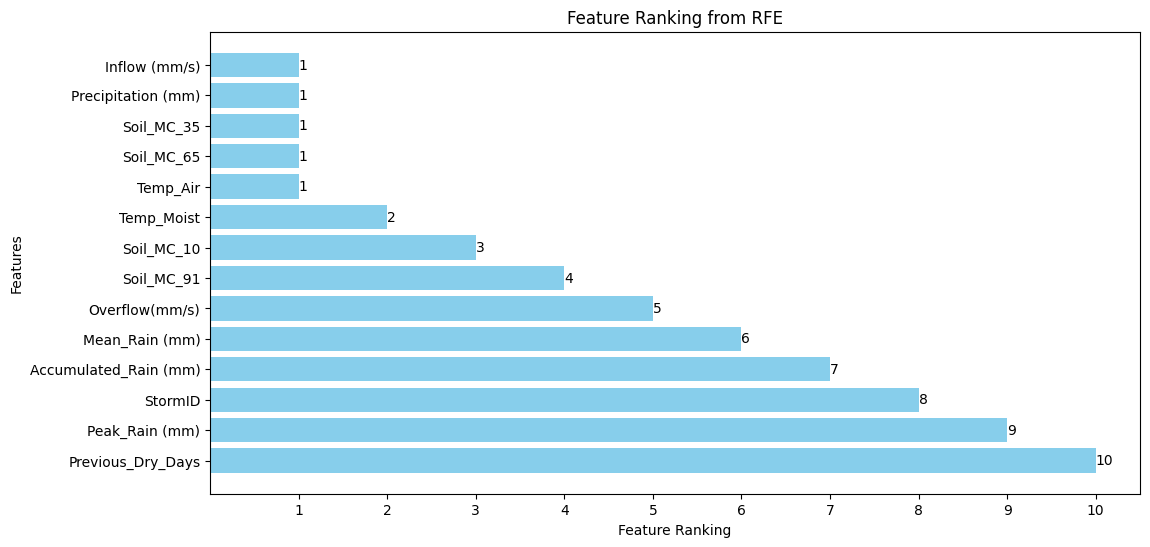

In [ ]:
# Correcting the code to display all x-tick values

plt.figure(figsize=(12, 6))
bars = plt.barh(features, rankings, color='skyblue')
plt.xlabel('Feature Ranking')
plt.ylabel('Features')
plt.title('Feature Ranking from RFE')
plt.gca().invert_yaxis()  # Invert y-axis to show the best feature at the top

# Adding the ranking values on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', va='center')

# Converting rankings to numeric values and setting x-ticks
numeric_rankings = [int(r) for r in rankings]
plt.xticks(range(1, max(numeric_rankings) + 1))

plt.show()

In [ ]:
rankings

(1, 1, 1, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.inspection import permutation_importance

# # Assuming you have a trained model named 'model' and data 'X_test', 'y_test'

# # Compute Permutation Feature Importance
# perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30)

# # Sort the features by importance
# sorted_idx = perm_importance.importances_mean.argsort()

# # Plotting
# plt.figure(figsize=(12, 6))
# plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
# plt.yticks(range(len(sorted_idx)), np.array(input_columns)[sorted_idx])
# plt.xlabel("Permutation Importance")
# plt.title("Permutation Feature Importance")
# plt.show()

In [ ]:
!pip install scikit-learn

In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 33.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
print(list(X_train))

['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow (mm/s)', 'Overflow(mm/s)', 'Precipitation (mm)', 'Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'StormID']


In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Initialize and fit the Gradient Boosting model
my_model = RandomForestRegressor()
my_model.fit(X_train, y_train)

TypeError: validate_params() got an unexpected keyword argument 'prefer_skip_nested_validation'

NameError: name 'PartialDependenceDisplay' is not defined

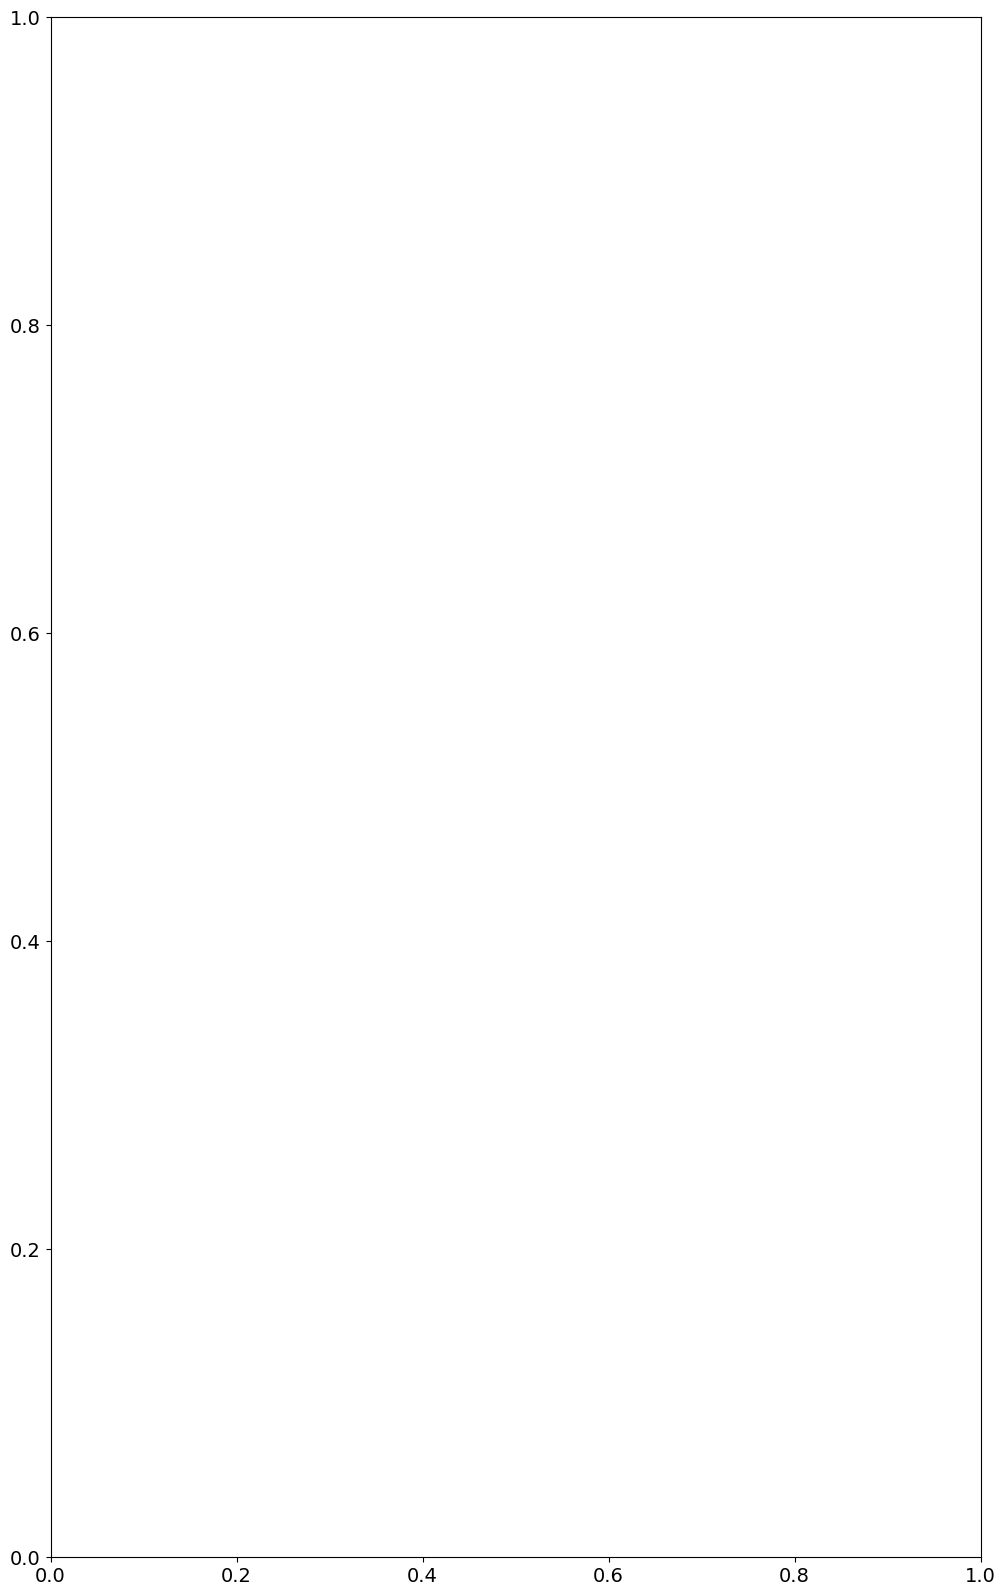

In [ ]:
# # Create Partial Dependence Plots
# fig, ax = plt.subplots(figsize=(12, 4))
# PartialDependenceDisplay.from_estimator(my_model, X_train, [1:8],
#                                         feature_names=['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow (mm/s)', 'Overflow(mm/s)', 'Precipitation (mm)', 'Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)'],
#                                         grid_resolution=10, ax=ax)
# plt.show()

feature_indices = list(range(1, 12))  # This will select features 1 through 7

fig, ax = plt.subplots(figsize=(12, 20))
PartialDependenceDisplay.from_estimator(
    my_model, X_train, feature_indices,
    feature_names=['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow (mm/s)', 'Overflow(mm/s)', 'Precipitation (mm)', 'Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)'],
    grid_resolution=10, ax=ax
)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Increase font sizes
plt.rcParams['font.size'] = 12  # Adjust as needed
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

feature_indices = list(range(1, 12))  # This will select features 1 through 11
feature_names = ['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow (mm/s)', 'Overflow(mm/s)', 'Precipitation (mm)', 'Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)']

fig, ax = plt.subplots(figsize=(12, 20))

# Customize the plot with a style context
with plt.style.context('ggplot'):  # You can change 'ggplot' to 'seaborn' or another style
    display = PartialDependenceDisplay.from_estimator(
        my_model, X_train, feature_indices,
        feature_names=feature_names,
        grid_resolution=10, ax=ax, n_jobs=3
    )
    display.figure_.suptitle('Partial Dependence of Features', fontweight='bold')
    display.figure_.subplots_adjust(top=0.9)  # Adjust the title position
    ax.set_ylabel('Partial Dependence (dPD)')

    # Set y-axis limits
    #ax.set_ylim(-0.003, 0.01)

    plt.show()


TypeError: validate_params() got an unexpected keyword argument 'prefer_skip_nested_validation'

In [ ]:
# Assuming model is your trained model and X is your feature DataFrame
features = input_columns  # You can select specific features as well

# Create the partial dependence plots
fig, ax = plt.subplots(figsize=(15, 10))
plot_partial_dependence(model, X, features, ax=ax, n_jobs=3, grid_resolution=20)

# Customize the plots
ax.set_title('Partial Dependence Plots')
plt.tight_layout()
plt.show()

#Model performance for the entire dataset (train and test)

In [ ]:
import pandas as pd

# Update the data for the DataFrame
model_performance = {
    'Model': ['LR', 'LR', 'RF', 'RF', 'LSTM', 'LSTM', 'PILSTM', 'PILSTM'],
    'Dataset': ['Train', 'Test', 'Train', 'Test', 'Train', 'Test', 'Train', 'Test'],
    'MSE': [
        8.19e-05, 9.83e-05,
        3.45e-05, 8.35e-05,
        3.02e-05, 3.78e-05,
        3.78e-05, 3.05e-05
    ],
    'RMSE': [
        0.00905, 0.00990,
        0.00587, 0.00910,
        0.00549, 0.00615,
        0.00549, 0.00615
    ],
    'MAE': [
        0.00422, 0.0039,
        0.00322, 0.00377,
        0.00337, 0.00333,
        0.00337, 0.00333
    ],
    'R2 Score': [
        0.512, 0.435,
        0.731, 0.612,
        0.807, 0.731,
        0.834, 0.782
    ],
    'EVS': [
        0.514, 0.464,
        0.735, 0.622,
        0.813, 0.740,
        0.839, 0.786
    ]
}

# Create the DataFrame
model_performance_df = pd.DataFrame(model_performance)

# Output the DataFrame
print(model_performance_df)

    Model Dataset       MSE     RMSE      MAE  R2 Score    EVS
0      LR   Train  0.000082  0.00905  0.00422     0.512  0.514
1      LR    Test  0.000098  0.00990  0.00390     0.435  0.464
2      RF   Train  0.000034  0.00587  0.00322     0.791  0.795
3      RF    Test  0.000083  0.00910  0.00377     0.612  0.622
4    LSTM   Train  0.000030  0.00549  0.00337     0.807  0.813
5    LSTM    Test  0.000038  0.00615  0.00333     0.731  0.740
6  PILSTM   Train  0.000038  0.00549  0.00337     0.834  0.839
7  PILSTM    Test  0.000030  0.00615  0.00333     0.782  0.786


#Uncertainty

KeyError: '[4540, 7656, 836, 16282, 3369, 16388, 2816, 16149, 6317, 5116, 15206, 16793, 6905, 6130, 16841, 16567, 9073, 13052, 347, 1626, 7921, 342, 13143, 1120, 3999, 13641, 4247, 4014, 7093, 8626, 9265, 12408, 889, 1257, 2467, 16386, 16579, 5009, 1381, 16434, 1735, 10460, 4838, 6598, 355, 6016, 5632, 2325, 4776, 504, 16252, 14771, 4063, 865, 13306, 412, 1950, 7269, 7986, 4889, 10626, 10278, 6135] not in index'

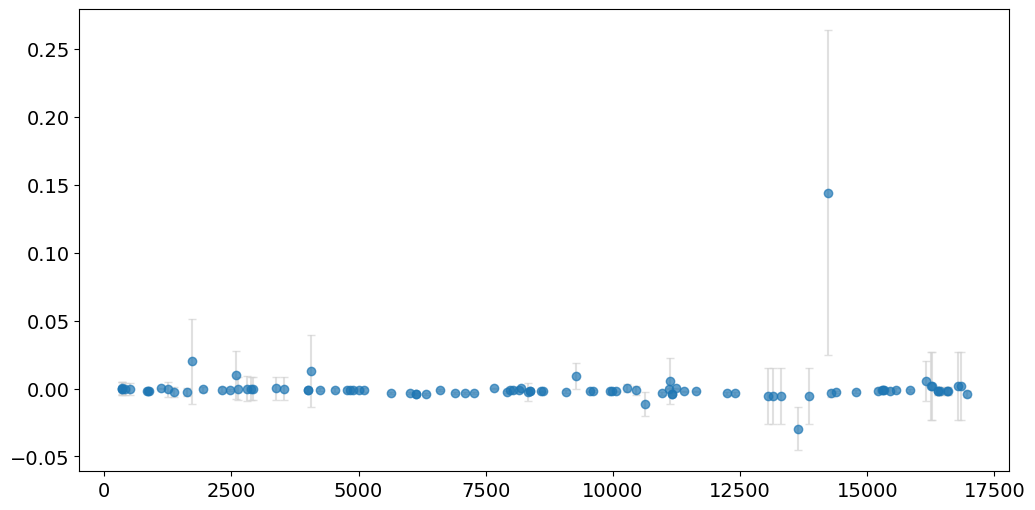

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Make predictions using the scaled test data
predictions = model.predict(X_test_scaled)

# Calculate the standard deviation of predictions from individual trees
# This gives us a measure of the variability in the predictions
individual_tree_predictions = np.array([tree.predict(X_test_scaled) for tree in model.estimators_])
std_dev = individual_tree_predictions.std(axis=0)

# Calculate prediction intervals
# This gives us a range where we expect the true value to lie with 95% confidence
confidence_interval_lower = predictions - (1.96 * std_dev)
confidence_interval_upper = predictions + (1.96 * std_dev)

# Plotting
plt.figure(figsize=(12, 6))

# To make our plot more readable, we'll plot a sample of the predictions
# Let's randomly select 100 indices for this purpose
sample_indices = np.random.choice(range(len(predictions)), 100, replace=False)

# Error bars represent the prediction intervals
plt.errorbar(sample_indices, predictions[sample_indices], yerr=1.96*std_dev[sample_indices], fmt='o', label='Predictions with 95% CI', ecolor='lightgray', alpha=0.7, capsize=3)

# Plot the actual values for the sampled indices for comparison
plt.scatter(sample_indices, y_test[sample_indices], color='red', label='Actual values')

# Label your axes and the plot
plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.title('Random Forest Predictions with Uncertainty (95% Confidence Interval)')
plt.legend()

# Tight layout often makes the plot more attractive
plt.tight_layout()

# Display the plot
plt.show()

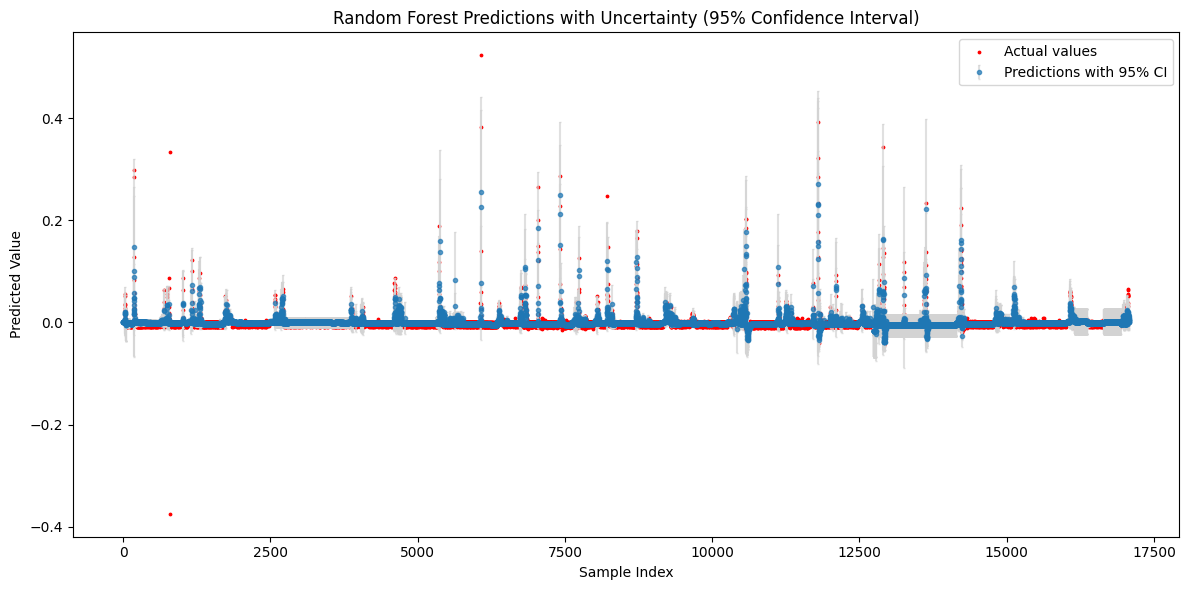

In [ ]:
# Make predictions using the scaled test data
predictions = model.predict(X_test_scaled)

# Calculate the standard deviation of predictions from individual trees
individual_tree_predictions = np.array([tree.predict(X_test_scaled) for tree in model.estimators_])
std_dev = individual_tree_predictions.std(axis=0)

# Plotting
plt.figure(figsize=(12, 6))

# Plotting all predictions
plt.errorbar(range(len(predictions)), predictions, yerr=1.96*std_dev, fmt='o', label='Predictions with 95% CI', ecolor='lightgray', alpha=0.7, capsize=1, markersize=3)

# Plot the actual values for comparison
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual values', s=3)

# Label your axes and the plot
plt.xlabel('Sample Index')
plt.ylabel('Predicted Value')
plt.title('Random Forest Predictions with Uncertainty (95% Confidence Interval)')
plt.legend()

# Tight layout often makes the plot more attractive
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# Parameters
n_iterations = 1000  # Number of bootstrap samples to create
confidence_level = 0.95  # 95% confidence interval

# Initialize an empty DataFrame to store the confidence intervals for each storm
ci_df = pd.DataFrame(columns=['StormID', 'Lower_CI', 'Upper_CI'])

for storm_id in df['StormID'].unique():
    # Filter the dataset for the current storm
    storm_data = df[df['StormID'] == storm_id]['Recession_Rate (mm/s)']

    # Bootstrap
    bootstrap_means = []
    for _ in range(n_iterations):
        bootstrap_sample = np.random.choice(storm_data, size=len(storm_data), replace=True)
        bootstrap_means.append(np.mean(bootstrap_sample))

    # Calculating the confidence intervals
    lower_bound = np.percentile(bootstrap_means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_means, (1 + confidence_level) / 2 * 100)

    # Append the results
    ci_df = ci_df.append({'StormID': storm_id, 'Lower_CI': lower_bound, 'Upper_CI': upper_bound}, ignore_index=True)

# Display the confidence intervals for each storm
print(ci_df)

<ipython-input-92-5df0f089dafe>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ci_df = ci_df.append({'StormID': storm_id, 'Lower_CI': lower_bound, 'Upper_CI': upper_bound}, ignore_index=True)
<ipython-input-92-5df0f089dafe>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ci_df = ci_df.append({'StormID': storm_id, 'Lower_CI': lower_bound, 'Upper_CI': upper_bound}, ignore_index=True)
<ipython-input-92-5df0f089dafe>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ci_df = ci_df.append({'StormID': storm_id, 'Lower_CI': lower_bound, 'Upper_CI': upper_bound}, ignore_index=True)
<ipython-input-92-5df0f089dafe>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

     StormID  Lower_CI  Upper_CI
0        1.0 -0.000991 -0.000127
1        2.0 -0.002067  0.002820
2        4.0 -0.000940  0.001130
3        5.0 -0.000783  0.000662
4       10.0 -0.002102  0.002310
..       ...       ...       ...
152    312.0 -0.000467  0.000573
153    320.0 -0.000410  0.000476
154    322.0 -0.000477  0.000460
155    325.0 -0.000515  0.000510
156    326.0  0.006420  0.011266

[157 rows x 3 columns]


<ipython-input-92-5df0f089dafe>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ci_df = ci_df.append({'StormID': storm_id, 'Lower_CI': lower_bound, 'Upper_CI': upper_bound}, ignore_index=True)
<ipython-input-92-5df0f089dafe>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ci_df = ci_df.append({'StormID': storm_id, 'Lower_CI': lower_bound, 'Upper_CI': upper_bound}, ignore_index=True)


#Input Combination

In [ ]:
print(list(df))

['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow (mm/s)', 'Overflow(mm/s)', 'Precipitation (mm)', 'Water_Depth (mm)', 'Recession_Rate (mm/s)', 'SA (mm2)', 'Storm1', 'Storm2', 'StormID', 'Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'Peak_Inflow (mm/s)', 'Min_Inflow (mm/s)', 'Mean_Inflow (mm/s)', 'Min_RR (mm/s)', 'Mean_RR (mm/s)', 'Max_RR (mm/s)', 'Year', 'Month', 'Day', 'Season_Num', 'rain_indicator', 'hourly_rain', '30min_rain', '15min_rain']


In [ ]:
# Split the dataset based on unique storm events
# unique_storm_events = df['StormID'].unique()
# train_storm_events = unique_storm_events[:80]
# test_storm_events = unique_storm_events[80:]

In [ ]:
#test_storm_events

In [ ]:
#input_columns = ['Precipitation (mm)', 'StormID']

#input_columns = ['Precipitation (mm)','Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'StormID']

#input_columns = ['Temp_Air', 'Precipitation (mm)','Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'StormID']

#input_columns = ['Temp_Air', 'Temp_Moist', 'Precipitation (mm)','Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'StormID']

#input_columns = ['Temp_Air', 'Temp_Moist', 'Inflow (mm/s)', 'Overflow(mm/s)', 'Precipitation (mm)','Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'StormID']

#input_columns = ['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Precipitation (mm)','Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'StormID']

#input_columns = ['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Inflow (mm/s)', 'Overflow(mm/s)', 'Precipitation (mm)','Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'StormID']

input_columns = ['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow (mm/s)', 'Overflow(mm/s)', 'Precipitation (mm)','Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'StormID']
target_column = 'Recession_Rate (mm/s)'

In [ ]:
# List of StormIDs to include

storm_ids = [12, 14, 40, 20, 57, 52, 61, 65, 70, 85, 95, 163, 158, 171, 115, 200, 231, 221, 237, 244, 273, 277, 261, 296, 299, 304, 305, 325, 326, 214, 205]

# Filter the DataFrame to include only the specified StormIDs
test_df = df[df['StormID'].isin(storm_ids)]

# Filter the DataFrame to exclude the specified StormIDs
train_df = df[~df['StormID'].isin(storm_ids)]

In [ ]:
unique_storm_events_train = train_df['StormID'].unique()
unique_storm_events_test = test_df['StormID'].unique()
train_storm_events = unique_storm_events_train
test_storm_events = unique_storm_events_test

In [ ]:
test_storm_events

array([ 12,  14,  20,  40,  52,  57,  61,  65,  70,  85,  95, 115, 158,
       163, 171, 200, 205, 214, 221, 231, 237, 244, 261, 273, 277, 296,
       299, 304, 305, 325, 326])

In [ ]:
X_train = df[input_columns]
y_train = df[target_column]

In [ ]:
# Define input features and target variable for the train and test sets
X_train = train_df[input_columns]
y_train = train_df[target_column]

X_test = test_df[input_columns]
y_test = test_df[target_column]

In [ ]:
y_test

Datetime
2014-05-23 16:40:00    0.000000
2014-05-23 16:45:00    0.000000
2014-05-23 16:50:00    0.000000
2014-05-23 16:55:00    0.000000
2014-05-23 17:00:00    0.000000
                         ...   
2018-12-31 23:35:00    0.000000
2018-12-31 23:40:00    0.002032
2018-12-31 23:45:00    0.007112
2018-12-31 23:50:00    0.001016
2018-12-31 23:55:00    0.000000
Name: Recession_Rate (mm/s), Length: 17080, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=4, min_samples_split=2, random_state=42)  # You can adjust the number of estimators as needed
# Fit the model to the training data
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, random_state=42)

In [ ]:
# Make predictions on the train data
y_pred_train = model.predict(X_train_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Calculate Mean Squared Error
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error
rmse_train = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse_train)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared Score
r2_train = r2_score(y_train, y_pred_train)
print("R-squared (R2) Score:", r2_train)

# Calculate Explained Variance Score
evs = explained_variance_score(y_train, y_pred_train)
print("Explained Variance Score (EVS):", evs)

Mean Squared Error (MSE): 3.455016901393744e-05
Root Mean Squared Error (RMSE): 0.00587793918086411
Mean Absolute Error (MAE): 0.0032446619778705474
R-squared (R2) Score: 0.7953416239310912
Explained Variance Score (EVS): 0.7953416671915107


Test Score

In [ ]:
# Make predictions on the test data
y_pred_test = model.predict(X_test_scaled)

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared Score
r2_test = r2_score(y_test, y_pred_test)
print("R-squared (R2) Score:", r2_test)

# Calculate Explained Variance Score
evs = explained_variance_score(y_test, y_pred_test)
print("Explained Variance Score (EVS):", evs)

Mean Squared Error (MSE): 8.35248164521161e-05
Root Mean Squared Error (RMSE): 0.009139191236215385
Mean Absolute Error (MAE): 0.003759766261945692
R-squared (R2) Score: 0.6114084515947065
Explained Variance Score (EVS): 0.6116648604867585


#Learning Curve

In [ ]:
# Group by 'StormID', then resample and sum
df_15mins = df.groupby('StormID').resample('15T').sum()
df_30mins = df.groupby('StormID').resample('30T').sum()
df_1hr = df.groupby('StormID').resample('1H').sum()

In [ ]:
print('df_15mins:', df_15mins.shape[0], 'df_15mins:', df_30mins.shape[0], 'df_60mins:', df_1hr.shape[0])

df_15mins: 23024 df_15mins: 11590 df_60mins: 5875


In [ ]:
# Assuming you have a DataFrame 'df' with the specified columns
#input_columns = ['Precipitation', 'Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow', 'Overflow', 'Water_Depth']
input_columns = ['Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow (mm/s)', 'Overflow(mm/s)', 'Precipitation (mm)','Previous_Dry_Days', 'Accumulated_Rain (mm)', 'Peak_Rain (mm)', 'Mean_Rain (mm)', 'StormID']

#input_columns = ['Precipitation', 'Temp_Air', 'Temp_Moist', 'Soil_MC_10', 'Soil_MC_35', 'Soil_MC_65', 'Soil_MC_91', 'Inflow', 'Overflow', 'Water_Depth', 'accumulated_rain', 'peak_rain', 'mean_rain']
#input_columns = ['Precipitation', 'Temp_Moist', 'Soil_MC_10', 'Inflow', 'Overflow', 'Water_Depth', 'accumulated_rain', 'peak_rain', 'mean_rain', 'Month', 'Day', 'Season_Num']

target_column = 'Recession_Rate (mm/s)'
# target_column = 'Water_Depth (mm)'

In [ ]:
# List of StormIDs to include

storm_ids = [12, 14, 40, 20, 57, 52, 61, 65, 70, 85, 95, 163, 158, 171, 115, 200, 231, 221, 237, 244, 273, 277, 261, 296, 299, 304, 305, 325, 326, 214, 205]

# Filter the DataFrame to include only the specified StormIDs
test_df_1hr = df_1hr[df_1hr['StormID'].isin(storm_ids)]

# Filter the DataFrame to exclude the specified StormIDs
train_df_1hr = df_1hr[~df_1hr['StormID'].isin(storm_ids)]

In [ ]:
unique_storm_events_train = train_df_1hr['StormID'].unique()
unique_storm_events_test = test_df_1hr['StormID'].unique()

In [ ]:
X_train = df_1hr[input_columns]
y_train = df_1hr[target_column]

In [ ]:
# Define input features and target variable for the train and test sets
X_train = train_df_1hr[input_columns]
y_train = train_df_1hr[target_column]

X_test = test_df_1hr[input_columns]
y_test = test_df_1hr[target_column]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

Model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_leaf=4, min_samples_split=2, random_state=42)  # You can adjust the number of estimators as needed
# Fit the model to the training data
model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, random_state=42)

In [ ]:
# Make predictions on the train data
y_pred_train = model.predict(X_train_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Calculate Mean Squared Error
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error
rmse_train = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse_train)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared Score
r2_train = r2_score(y_train, y_pred_train)
print("R-squared (R2) Score:", r2_train)

# Calculate Explained Variance Score
evs = explained_variance_score(y_train, y_pred_train)
print("Explained Variance Score (EVS):", evs)

Mean Squared Error (MSE): 0.0007784271763784593
Root Mean Squared Error (RMSE): 0.027900307818704426
Mean Absolute Error (MAE): 0.010830211825878752
R-squared (R2) Score: 0.9144859782601784
Explained Variance Score (EVS): 0.9144862983611489


Test Score

In [ ]:
# Make predictions on the test data
y_pred_test = model.predict(X_test_scaled)

In [ ]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error
rmse_test = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared Score
r2_test = r2_score(y_test, y_pred_test)
print("R-squared (R2) Score:", r2_test)

# Calculate Explained Variance Score
evs = explained_variance_score(y_test, y_pred_test)
print("Explained Variance Score (EVS):", evs)

Mean Squared Error (MSE): 0.003093024589203375
Root Mean Squared Error (RMSE): 0.05561496731279607
Mean Absolute Error (MAE): 0.027222505100747363
R-squared (R2) Score: -109.28445600556302
Explained Variance Score (EVS): -96.50701048713869


#Hypothesis testing

In [ ]:
# Corrected data based on the user input

data = {

    'Model': ['LR', 'RF', 'DDLSTM', 'PILSTM'],

    'Set': ['Test', 'Test', 'Test', 'Test'],

    'R2_Mean': [0.35, 0.48, 0.63, 0.63],

    'SD': [0.39, 0.23, 0.2, 0.2]

}

# Convert the dictionary to a pandas DataFrame

df = pd.DataFrame(data)

In [ ]:
df

Model   Set  R2_Mean    SD
0      LR  Test     0.35  0.39
1      RF  Test     0.48  0.23
2  DDLSTM  Test     0.63  0.20
3  PILSTM  Test     0.63  0.20

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Corrected data based on the user input
data = {
    'Model': ['LR', 'RF', 'DDLSTM', 'PILSTM'],
    'Set': ['Test', 'Test', 'Test', 'Test'],
    'R2_Mean': [0.35, 0.48, 0.63, 0.63],
    'SD': [0.39, 0.23, 0.2, 0.2]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Assuming the R2_Mean and SD are from multiple observations (like k-fold cross-validation),
# we generate multiple samples for each model to simulate individual observations.
# Here we simulate 5 observations per model as an example for ANOVA.
np.random.seed(0)  # For reproducibility
expanded_data = {}
for i in range(len(df)):
    model = df.iloc[i]['Model']
    mean = df.iloc[i]['R2_Mean']
    sd = df.iloc[i]['SD']
    expanded_data[model] = np.random.normal(loc=mean, scale=sd, size=5)

# Convert the expanded data into a DataFrame for ANOVA analysis
expanded_df = pd.DataFrame(expanded_data)

# Perform the ANOVA
f_value, p_value = stats.f_oneway(expanded_df['LR'], expanded_df['RF'], expanded_df['DDLSTM'], expanded_df['PILSTM'])

# If ANOVA shows significant differences, we perform post-hoc tests
if p_value < 0.05:
    # Prepare data for Tukey's HSD test
    df_melted = expanded_df.melt(var_name='Model', value_name='R2')
    tukey_test = pairwise_tukeyhsd(endog=df_melted['R2'], groups=df_melted['Model'], alpha=0.05)
    tukey_result = tukey_test.summary()
else:
    tukey_result = "ANOVA did not find significant differences."

f_value, p_value, tukey_result

(4.126645151629995,
 0.0240306199149497,
 <class 'statsmodels.iolib.table.SimpleTable'>)

In [ ]:
# Print Tukey's test summary
print(tukey_result)

# To get the actual values, you could convert the summary to a DataFrame
tukey_df = pd.DataFrame(data=tukey_test._results_table.data[1:], columns=tukey_test._results_table.data[0])
print(tukey_df)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
DDLSTM     LR   0.1686 0.5404  -0.186 0.5233  False
DDLSTM PILSTM  -0.0737 0.9322 -0.4284 0.2809  False
DDLSTM     RF  -0.2611 0.1932 -0.6157 0.0936  False
    LR PILSTM  -0.2423 0.2454  -0.597 0.1123  False
    LR     RF  -0.4297 0.0151 -0.7843 -0.075   True
PILSTM     RF  -0.1873  0.454  -0.542 0.1673  False
---------------------------------------------------
   group1  group2  meandiff   p-adj   lower   upper  reject
0  DDLSTM      LR    0.1686  0.5404 -0.1860  0.5233   False
1  DDLSTM  PILSTM   -0.0737  0.9322 -0.4284  0.2809   False
2  DDLSTM      RF   -0.2611  0.1932 -0.6157  0.0936   False
3      LR  PILSTM   -0.2423  0.2454 -0.5970  0.1123   False
4      LR      RF   -0.4297  0.0151 -0.7843 -0.0750    True
5  PILSTM      RF   -0.1873  0.4540 -0.5420  0.1673   False


In [ ]:
# To create individual observations for RF and DDLSTM models based on the provided mean R2 and SD,
# we will simulate observations using a normal distribution with these parameters.

np.random.seed(42)  # For reproducibility

# Given mean and SD for RF and DDLSTM R2 scores
mean_rf, sd_rf = 0.35, 0.39
mean_ddlstm, sd_ddlstm = 0.48, 0.23

# Assuming we want to create 30 individual observations for each model
n_observations = 30

# Simulate individual R2 observations for each model
observations_rf = np.random.normal(loc=mean_rf, scale=sd_rf, size=n_observations)
observations_ddlstm = np.random.normal(loc=mean_ddlstm, scale=sd_ddlstm, size=n_observations)

# Now, let's assume these observations are paired (e.g., obtained from the same set of data splits in cross-validation)
# and perform a paired t-test to compare the model performances.

# Perform the paired t-test
t_stat, p_value = stats.ttest_rel(observations_rf, observations_ddlstm)

t_stat, p_value

(-2.448000418333567, 0.020652978738563747)

#Regularization parameter

In [ ]:
data = {
    "Regularization Parameter": [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.80, 1.0, 1.5, 2.0],
    "Train Score": [0.76, 0.76, 0.77, 0.75, 0.81, 0.78, 0.71, 0.78, 0.66, 0.77, 0.71, 0.68, 0.68, 0.64, 0.62, 0.63, 0.55, 0.49, 0.34, 0.26],
    "Test Score": [0.72, 0.75, 0.76, 0.76, 0.78, 0.77, 0.73, 0.73, 0.66, 0.73, 0.69, 0.65, 0.65, 0.63, 0.61, 0.62, 0.53, 0.50, 0.33, 0.27]
}

df_beta = pd.DataFrame(data)

df_beta

Regularization Parameter  Train Score  Test Score
0                      0.001         0.76        0.72
1                      0.005         0.76        0.75
2                      0.010         0.77        0.76
3                      0.020         0.75        0.76
4                      0.050         0.81        0.78
5                      0.100         0.78        0.77
6                      0.150         0.71        0.73
7                      0.200         0.78        0.73
8                      0.250         0.66        0.66
9                      0.300         0.77        0.73
10                     0.350         0.71        0.69
11                     0.400         0.68        0.65
12                     0.450         0.68        0.65
13                     0.500         0.64        0.63
14                     0.550         0.62        0.61
15                     0.600         0.63        0.62
16                     0.800         0.55        0.53
17                     1.000         0.49        0.50
18                     1.500         0.34        0.33
19                     2.000         0.26        0.27

In [ ]:
df_beta

Regularization Parameter  Train Score  Test Score
0                      0.001         0.76        0.72
1                      0.005         0.76        0.75
2                      0.010         0.77        0.76
3                      0.020         0.75        0.76
4                      0.050         0.81        0.78
5                      0.100         0.78        0.77
6                      0.150         0.71        0.73
7                      0.200         0.78        0.73
8                      0.250         0.66        0.66
9                      0.300         0.77        0.73
10                     0.350         0.71        0.69
11                     0.400         0.68        0.65
12                     0.450         0.68        0.65
13                     0.500         0.64        0.63
14                     0.550         0.62        0.61
15                     0.600         0.63        0.62
16                     0.800         0.55        0.53
17                     1.000         0.49        0.50
18                     1.500         0.34        0.33
19                     2.000         0.26        0.27

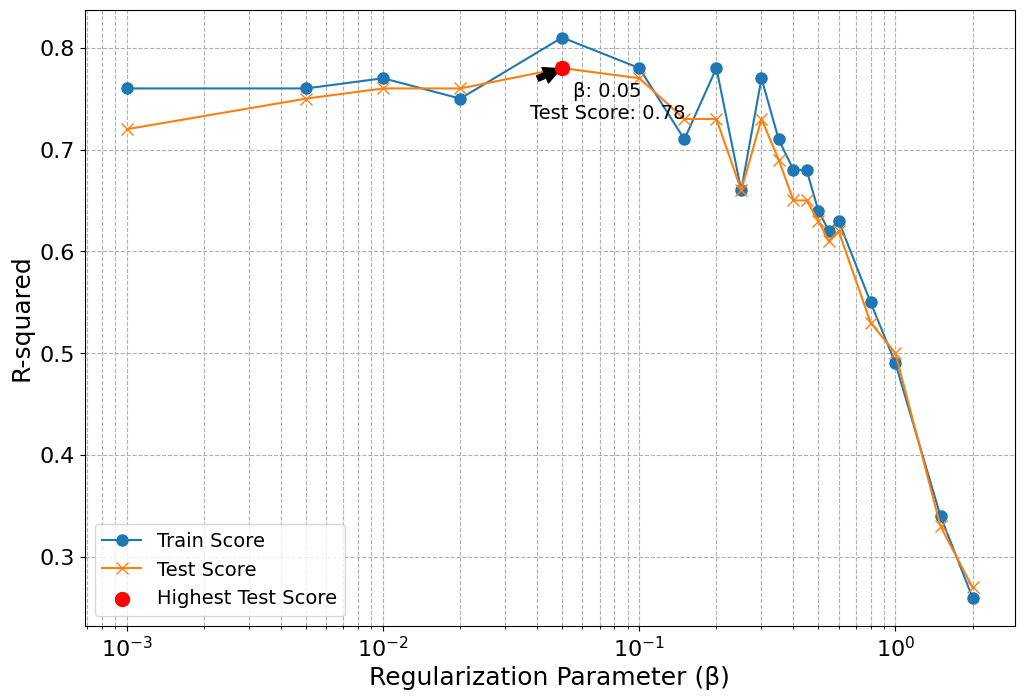

In [ ]:
# Updating the plot with the Greek letter β (beta) in the annotation

plt.figure(figsize=(12, 8))
plt.plot(df_beta["Regularization Parameter"], df_beta["Train Score"], label='Train Score', marker='o', markersize=8)
plt.plot(df_beta["Regularization Parameter"], df_beta["Test Score"], label='Test Score', marker='x', markersize=8)
plt.scatter(highest_beta_value, highest_test_score, color='red', s=100, label='Highest Test Score', zorder=5)

# Annotating the plot with β in Greek for the regularization parameter
plt.annotate(f'β: {highest_beta_value}\nTest Score: {highest_test_score:.2f}',
             xy=(highest_beta_value, highest_test_score),
             xytext=(highest_beta_value*1.5, highest_test_score-0.05),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=14, ha='center')

plt.xlabel('Regularization Parameter (β)', fontsize=18)  # Also updating axis label to use Greek letter β
plt.ylabel('R-squared', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14)
plt.xscale('log')  # Logarithmic scale for the x-axis
plt.grid(True, which="both", ls="--")
# plt.title('Optimizing Physics-Informed LSTM for GSI Performance Prediction', fontsize=20)
plt.show()